<h1 align=center><font size = 7>Analysis of Emigration & Immigration</font></h1>

<h2 align=center><font size = 6> BELGIUM</font></h2>

<font size = 5> **Author**: Angelo Di Marco

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination.

The data source is the United Nations dedicated [webpage](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp) about the monitoring of global population trends, *Population Division* - *International Migration*.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Importing Dataset](#1)<br>
    1.1 [Splitting Dataset into Emigrants and Immigrants](#1.1) <br>
2. [Data Wrangling](#2)<br>
3. [Exploratory Data Analysis](#3) <br>
    3.1 [Pre-Analysis of Selected Countries](#3.1) <br>
4. [Data Modeling: Insights](#4) <br>
    4.1 [Comparison Selected Groups of Countries](#4.1) <br>
    4.2 [Total Emigration and Immigration](#4.2) <br>
    4.2.1 [Top 5 Countries - Sorted by Total](#4.2.1) <br>
    4.2.2 [Top 15 Countries - Sorted by Total](#4.2.2) <br>
    4.2.3 [Top 15 Countries - Sorted by Total and Continent](#4.2.3) <br>
    4.2.4 [Top 15 Countries - Sorted by Total - *Word Clouds*](#4.2.4) <br>
    4.3 [Emigration and Immigration Trends](#4.3) <br>
    4.4 [Choropleth Maps](#4.4) <br>
</div>
<hr>

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS

import folium

------------------------

# 1. Importing Dataset<a id="1"></a>

In [3]:
df_belgium = pd.read_excel('Belgium.xlsx',
                       sheet_name='Belgium by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_belgium.shape

(284, 43)

In [5]:
df_belgium.head()

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Emigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Emigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Emigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   
3  Emigrants  Foreigners      Andorra   908   Europe   925  Southern Europe   
4  Emigrants  Foreigners       Angola   903   Africa   911    Middle Africa   

   DEV             DevName 1980  ... 2004 2005 2006 2007 2008 2009 2010 2011  \
0  902  Developing regions   ..  ...   ..   ..   ..    4   ..   ..   72  109   
1  901   Developed regions   ..  ...   ..   ..   ..   15   ..   ..  100  167   
2  902  Developing regions  546  ...   ..   ..   ..   70   ..   ..  191  217   
3  901   Developed regions   ..  ...   ..   ..   ..   ..   ..   ..    2    1   
4  902  Developing regions   ..  ...   ..   ..   ..   12   ..   ..   70  156   

  2012 2013  
0  107  541  
1  153  537  
2  290  443  
3    2    0  
4  126  164  

[5 rows x 43 columns]

In [6]:
df_belgium.tail()

Type    Coverage  \
279  Immigrants  Foreigners   
280  Immigrants  Foreigners   
281  Immigrants  Foreigners   
282  Immigrants  Foreigners   
283  Immigrants  Foreigners   

                                                OdName  AREA  \
279                                            Ukraine   908   
280  United Kingdom of Great Britain and Northern I...   908   
281                           United States of America   905   
282                                         Uzbekistan   935   
283                                           Viet Nam   935   

             AreaName   REG             RegName  DEV             DevName  \
279            Europe   923      Eastern Europe  901   Developed regions   
280            Europe   924     Northern Europe  901   Developed regions   
281  Northern America   905    Northern America  901   Developed regions   
282              Asia  5500        Central Asia  902  Developing regions   
283              Asia   920  South-Eastern Asia  902  Developing regions   

     1980  ...  2004  2005  2006  2007 2008 2009  2010  2011  2012  2013  
279    ..  ...    ..   301   269   314   ..   ..   466   650   628   430  
280  3514  ...  2366  2213  2015  2042   ..   ..  1874  1915  1798  1721  
281  3267  ...  2603  2408  2553  2455   ..   ..  2224  2304  2197  2166  
282    ..  ...    ..    ..    26    37   ..   ..    96   102    60    24  
283    ..  ...   227   242   201   217   ..   ..   281   288   293   259  

[5 rows x 43 columns]

In [7]:
df_belgium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      284 non-null    object
 1   Coverage  284 non-null    object
 2   OdName    284 non-null    object
 3   AREA      284 non-null    int64 
 4   AreaName  284 non-null    object
 5   REG       284 non-null    int64 
 6   RegName   284 non-null    object
 7   DEV       284 non-null    int64 
 8   DevName   284 non-null    object
 9   1980      284 non-null    object
 10  1981      284 non-null    object
 11  1982      284 non-null    object
 12  1983      284 non-null    object
 13  1984      284 non-null    object
 14  1985      284 non-null    object
 15  1986      284 non-null    object
 16  1987      284 non-null    object
 17  1988      284 non-null    object
 18  1989      284 non-null    object
 19  1990      284 non-null    object
 20  1991      284 non-null    object
 21  1992      284 no

In [8]:
df_belgium.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

------------------

## 1.1 Splitting Dataset into Emigrants and Immigrants<a id="1.1"></a>

In [9]:
df_belgium_emigrants = df_belgium[df_belgium['Type']=='Emigrants']
df_belgium_emigrants

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0    Emigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1    Emigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2    Emigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   
3    Emigrants  Foreigners      Andorra   908   Europe   925  Southern Europe   
4    Emigrants  Foreigners       Angola   903   Africa   911    Middle Africa   
..         ...         ...          ...   ...      ...   ...              ...   
177  Emigrants  Foreigners       Zambia   903   Africa   910   Eastern Africa   
178  Emigrants  Foreigners     Zimbabwe   903   Africa   910   Eastern Africa   
179  Emigrants  Foreigners    Stateless   999    World   999            World   
180  Emigrants  Foreigners      Unknown   999    World   999            World   
181  Emigrants        Both        Total   999    World   999            World   

     DEV             DevName   1980  ...   2004   2005   2006   2007    2008  \
0    902  Developing regions     ..  ...     ..     ..     ..      4      ..   
1    901   Developed regions     ..  ...     ..     ..     ..     15      ..   
2    902  Developing regions    546  ...     ..     ..     ..     70      ..   
3    901   Developed regions     ..  ...     ..     ..     ..     ..      ..   
4    902  Developing regions     ..  ...     ..     ..     ..     12      ..   
..   ...                 ...    ...  ...    ...    ...    ...    ...     ...   
177  902  Developing regions     ..  ...     ..     ..     ..     ..      ..   
178  902  Developing regions     ..  ...     ..     ..     ..     ..      ..   
179  999               World     ..  ...     ..     ..     ..      0      ..   
180  999               World   1422  ...  43179  44298  45573  17645  100275   
181  999               World  50213  ...  83895  86899  88163  91052  100275   

    2009   2010   2011   2012   2013  
0     ..     72    109    107    541  
1     ..    100    167    153    537  
2     ..    191    217    290    443  
3     ..      2      1      2      0  
4     ..     70    156    126    164  
..   ...    ...    ...    ...    ...  
177   ..     10      9     19     21  
178   ..     12     12     19     14  
179   ..      5      7     10     10  
180   ..    609    584   1123   1786  
181   ..  66013  67475  74720  90800  

[182 rows x 43 columns]

In [10]:
df_belgium_immigrants = df_belgium[df_belgium['Type']=='Immigrants']
df_belgium_immigrants

Type    Coverage  \
182  Immigrants  Foreigners   
183  Immigrants  Foreigners   
184  Immigrants  Foreigners   
185  Immigrants  Foreigners   
186  Immigrants  Foreigners   
..          ...         ...   
279  Immigrants  Foreigners   
280  Immigrants  Foreigners   
281  Immigrants  Foreigners   
282  Immigrants  Foreigners   
283  Immigrants  Foreigners   

                                                OdName  AREA  \
182                                        Afghanistan   935   
183                                            Albania   908   
184                                            Algeria   903   
185                                             Angola   903   
186                                          Argentina   904   
..                                                 ...   ...   
279                                            Ukraine   908   
280  United Kingdom of Great Britain and Northern I...   908   
281                           United States of America   905   
282                                         Uzbekistan   935   
283                                           Viet Nam   935   

                            AreaName   REG             RegName  DEV  \
182                             Asia  5501       Southern Asia  902   
183                           Europe   925     Southern Europe  901   
184                           Africa   912     Northern Africa  902   
185                           Africa   911       Middle Africa  902   
186  Latin America and the Caribbean   931       South America  902   
..                               ...   ...                 ...  ...   
279                           Europe   923      Eastern Europe  901   
280                           Europe   924     Northern Europe  901   
281                 Northern America   905    Northern America  901   
282                             Asia  5500        Central Asia  902   
283                             Asia   920  South-Eastern Asia  902   

                DevName  1980  ...  2004  2005  2006  2007 2008 2009  2010  \
182  Developing regions    ..  ...    ..   118   208   163   ..   ..  1249   
183   Developed regions    ..  ...    ..   201   225   253   ..   ..   623   
184  Developing regions   604  ...   768   725   736   879   ..   ..  1346   
185  Developing regions    ..  ...    47    57    59    77   ..   ..   282   
186  Developing regions   100  ...    ..    ..    ..    ..   ..   ..    86   
..                  ...   ...  ...   ...   ...   ...   ...  ...  ...   ...   
279   Developed regions    ..  ...    ..   301   269   314   ..   ..   466   
280   Developed regions  3514  ...  2366  2213  2015  2042   ..   ..  1874   
281   Developed regions  3267  ...  2603  2408  2553  2455   ..   ..  2224   
282  Developing regions    ..  ...    ..    ..    26    37   ..   ..    96   
283  Developing regions    ..  ...   227   242   201   217   ..   ..   281   

     2011  2012  2013  
182  1246  2963  1071  
183   620  1451   730  
184  1459  1349   666  
185   339   244   176  
186    92    86    82  
..    ...   ...   ...  
279   650   628   430  
280  1915  1798  1721  
281  2304  2197  2166  
282   102    60    24  
283   288   293   259  

[102 rows x 43 columns]

---------------------

# 2. Data Wrangling<a id="2"></a>

In [11]:
df_belgium_emigrants.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_belgium_emigrants.head(2)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


OdName AreaName          RegName             DevName 1980 1981 1982  \
0  Afghanistan     Asia    Southern Asia  Developing regions   ..   ..   ..   
1      Albania   Europe  Southern Europe   Developed regions   ..   ..   ..   

  1983 1984 1985  ... 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013  
0   ..   ..   ..  ...   ..   ..   ..    4   ..   ..   72  109  107  541  
1   ..   ..   ..  ...   ..   ..   ..   15   ..   ..  100  167  153  537  

[2 rows x 38 columns]

In [12]:
df_belgium_immigrants.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_belgium_immigrants.head(2)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


OdName AreaName          RegName             DevName 1980 1981 1982  \
182  Afghanistan     Asia    Southern Asia  Developing regions   ..   ..   ..   
183      Albania   Europe  Southern Europe   Developed regions   ..   ..   ..   

    1983 1984 1985  ... 2004 2005 2006 2007 2008 2009  2010  2011  2012  2013  
182   ..   ..   ..  ...   ..  118  208  163   ..   ..  1249  1246  2963  1071  
183   ..   ..   ..  ...   ..  201  225  253   ..   ..   623   620  1451   730  

[2 rows x 38 columns]

------------------

In [13]:
years = list(map(int, range(1980, 2014)))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [14]:
df_belgium_emigrants.dtypes

OdName      object
AreaName    object
RegName     object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
dtype: object

In [15]:
df_belgium_emigrants[years]

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
0       ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
1       ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
2      546    449    577    503    405    368    345    276    201    213   
3       ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
4       ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
177     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
178     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
179     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..   
180   1422   1400   1476   1778   1568   1988   2337   2839   3159   2137   
181  50213  57295  58704  57260  53309  50912  50619  53270  45225  40813   

     ...   2004   2005   2006   2007    2008 2009   2010   2011   2012   2013  
0    ...     ..     ..     ..      4      ..   ..     72    109    107    541  
1    ...     ..     ..     ..     15      ..   ..    100    167    153    537  
2    ...     ..     ..     ..     70      ..   ..    191    217    290    443  
3    ...     ..     ..     ..     ..      ..   ..      2      1      2      0  
4    ...     ..     ..     ..     12      ..   ..     70    156    126    164  
..   ...    ...    ...    ...    ...     ...  ...    ...    ...    ...    ...  
177  ...     ..     ..     ..     ..      ..   ..     10      9     19     21  
178  ...     ..     ..     ..     ..      ..   ..     12     12     19     14  
179  ...     ..     ..     ..      0      ..   ..      5      7     10     10  
180  ...  43179  44298  45573  17645  100275   ..    609    584   1123   1786  
181  ...  83895  86899  88163  91052  100275   ..  66013  67475  74720  90800  

[182 rows x 34 columns]

In [16]:
df_belgium_emigrants[1981]

0         ..
1         ..
2        449
3         ..
4         ..
       ...  
177       ..
178       ..
179       ..
180     1400
181    57295
Name: 1981, Length: 182, dtype: object

In [17]:
df_belgium_emigrants.loc[2, 1981]

449

In [18]:
df_belgium_emigrants.replace('..', 0, inplace=True)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
df_belgium_emigrants.head()

OdName AreaName          RegName             DevName  1980  1981  \
0  Afghanistan     Asia    Southern Asia  Developing regions     0     0   
1      Albania   Europe  Southern Europe   Developed regions     0     0   
2      Algeria   Africa  Northern Africa  Developing regions   546   449   
3      Andorra   Europe  Southern Europe   Developed regions     0     0   
4       Angola   Africa    Middle Africa  Developing regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0     0     0     0     0  ...     0     0     0     4     0     0    72   
1     0     0     0     0  ...     0     0     0    15     0     0   100   
2   577   503   405   368  ...     0     0     0    70     0     0   191   
3     0     0     0     0  ...     0     0     0     0     0     0     2   
4     0     0     0     0  ...     0     0     0    12     0     0    70   

   2011  2012  2013  
0   109   107   541  
1   167   153   537  
2   217   290   443  
3     1     2     0  
4   156   126   164  

[5 rows x 38 columns]

In [20]:
df_belgium_emigrants[years] = df_belgium_emigrants[years].astype("float")

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_belgium_emigrants.dtypes

OdName       object
AreaName     object
RegName      object
DevName      object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

---------------------------

In [22]:
df_belgium_immigrants.dtypes

OdName      object
AreaName    object
RegName     object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
dtype: object

In [23]:
df_belgium_immigrants[years]

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  2004  \
182    ..    ..    ..    ..    ..    ..    ..    ..    ..    ..  ...    ..   
183    ..    ..    ..    ..    ..    ..    ..    ..    ..    ..  ...    ..   
184   604   461   309   276   313   344   349   328   344   323  ...   768   
185    ..    ..    ..    ..    ..    ..    ..    ..    ..    ..  ...    47   
186   100    68    59    65    43    38    45    44    ..    ..  ...    ..   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
279    ..    ..    ..    ..    ..    ..    ..    ..    ..    ..  ...    ..   
280  3514  2877  2693  2497  2601  2370  2246  2412  2162  2641  ...  2366   
281  3267  2779  2974  2787  3058  3078  2655  3236  2785  2823  ...  2603   
282    ..    ..    ..    ..    ..    ..    ..    ..    ..    ..  ...    ..   
283    ..    ..    ..    ..    ..    ..    ..    ..    ..    ..  ...   227   

     2005  2006  2007 2008 2009  2010  2011  2012  2013  
182   118   208   163   ..   ..  1249  1246  2963  1071  
183   201   225   253   ..   ..   623   620  1451   730  
184   725   736   879   ..   ..  1346  1459  1349   666  
185    57    59    77   ..   ..   282   339   244   176  
186    ..    ..    ..   ..   ..    86    92    86    82  
..    ...   ...   ...  ...  ...   ...   ...   ...   ...  
279   301   269   314   ..   ..   466   650   628   430  
280  2213  2015  2042   ..   ..  1874  1915  1798  1721  
281  2408  2553  2455   ..   ..  2224  2304  2197  2166  
282    ..    26    37   ..   ..    96   102    60    24  
283   242   201   217   ..   ..   281   288   293   259  

[102 rows x 34 columns]

In [24]:
df_belgium_immigrants.replace('..', 0, inplace=True)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
df_belgium_immigrants.head()

OdName                         AreaName          RegName  \
182  Afghanistan                             Asia    Southern Asia   
183      Albania                           Europe  Southern Europe   
184      Algeria                           Africa  Northern Africa   
185       Angola                           Africa    Middle Africa   
186    Argentina  Latin America and the Caribbean    South America   

                DevName  1980  1981  1982  1983  1984  1985  ...  2004  2005  \
182  Developing regions     0     0     0     0     0     0  ...     0   118   
183   Developed regions     0     0     0     0     0     0  ...     0   201   
184  Developing regions   604   461   309   276   313   344  ...   768   725   
185  Developing regions     0     0     0     0     0     0  ...    47    57   
186  Developing regions   100    68    59    65    43    38  ...     0     0   

     2006  2007  2008  2009  2010  2011  2012  2013  
182   208   163     0     0  1249  1246  2963  1071  
183   225   253     0     0   623   620  1451   730  
184   736   879     0     0  1346  1459  1349   666  
185    59    77     0     0   282   339   244   176  
186     0     0     0     0    86    92    86    82  

[5 rows x 38 columns]

In [26]:
df_belgium_immigrants[years] = df_belgium_immigrants[years].astype("float")

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
df_belgium_immigrants.dtypes

OdName       object
AreaName     object
RegName      object
DevName      object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

---------------------

In [28]:
df_belgium_emigrants.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'}, inplace=True)
df_belgium_emigrants.columns

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index([    'Country',   'Continent',      'Region', 'Development',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013],
      dtype='object')

In [29]:
df_belgium_immigrants.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'}, inplace=True)
df_belgium_immigrants.columns

Index([    'Country',   'Continent',      'Region', 'Development',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013],
      dtype='object')

In [30]:
df_belgium_emigrants.columns = list(map(str, df_belgium_emigrants.columns))
df_belgium_emigrants.columns

Index(['Country', 'Continent', 'Region', 'Development', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [31]:
df_belgium_immigrants.columns = list(map(str, df_belgium_immigrants.columns))
df_belgium_immigrants.columns

Index(['Country', 'Continent', 'Region', 'Development', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [32]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [33]:
df_belgium_emigrants.set_index('Country', inplace=True)
df_belgium_emigrants.head()

Continent           Region         Development   1980   1981  \
Country                                                                    
Afghanistan      Asia    Southern Asia  Developing regions    0.0    0.0   
Albania        Europe  Southern Europe   Developed regions    0.0    0.0   
Algeria        Africa  Northern Africa  Developing regions  546.0  449.0   
Andorra        Europe  Southern Europe   Developed regions    0.0    0.0   
Angola         Africa    Middle Africa  Developing regions    0.0    0.0   

              1982   1983   1984   1985   1986  ...  2004  2005  2006  2007  \
Country                                         ...                           
Afghanistan    0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0   0.0   4.0   
Albania        0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0   0.0  15.0   
Algeria      577.0  503.0  405.0  368.0  345.0  ...   0.0   0.0   0.0  70.0   
Andorra        0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0   0.0   0.0   
Angola         0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0   0.0  12.0   

             2008  2009   2010   2011   2012   2013  
Country                                              
Afghanistan   0.0   0.0   72.0  109.0  107.0  541.0  
Albania       0.0   0.0  100.0  167.0  153.0  537.0  
Algeria       0.0   0.0  191.0  217.0  290.0  443.0  
Andorra       0.0   0.0    2.0    1.0    2.0    0.0  
Angola        0.0   0.0   70.0  156.0  126.0  164.0  

[5 rows x 37 columns]

In [34]:
df_belgium_immigrants.set_index('Country', inplace=True)
df_belgium_immigrants.head()

Continent           Region  \
Country                                                         
Afghanistan                             Asia    Southern Asia   
Albania                               Europe  Southern Europe   
Algeria                               Africa  Northern Africa   
Angola                                Africa    Middle Africa   
Argentina    Latin America and the Caribbean    South America   

                    Development   1980   1981   1982   1983   1984   1985  \
Country                                                                     
Afghanistan  Developing regions    0.0    0.0    0.0    0.0    0.0    0.0   
Albania       Developed regions    0.0    0.0    0.0    0.0    0.0    0.0   
Algeria      Developing regions  604.0  461.0  309.0  276.0  313.0  344.0   
Angola       Developing regions    0.0    0.0    0.0    0.0    0.0    0.0   
Argentina    Developing regions  100.0   68.0   59.0   65.0   43.0   38.0   

              1986  ...   2004   2005   2006   2007  2008  2009    2010  \
Country             ...                                                   
Afghanistan    0.0  ...    0.0  118.0  208.0  163.0   0.0   0.0  1249.0   
Albania        0.0  ...    0.0  201.0  225.0  253.0   0.0   0.0   623.0   
Algeria      349.0  ...  768.0  725.0  736.0  879.0   0.0   0.0  1346.0   
Angola         0.0  ...   47.0   57.0   59.0   77.0   0.0   0.0   282.0   
Argentina     45.0  ...    0.0    0.0    0.0    0.0   0.0   0.0    86.0   

               2011    2012    2013  
Country                              
Afghanistan  1246.0  2963.0  1071.0  
Albania       620.0  1451.0   730.0  
Algeria      1459.0  1349.0   666.0  
Angola        339.0   244.0   176.0  
Argentina      92.0    86.0    82.0  

[5 rows x 37 columns]

In [35]:
df_belgium_emigrants['Total'] = df_belgium_emigrants.sum(axis=1)
df_belgium_emigrants.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development   1980   1981  \
Country                                                                    
Afghanistan      Asia    Southern Asia  Developing regions    0.0    0.0   
Albania        Europe  Southern Europe   Developed regions    0.0    0.0   
Algeria        Africa  Northern Africa  Developing regions  546.0  449.0   
Andorra        Europe  Southern Europe   Developed regions    0.0    0.0   
Angola         Africa    Middle Africa  Developing regions    0.0    0.0   

              1982   1983   1984   1985   1986  ...  2005  2006  2007  2008  \
Country                                         ...                           
Afghanistan    0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0   4.0   0.0   
Albania        0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0  15.0   0.0   
Algeria      577.0  503.0  405.0  368.0  345.0  ...   0.0   0.0  70.0   0.0   
Andorra        0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0   0.0   0.0   
Angola         0.0    0.0    0.0    0.0    0.0  ...   0.0   0.0  12.0   0.0   

             2009   2010   2011   2012   2013   Total  
Country                                                
Afghanistan   0.0   72.0  109.0  107.0  541.0   833.0  
Albania       0.0  100.0  167.0  153.0  537.0   972.0  
Algeria       0.0  191.0  217.0  290.0  443.0  6252.0  
Andorra       0.0    2.0    1.0    2.0    0.0     5.0  
Angola        0.0   70.0  156.0  126.0  164.0   768.0  

[5 rows x 38 columns]

In [36]:
df_belgium_emigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [37]:
df_belgium_emigrants.index.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China (including Hong Kong Special Administrative Region)',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 '

In [38]:
df_belgium_immigrants['Total'] = df_belgium_immigrants.sum(axis=1)
df_belgium_immigrants.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region  \
Country                                                         
Afghanistan                             Asia    Southern Asia   
Albania                               Europe  Southern Europe   
Algeria                               Africa  Northern Africa   
Angola                                Africa    Middle Africa   
Argentina    Latin America and the Caribbean    South America   

                    Development   1980   1981   1982   1983   1984   1985  \
Country                                                                     
Afghanistan  Developing regions    0.0    0.0    0.0    0.0    0.0    0.0   
Albania       Developed regions    0.0    0.0    0.0    0.0    0.0    0.0   
Algeria      Developing regions  604.0  461.0  309.0  276.0  313.0  344.0   
Angola       Developing regions    0.0    0.0    0.0    0.0    0.0    0.0   
Argentina    Developing regions  100.0   68.0   59.0   65.0   43.0   38.0   

              1986  ...   2005   2006   2007  2008  2009    2010    2011  \
Country             ...                                                    
Afghanistan    0.0  ...  118.0  208.0  163.0   0.0   0.0  1249.0  1246.0   
Albania        0.0  ...  201.0  225.0  253.0   0.0   0.0   623.0   620.0   
Algeria      349.0  ...  725.0  736.0  879.0   0.0   0.0  1346.0  1459.0   
Angola         0.0  ...   57.0   59.0   77.0   0.0   0.0   282.0   339.0   
Argentina     45.0  ...    0.0    0.0    0.0   0.0   0.0    86.0    92.0   

               2012    2013    Total  
Country                               
Afghanistan  2963.0  1071.0   7018.0  
Albania      1451.0   730.0   4103.0  
Algeria      1349.0   666.0  18314.0  
Angola        244.0   176.0   2119.0  
Argentina      86.0    82.0    852.0  

[5 rows x 38 columns]

In [39]:
df_belgium_immigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [40]:
df_belgium_immigrants.index.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'China, Taiwan Province of China',
 'Colombia',
 'Congo',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guinea',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Niger',
 'Nigeria',
 'Norway',
 'Pakistan'

---------------
---------------

# 3. Exploratory Data Analysis<a id="3"></a>

In [41]:
df_belgium_emigrants.describe()

1980          1981          1982          1983          1984  \
count    182.000000    182.000000    182.000000    182.000000    182.000000   
mean     551.791209    629.615385    645.098901    629.230769    585.813187   
std     3918.419196   4557.725104   4680.635910   4561.938580   4265.768185   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    50213.000000  57295.000000  58704.000000  57260.000000  53309.000000   

               1985          1986          1987          1988          1989  \
count    182.000000    182.000000    182.000000    182.000000    182.000000   
mean     559.472527    556.252747    585.384615    496.978022    448.494505   
std     4092.305925   4086.893344   4301.758498   3591.644121   3273.951008   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    50912.000000  50619.000000  53270.000000  45225.000000  40813.000000   

       ...          2005          2006          2007           2008   2009  \
count  ...    182.000000    182.000000    182.000000     182.000000  182.0   
mean   ...    954.934066    968.824176   1000.571429    1101.923077    0.0   
std    ...   7853.151029   7968.408655   7636.557481   10482.598202    0.0   
min    ...      0.000000      0.000000      0.000000       0.000000    0.0   
25%    ...      0.000000      0.000000      0.000000       0.000000    0.0   
50%    ...      0.000000      0.000000      5.500000       0.000000    0.0   
75%    ...      0.000000      0.000000     57.250000       0.000000    0.0   
max    ...  86899.000000  88163.000000  91052.000000  100275.000000    0.0   

               2010          2011          2012          2013         Total  
count    182.000000    182.000000    182.000000    182.000000  1.820000e+02  
mean     725.417582    741.483516    821.098901    997.802198  2.288878e+04  
std     5193.276513   5319.325991   5883.965239   7061.778870  1.696689e+05  
min        0.000000      0.000000      0.000000      0.000000  1.000000e+00  
25%        6.000000      6.000000      9.000000     11.250000  2.825000e+01  
50%       36.500000     40.000000     47.500000     74.500000  2.235000e+02  
75%      112.500000    143.500000    160.000000    225.000000  1.282250e+03  
max    66013.000000  67475.000000  74720.000000  90800.000000  2.082879e+06  

[8 rows x 35 columns]

In [42]:
df_belgium_immigrants.describe()

1980         1981         1982         1983         1984  \
count   102.000000   102.000000   102.000000   102.000000   102.000000   
mean    460.529412   407.009804   369.754902   367.892157   387.205882   
std    1348.681811  1215.011979  1170.139989  1214.279389  1265.963761   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%      57.000000    51.000000    44.250000    35.250000    32.250000   
max    7834.000000  7979.000000  8479.000000  9310.000000  9843.000000   

              1985         1986         1987          1988          1989  ...  \
count   102.000000   102.000000   102.000000    102.000000    102.000000  ...   
mean    373.843137   382.372549   397.117647    395.529412    434.892157  ...   
std    1228.993799  1245.009912  1259.409820   1298.909815   1393.509196  ...   
min       0.000000     0.000000     0.000000      0.000000      0.000000  ...   
25%       0.000000     0.000000     0.000000      0.000000      0.000000  ...   
50%       0.000000     0.000000     0.000000      0.000000      0.000000  ...   
75%      28.500000    33.750000    33.000000      0.000000      0.000000  ...   
max    9500.000000  9663.000000  9655.000000  10253.000000  10620.000000  ...   

               2005          2006          2007   2008   2009          2010  \
count    102.000000    102.000000    102.000000  102.0  102.0    102.000000   
mean     858.343137    920.970588   1248.333333    0.0    0.0   1260.627451   
std     2088.459812   2255.648410   4103.733780    0.0    0.0   2707.982252   
min        0.000000      0.000000      0.000000    0.0    0.0      0.000000   
25%       80.250000     96.250000     95.750000    0.0    0.0    156.750000   
50%      187.500000    194.500000    212.500000    0.0    0.0    316.500000   
75%      562.000000    527.750000    540.000000    0.0    0.0    963.750000   
max    12953.000000  12857.000000  36483.000000    0.0    0.0  18557.000000   

               2011          2012          2013          Total  
count    102.000000    102.000000    102.000000     102.000000  
mean    1330.470588   1374.784314   1121.637255   21289.215686  
std     2704.777071   2682.087227   2522.920863   54427.189882  
min        0.000000      0.000000      0.000000       7.000000  
25%      173.500000    177.500000    130.000000    1535.750000  
50%      358.000000    402.500000    264.000000    4008.500000  
75%     1177.250000   1264.250000    784.000000   10551.000000  
max    18426.000000  17271.000000  17531.000000  397054.000000  

[8 rows x 35 columns]

In [43]:
df_belgium_emigrants[years[0:13]].describe()

1980          1981          1982          1983          1984  \
count    182.000000    182.000000    182.000000    182.000000    182.000000   
mean     551.791209    629.615385    645.098901    629.230769    585.813187   
std     3918.419196   4557.725104   4680.635910   4561.938580   4265.768185   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    50213.000000  57295.000000  58704.000000  57260.000000  53309.000000   

               1985          1986          1987          1988          1989  \
count    182.000000    182.000000    182.000000    182.000000    182.000000   
mean     559.472527    556.252747    585.384615    496.978022    448.494505   
std     4092.305925   4086.893344   4301.758498   3591.644121   3273.951008   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    50912.000000  50619.000000  53270.000000  45225.000000  40813.000000   

               1990          1991          1992  
count    182.000000    182.000000    182.000000  
mean     442.967033    545.263736    415.989011  
std     3234.275872   3942.831960   3001.533498  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max    40310.000000  49619.000000  37855.000000

In [44]:
df_belgium_immigrants[years[0:13]].describe()

1980         1981         1982         1983         1984  \
count   102.000000   102.000000   102.000000   102.000000   102.000000   
mean    460.529412   407.009804   369.754902   367.892157   387.205882   
std    1348.681811  1215.011979  1170.139989  1214.279389  1265.963761   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%      57.000000    51.000000    44.250000    35.250000    32.250000   
max    7834.000000  7979.000000  8479.000000  9310.000000  9843.000000   

              1985         1986         1987          1988          1989  \
count   102.000000   102.000000   102.000000    102.000000    102.000000   
mean    373.843137   382.372549   397.117647    395.529412    434.892157   
std    1228.993799  1245.009912  1259.409820   1298.909815   1393.509196   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     0.000000      0.000000      0.000000   
50%       0.000000     0.000000     0.000000      0.000000      0.000000   
75%      28.500000    33.750000    33.000000      0.000000      0.000000   
max    9500.000000  9663.000000  9655.000000  10253.000000  10620.000000   

               1990          1991          1992  
count    102.000000    102.000000    102.000000  
mean     492.735294    528.598039    535.215686  
std     1575.348668   1679.561507   1605.219239  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000    196.750000    154.000000  
max    12193.000000  13330.000000  11713.000000

In [45]:
df_belgium_emigrants[['2001']].describe()

2001
count    182.000000
mean     827.043956
std     6800.985663
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    75261.000000

In [46]:
df_belgium_immigrants[['2001']].describe()

2001
count    102.000000
mean     716.294118
std     1796.262013
min        0.000000
25%        0.000000
50%      150.000000
75%      436.250000
max    11610.000000

--------------

In [47]:
df_belgium_emigrants['Development'].value_counts().to_frame()

Development
Developing regions          132
Developed regions            47
World                         3

In [48]:
df_belgium_immigrants['Development'].value_counts().to_frame()

Development
Developing regions           60
Developed regions            42

In [49]:
df_belgium_emigrants['Development']

Country
Afghanistan    Developing regions
Albania         Developed regions
Algeria        Developing regions
Andorra         Developed regions
Angola         Developing regions
                      ...        
Zambia         Developing regions
Zimbabwe       Developing regions
Stateless                   World
Unknown                     World
Total                       World
Name: Development, Length: 182, dtype: object

In [50]:
df_belgium_emigrants['Continent'].value_counts().to_frame()

Continent
Africa                                  53
Asia                                    45
Europe                                  42
Latin America and the Caribbean         31
Oceania                                  6
World                                    3
Northern America                         2

In [51]:
df_belgium_immigrants['Continent'].value_counts().to_frame()

Continent
Europe                                  37
Asia                                    27
Africa                                  24
Latin America and the Caribbean         10
Oceania                                  2
Northern America                         2

In [52]:
df_belgium_emigrants['Continent']

Country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
                ...  
Zambia         Africa
Zimbabwe       Africa
Stateless       World
Unknown         World
Total           World
Name: Continent, Length: 182, dtype: object

In [53]:
df_belgium_emigrants['Region'].value_counts().to_frame()

Region
Eastern Africa                 17
Western Asia                   17
Western Africa                 16
Southern Europe                13
South America                  12
Caribbean                      11
Eastern Europe                 10
Northern Europe                10
South-Eastern Asia             10
Western Europe                  9
Middle Africa                   9
Central America                 8
Southern Asia                   8
Northern Africa                 6
Eastern Asia                    5
Southern Africa                 5
Central Asia                    5
Melanesia                       3
World                           3
Australia and New Zealand       2
Northern America                2
Micronesia                      1

In [54]:
df_belgium_immigrants['Region'].value_counts().to_frame()

Region
Northern Europe                10
Southern Europe                10
Western Africa                 10
Western Asia                   10
Eastern Europe                  9
Western Europe                  8
Southern Asia                   6
South America                   6
Eastern Africa                  5
Eastern Asia                    4
Northern Africa                 4
Middle Africa                   4
South-Eastern Asia              4
Caribbean                       3
Central Asia                    3
Northern America                2
Australia and New Zealand       2
Southern Africa                 1
Central America                 1

------------------

## 3.1 Pre-Analysis of Selected Countries<a id="3.1"></a>

----------------------

### France

In [55]:
france_e = df_belgium_emigrants.loc['France', years]
france_e.head()

1980    5974
1981    5481
1982    5378
1983    5220
1984    4644
Name: France, dtype: object

In [56]:
france_i = df_belgium_immigrants.loc['France', years]
france_i.head()

1980    6283
1981    5815
1982    4945
1983    5044
1984    4872
Name: France, dtype: object

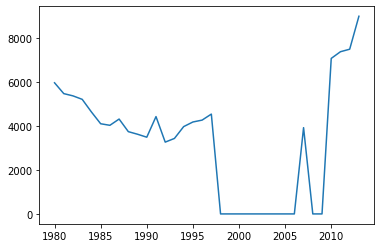

In [57]:
france_e.plot()

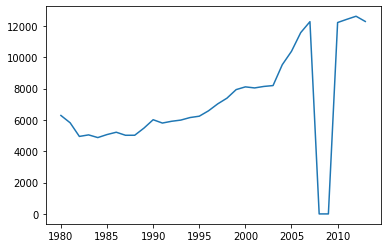

In [58]:
france_i.plot()

In [59]:
france_netvalue = france_i - france_e

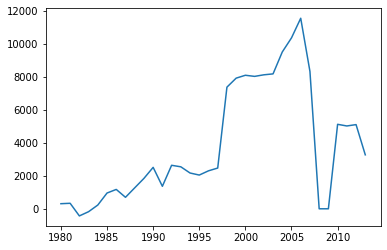

In [60]:
france_netvalue.plot()

--------------------

In [61]:
france_e_new = df_belgium_emigrants.loc['France', years[11:]]
france_e_new.head()

1991    4434
1992    3271
1993    3439
1994    3978
1995    4188
Name: France, dtype: object

In [62]:
france_i_new = df_belgium_immigrants.loc['France', years[11:]]
france_i_new.head()

1991    5799
1992    5912
1993    5988
1994    6150
1995    6236
Name: France, dtype: object

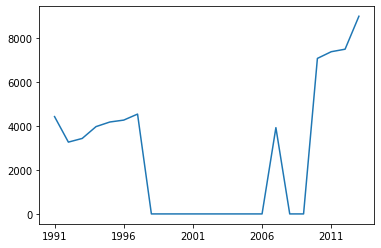

In [63]:
france_e_new.plot()

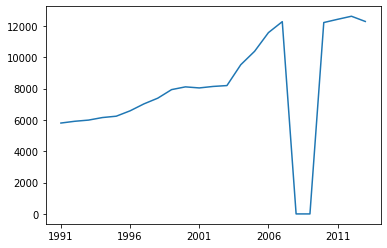

In [64]:
france_i_new.plot()

In [65]:
france_netvalue_new = france_i_new - france_e_new

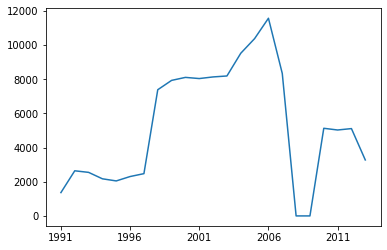

In [66]:
france_netvalue_new.plot()

----------------------

### Germany

In [67]:
germany_e = df_belgium_emigrants.loc['Germany', years]
germany_e.head()

1980    2390
1981    2534
1982    2377
1983    2400
1984    2440
Name: Germany, dtype: object

In [68]:
germany_i = df_belgium_immigrants.loc['Germany', years]
germany_i.head()

1980    2548
1981    2551
1982    2866
1983    2709
1984    2667
Name: Germany, dtype: object

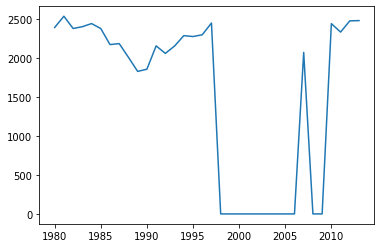

In [69]:
germany_e.plot()

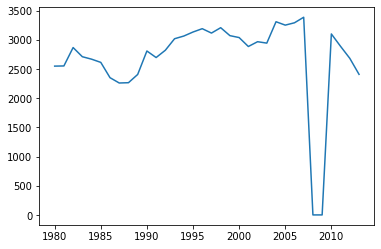

In [70]:
germany_i.plot()

In [71]:
germany_netvalue = germany_i - germany_e

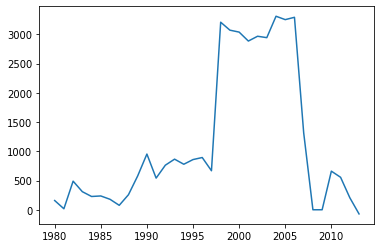

In [72]:
germany_netvalue.plot()

----------------------

### Algeria

In [73]:
algeria_e = df_belgium_emigrants.loc['Algeria', years]
algeria_e.head()

1980    546
1981    449
1982    577
1983    503
1984    405
Name: Algeria, dtype: object

In [74]:
algeria_i = df_belgium_immigrants.loc['Algeria', years]
algeria_i.head()

1980    604
1981    461
1982    309
1983    276
1984    313
Name: Algeria, dtype: object

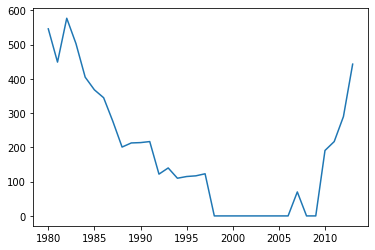

In [75]:
algeria_e.plot()

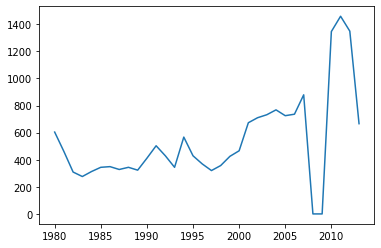

In [76]:
algeria_i.plot()

In [77]:
algeria_netvalue = algeria_i - algeria_e

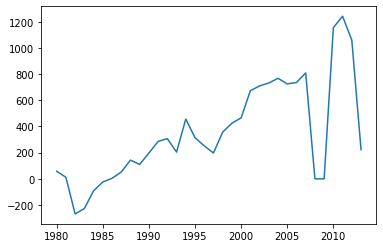

In [78]:
algeria_netvalue.plot()

----------------------

### Belgium

In [79]:
belgium_e = df_belgium_emigrants.loc['Belgium', years]
belgium_e.head()

1980    13326
1981    20325
1982    21497
1983    21090
1984    20562
Name: Belgium, dtype: object

In [80]:
belgium_i = df_belgium_immigrants.loc['Belgium', years]
belgium_i.head()

1980    7834
1981    7979
1982    8479
1983    9310
1984    9843
Name: Belgium, dtype: object

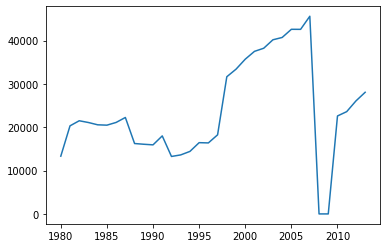

In [81]:
belgium_e.plot()

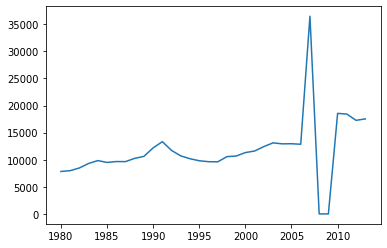

In [82]:
belgium_i.plot()

In [83]:
belgium_netvalue = belgium_i - belgium_e

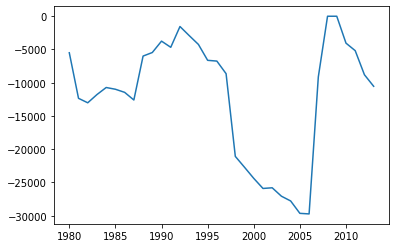

In [84]:
belgium_netvalue.plot()

----------------------

### United Kingdom

In [85]:
UK_e = df_belgium_emigrants.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK_e.head()

1980    3374
1981    3496
1982    2967
1983    3048
1984    2895
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

In [86]:
UK_i = df_belgium_immigrants.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK_i.head()

1980    3514
1981    2877
1982    2693
1983    2497
1984    2601
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

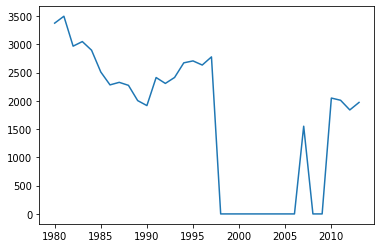

In [87]:
UK_e.plot()

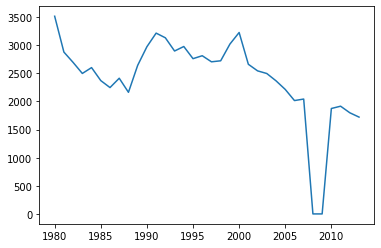

In [88]:
UK_i.plot()

In [89]:
UK_netvalue = UK_i - UK_e

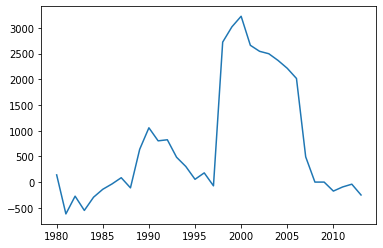

In [90]:
UK_netvalue.plot()

In [91]:
UK_e_new = df_belgium_emigrants.loc['United Kingdom of Great Britain and Northern Ireland', years[11:]]
UK_e_new.head()

1991    2412
1992    2308
1993    2413
1994    2672
1995    2706
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

In [92]:
UK_i_new = df_belgium_immigrants.loc['United Kingdom of Great Britain and Northern Ireland', years[11:]]
UK_i_new.head()

1991    3214
1992    3131
1993    2896
1994    2976
1995    2760
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

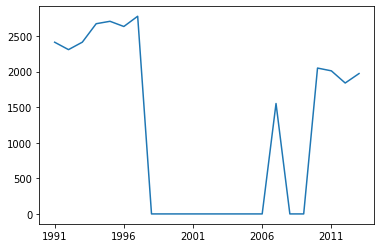

In [93]:
UK_e_new.plot()

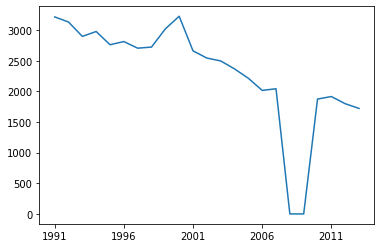

In [94]:
UK_i_new.plot()

In [95]:
UK_netvalue_new = UK_i_new - UK_e_new

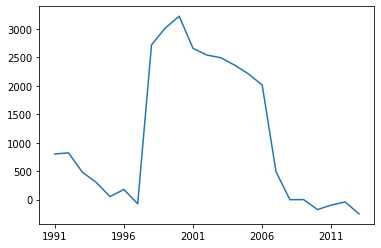

In [96]:
UK_netvalue_new.plot()

----------------------

### Sweden

In [97]:
sweden_e = df_belgium_emigrants.loc['Sweden', years]
sweden_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Sweden, dtype: object

In [98]:
sweden_i = df_belgium_immigrants.loc['Sweden', years]
sweden_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Sweden, dtype: object

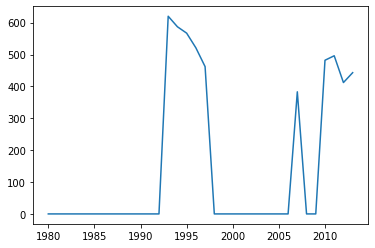

In [99]:
sweden_e.plot()

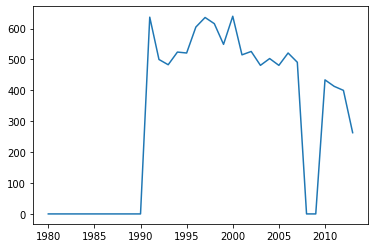

In [100]:
sweden_i.plot()

In [101]:
sweden_e_new = df_belgium_emigrants.loc['Sweden', years[18:]]
sweden_e_new.head()

1998    0
1999    0
2000    0
2001    0
2002    0
Name: Sweden, dtype: object

In [102]:
sweden_i_new = df_belgium_immigrants.loc['Sweden', years[18:]]
sweden_i_new.head()

1998    616
1999    549
2000    640
2001    515
2002    526
Name: Sweden, dtype: object

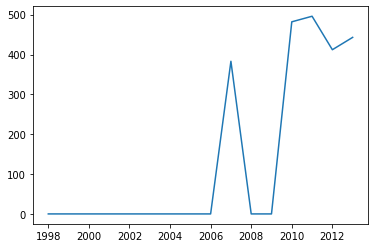

In [103]:
sweden_e_new.plot()

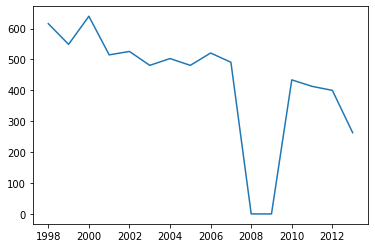

In [104]:
sweden_i_new.plot()

----------------------

### China

In [105]:
china_e = df_belgium_emigrants.loc['China (including Hong Kong Special Administrative Region)', years]
china_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: China (including Hong Kong Special Administrative Region), dtype: object

In [106]:
china_i = df_belgium_immigrants.loc['China', years]
china_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: China, dtype: object

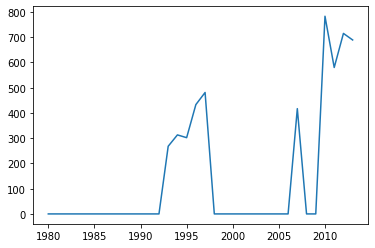

In [107]:
china_e.plot()

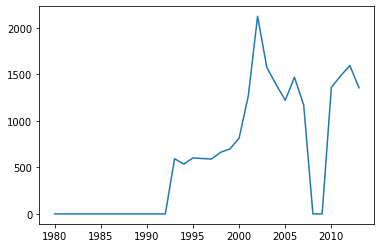

In [108]:
china_i.plot()

In [109]:
china_e_new = df_belgium_emigrants.loc['China (including Hong Kong Special Administrative Region)', years[15:]]
china_e_new.head()

1995    302
1996    433
1997    481
1998      0
1999      0
Name: China (including Hong Kong Special Administrative Region), dtype: object

In [110]:
china_i_new = df_belgium_immigrants.loc['China', years[15:]]
china_i_new.head()

1995    602
1996    595
1997    590
1998    663
1999    698
Name: China, dtype: object

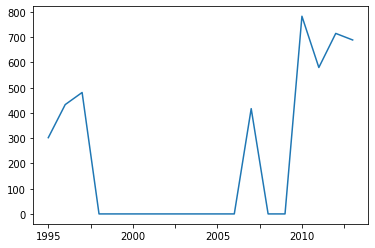

In [111]:
china_e_new.plot()

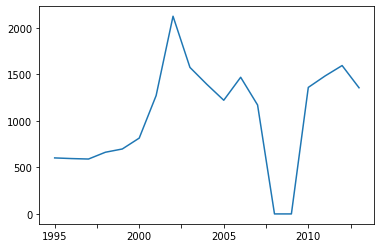

In [112]:
china_i_new.plot()

------------------------

# 4. Data Modeling - Insights<a id="4"></a>

## 4.1 Comparison Selected Groups of Countries<a id="4.1"></a>

### Denmark, Norway, Sweden, Finland

In [113]:
df_DNS_e = df_belgium_emigrants.loc[['Denmark','Norway','Sweden','Finland'], years[18:]].transpose()
df_DNS_e.head()

Country  Denmark  Norway  Sweden  Finland
1998         0.0     0.0     0.0      0.0
1999         0.0     0.0     0.0      0.0
2000         0.0     0.0     0.0      0.0
2001         0.0     0.0     0.0      0.0
2002         0.0     0.0     0.0      0.0

In [114]:
df_DNS_i = df_belgium_immigrants.loc[['Denmark','Norway','Sweden','Finland'], years[18:]].transpose()
df_DNS_i.head()

Country  Denmark  Norway  Sweden  Finland
1998       397.0   237.0   616.0    416.0
1999       385.0   236.0   549.0    411.0
2000       408.0   253.0   640.0    463.0
2001       383.0   290.0   515.0    389.0
2002       328.0   317.0   526.0    510.0

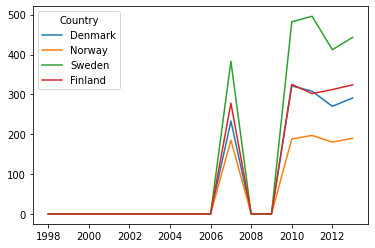

In [115]:
df_DNS_e.plot()

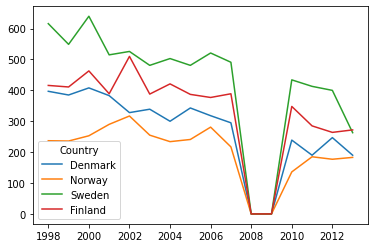

In [116]:
df_DNS_i.plot()

---------------------

### France, Germany, UK, Spain

In [117]:
df_FGUK_e = df_belgium_emigrants.loc[['France','Germany','United Kingdom of Great Britain and Northern Ireland','Spain'], years[11:]].transpose()
df_FGUK_e.head()

Country  France  Germany  \
1991     4434.0   2154.0   
1992     3271.0   2058.0   
1993     3439.0   2152.0   
1994     3978.0   2285.0   
1995     4188.0   2274.0   

Country  United Kingdom of Great Britain and Northern Ireland   Spain  
1991                                                2412.0     2025.0  
1992                                                2308.0     1007.0  
1993                                                2413.0     1024.0  
1994                                                2672.0     1208.0  
1995                                                2706.0     1455.0

In [118]:
df_FGUK_i = df_belgium_immigrants.loc[['France','Germany','United Kingdom of Great Britain and Northern Ireland','Spain'], years[11:]].transpose()
df_FGUK_i.head()

Country  France  Germany  \
1991     5799.0   2695.0   
1992     5912.0   2820.0   
1993     5988.0   3017.0   
1994     6150.0   3063.0   
1995     6236.0   3132.0   

Country  United Kingdom of Great Britain and Northern Ireland   Spain  
1991                                                3214.0      754.0  
1992                                                3131.0     1050.0  
1993                                                2896.0      997.0  
1994                                                2976.0      961.0  
1995                                                2760.0     1047.0

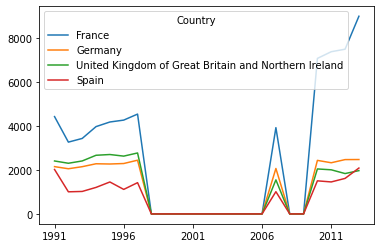

In [119]:
df_FGUK_e.plot()

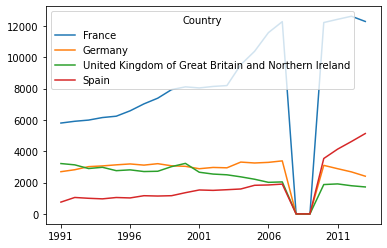

In [120]:
df_FGUK_i.plot()

---------------------

### Morocco, Algeria, Tunisia, Libya

In [121]:
df_north_africa_e = df_belgium_emigrants.loc[['Morocco','Algeria','Tunisia','Libya','Egypt'], years[11:]].transpose()
df_north_africa_e.head()

Country  Morocco  Algeria  Tunisia  Libya  Egypt
1991       921.0    217.0    262.0    0.0    0.0
1992       494.0    122.0    131.0    0.0    0.0
1993       612.0    140.0    140.0    0.0    0.0
1994       562.0    110.0    181.0    0.0    0.0
1995       879.0    115.0    209.0    0.0    0.0

In [122]:
df_north_africa_i = df_belgium_immigrants.loc[['Morocco','Algeria','Tunisia','Egypt'], years[11:]].transpose()
df_north_africa_i.head()

Country  Morocco  Algeria  Tunisia  Egypt
1991      3443.0    503.0    381.0    0.0
1992      3307.0    429.0    306.0    0.0
1993      3358.0    344.0    296.0    0.0
1994      4768.0    567.0    324.0    0.0
1995      3596.0    429.0    278.0    0.0

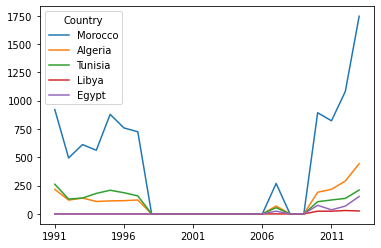

In [123]:
df_north_africa_e.plot()

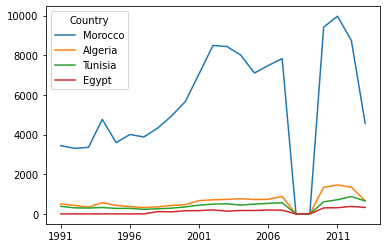

In [124]:
df_north_africa_i.plot()

----------------------

### Belgium, Nederlands, Portugal, Ireland

In [125]:
df_BNPI_e = df_belgium_emigrants.loc[['Belgium','Netherlands','Portugal','Ireland'], years[18:]].transpose()
df_BNPI_e.head()

Country  Belgium  Netherlands  Portugal  Ireland
1998     31653.0          0.0       0.0      0.0
1999     33401.0          0.0       0.0      0.0
2000     35707.0          0.0       0.0      0.0
2001     37513.0          0.0       0.0      0.0
2002     38228.0          0.0       0.0      0.0

In [126]:
df_BNPI_i = df_belgium_immigrants.loc[['Belgium','Netherlands','Portugal','Ireland'], years[18:]].transpose()
df_BNPI_i.head()

Country  Belgium  Netherlands  Portugal  Ireland
1998     10573.0       6242.0    1386.0    352.0
1999     10682.0       6201.0    1313.0    328.0
2000     11321.0       7178.0    1324.0    339.0
2001     11610.0       8167.0    1347.0    344.0
2002     12425.0       8404.0    1567.0    348.0

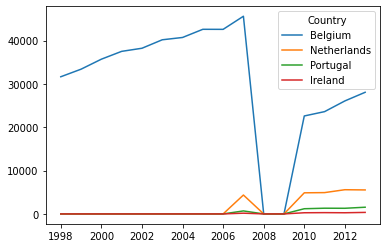

In [127]:
df_BNPI_e.plot()

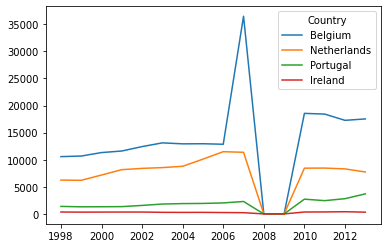

In [128]:
df_BNPI_i.plot()

----------------------

### China, India, Pakistan, Bangladesh

In [129]:
df_CIPB_e = df_belgium_emigrants.loc[['China (including Hong Kong Special Administrative Region)','India','Pakistan','Bangladesh'], years[15:]].transpose()
df_CIPB_e.head()

Country  China (including Hong Kong Special Administrative Region)  India  \
1995                                                 302.0          339.0   
1996                                                 433.0          235.0   
1997                                                 481.0          229.0   
1998                                                   0.0            0.0   
1999                                                   0.0            0.0   

Country  Pakistan  Bangladesh  
1995        147.0         0.0  
1996         41.0         0.0  
1997         63.0         0.0  
1998          0.0         0.0  
1999          0.0         0.0

In [130]:
df_CIPB_i = df_belgium_immigrants.loc[['China','India','Pakistan','Bangladesh'], years[15:]].transpose()
df_CIPB_i.head()

Country  China  India  Pakistan  Bangladesh
1995     602.0  390.0     156.0         0.0
1996     595.0  523.0     188.0         0.0
1997     590.0  435.0     185.0         0.0
1998     663.0  536.0     221.0        69.0
1999     698.0  561.0     167.0        45.0

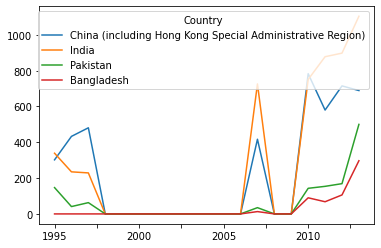

In [131]:
df_CIPB_e.plot()

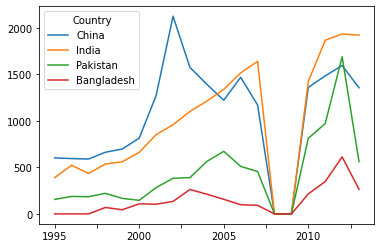

In [132]:
df_CIPB_i.plot()

----------------------

### USA, Canada, Australia

In [133]:
df_north_america_e = df_belgium_emigrants.loc[['United States of America','Canada','Australia'], years[11:]].transpose()
df_north_america_e.head()

Country  United States of America  Canada  Australia
1991                       3068.0   323.0        0.0
1992                       2981.0   286.0        0.0
1993                       2953.0   324.0      118.0
1994                       2938.0   301.0      134.0
1995                       2917.0   334.0      119.0

In [134]:
df_north_america_i = df_belgium_immigrants.loc[['United States of America','Canada','Australia'], years[11:]].transpose()
df_north_america_i.head()

Country  United States of America  Canada  Australia
1991                       2884.0   405.0      123.0
1992                       3112.0   347.0      154.0
1993                       2679.0   372.0      142.0
1994                       2933.0   428.0      112.0
1995                       3042.0   399.0      141.0

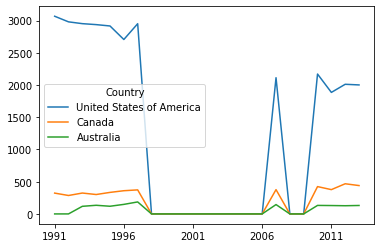

In [135]:
df_north_america_e.plot()

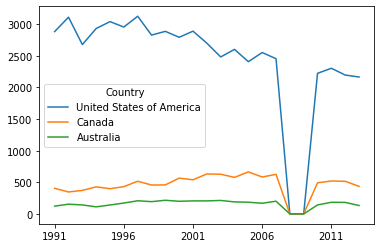

In [136]:
df_north_america_i.plot()

----------------------

### Brasil, Argentina, Chile

In [137]:
df_south_america_e = df_belgium_emigrants.loc[['Brazil','Argentina','Chile'], years[11:]].transpose()
df_south_america_e.head()

Country  Brazil  Argentina  Chile
1991      219.0        0.0   69.0
1992      205.0        0.0  109.0
1993      208.0       63.0  160.0
1994      233.0        0.0  162.0
1995      191.0        0.0  114.0

In [138]:
df_south_america_i = df_belgium_immigrants.loc[['Brazil','Argentina','Chile'], years[11:]].transpose()
df_south_america_i.head()

Country  Brazil  Argentina  Chile
1991      318.0        0.0  227.0
1992      130.0        0.0  154.0
1993      325.0       44.0  107.0
1994      295.0        0.0  111.0
1995      307.0        0.0  107.0

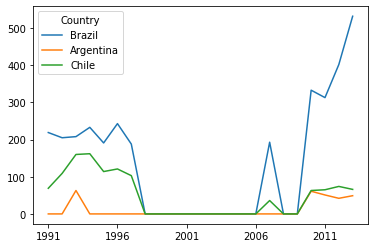

In [139]:
df_south_america_e.plot()

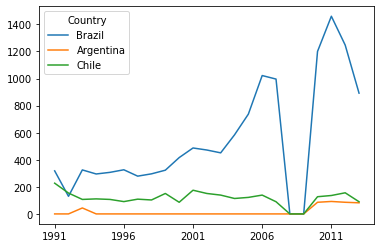

In [140]:
df_south_america_i.plot()

----------------------

### Mexico, Colombia, Venezuela

In [141]:
df_central_america_e = df_belgium_emigrants.loc[['Mexico','Colombia','Venezuela (Bolivarian Republic of)','Chile'], years[11:]].transpose()
df_central_america_e.head()

Country  Mexico  Colombia  Venezuela (Bolivarian Republic of)  Chile
1991        0.0       0.0                                 0.0   69.0
1992        0.0       0.0                                 0.0  109.0
1993       64.0      73.0                                 0.0  160.0
1994        0.0      81.0                                 0.0  162.0
1995        0.0      76.0                                 0.0  114.0

In [142]:
df_central_america_i = df_belgium_immigrants.loc[['Mexico','Colombia','Chile'], years[11:]].transpose()
df_central_america_i.head()

Country  Mexico  Colombia  Chile
1991        0.0       0.0  227.0
1992        0.0       0.0  154.0
1993      140.0     169.0  107.0
1994        0.0     171.0  111.0
1995        0.0     155.0  107.0

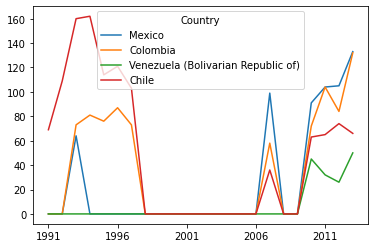

In [143]:
df_central_america_e.plot()

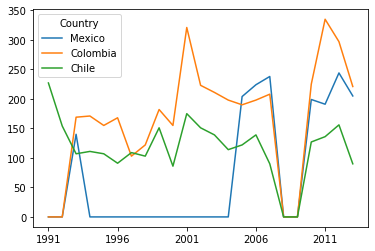

In [144]:
df_central_america_i.plot()

----------------------

### Syria, Lebanon, Israel, Jordan

In [145]:
df_middle_east_e = df_belgium_emigrants.loc[['Syrian Arab Republic','Lebanon','Israel','Jordan'], years[18:]].transpose()
df_middle_east_e.head()

Country  Syrian Arab Republic  Lebanon  Israel  Jordan
1998                      0.0      0.0     0.0     0.0
1999                      0.0      0.0     0.0     0.0
2000                      0.0      0.0     0.0     0.0
2001                      0.0      0.0     0.0     0.0
2002                      0.0      0.0     0.0     0.0

In [146]:
df_middle_east_i = df_belgium_immigrants.loc[['Syrian Arab Republic','Lebanon','Israel','Jordan'], years[18:]].transpose()
df_middle_east_i.head()

Country  Syrian Arab Republic  Lebanon  Israel  Jordan
1998                     66.0    100.0   175.0     0.0
1999                     96.0    102.0   176.0     0.0
2000                     74.0    146.0   219.0     0.0
2001                    138.0    167.0   347.0     0.0
2002                    130.0    177.0   252.0     0.0

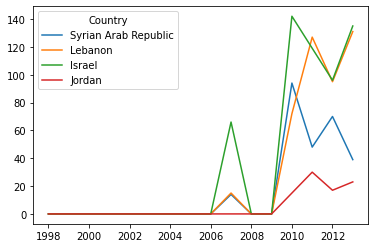

In [147]:
df_middle_east_e.plot()

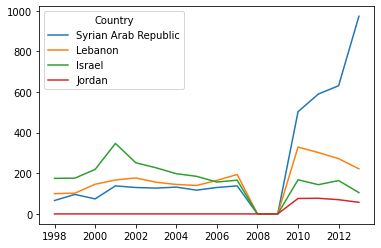

In [148]:
df_middle_east_i.plot()

----------------------

### Romania, Ukraine, Poland

In [149]:
df_east_europe_e = df_belgium_emigrants.loc[['Romania','Ukraine', 'Poland'], years[15:]].transpose()
df_east_europe_e.head()

Country  Romania  Ukraine  Poland
1995       334.0      0.0   301.0
1996       161.0      0.0   336.0
1997       150.0      0.0   469.0
1998         0.0      0.0     0.0
1999         0.0      0.0     0.0

In [150]:
df_east_europe_i = df_belgium_immigrants.loc[['Romania','Ukraine', 'Poland'], years[15:]].transpose()
df_east_europe_i.head()

Country  Romania  Ukraine  Poland
1995       332.0      0.0   800.0
1996       324.0      0.0   946.0
1997       384.0      0.0  1063.0
1998       387.0      0.0  1118.0
1999       587.0      0.0  1151.0

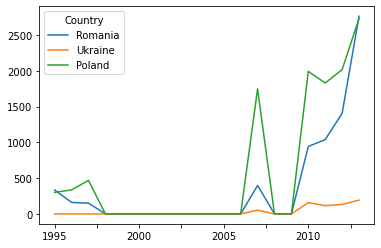

In [151]:
df_east_europe_e.plot()

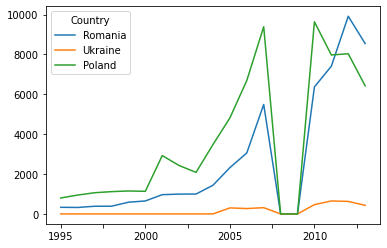

In [152]:
df_east_europe_i.plot()

--------------------

## 4.2 Total Emigration and Immigration<a id="4.2"></a>

### 4.2.1 Top 5 Countries - Sorted by Total<a id="4.2.1"></a>

In [153]:
df_belgium_emigrants.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5_e = df_belgium_emigrants.head(8)
df_top5_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent  \
Country                                                                
Total                                                          World   
Belgium                                                       Europe   
Unknown                                                        World   
France                                                        Europe   
Netherlands                                                   Europe   
Italy                                                         Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...            Europe   

                                                              Region  \
Country                                                                
Total                                                          World   
Belgium                                               Western Europe   
Unknown                                                        World   
France                                                Western Europe   
Netherlands                                           Western Europe   
Italy                                                Southern Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   

                                                          Development  \
Country                                                                 
Total                                                           World   
Belgium                                             Developed regions   
Unknown                                                         World   
France                                              Developed regions   
Netherlands                                         Developed regions   
Italy                                               Developed regions   
United States of America                            Developed regions   
United Kingdom of Great Britain and Northern Ir...  Developed regions   

                                                       1980     1981     1982  \
Country                                                                         
Total                                               50213.0  57295.0  58704.0   
Belgium                                             13326.0  20325.0  21497.0   
Unknown                                              1422.0   1400.0   1476.0   
France                                               5974.0   5481.0   5378.0   
Netherlands                                          3336.0   4179.0   3602.0   
Italy                                                6794.0   6909.0   7066.0   
United States of America                             3622.0   3378.0   3486.0   
United Kingdom of Great Britain and Northern Ir...   3374.0   3496.0   2967.0   

                                                       1983     1984     1985  \
Country                                                                         
Total                                               57260.0  53309.0  50912.0   
Belgium                                             21090.0  20562.0  20481.0   
Unknown                                              1778.0   1568.0   1988.0   
France                                               5220.0   4644.0   4108.0   
Netherlands                                          3302.0   3123.0   3015.0   
Italy                                                6052.0   4849.0   4215.0   
United States of America                             2837.0   2874.0   2794.0   
United Kingdom of Great Britain and Northern Ir...   3048.0   2895.0   2510.0   

                                                       1986  ...     2005  \
Country                                                      ...            
Total                                               50619.0  ...  86899.0   
Belgium                          

In [154]:
df_top5_e.drop(['Total','Belgium','Unknown'], axis=0, inplace=True)
df_top5_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                
France                                                        Europe   
Netherlands                                                   Europe   
Italy                                                         Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...            Europe   

                                                              Region  \
Country                                                                
France                                                Western Europe   
Netherlands                                           Western Europe   
Italy                                                Southern Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   

                                                          Development    1980  \
Country                                                                         
France                                              Developed regions  5974.0   
Netherlands                                         Developed regions  3336.0   
Italy                                               Developed regions  6794.0   
United States of America                            Developed regions  3622.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions  3374.0   

                                                      1981    1982    1983  \
Country                                                                      
France                                              5481.0  5378.0  5220.0   
Netherlands                                         4179.0  3602.0  3302.0   
Italy                                               6909.0  7066.0  6052.0   
United States of America                            3378.0  3486.0  2837.0   
United Kingdom of Great Britain and Northern Ir...  3496.0  2967.0  3048.0   

                                                      1984    1985    1986  \
Country                                                                      
France                                              4644.0  4108.0  4037.0   
Netherlands                                         3123.0  3015.0  3096.0   
Italy                                               4849.0  4215.0  3593.0   
United States of America                            2874.0  2794.0  2844.0   
United Kingdom of Great Britain and Northern Ir...  2895.0  2510.0  2282.0   

                                                    ...  2005  2006    2007  \
Country                                             ...                       
France                                              ...   0.0   0.0  3930.0   
Netherlands                                         ...   0.0   0.0  4357.0   
Italy                                               ...   0.0   0.0  1403.0   
United States of America                            ...   0.0   0.0  2114.0   
United Kingdom of Great Britain and Northern Ir...  ...   0.0   0.0  1551.0   

                                                    2008  2009    2010  \
Country                                                                  
France                                               0.0   0.0  7085.0   
Netherlands                                          0.0   0.0  4870.0   
Italy                                                0.0   0.0  2001.0   
United States of America                             0.0   0.0  2171.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0  2049.0   

                                                      2011    2012    2013  \
Country                                                                      
France                                              7390.0  7504.0  9006.0   
Netherlands                                         4917.0  5584.0  5534.0   
It

In [155]:
df_belgium_immigrants.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5_i = df_belgium_immigrants.head(6)
df_top5_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development    1980    1981  \
Country                                                                      
Belgium        Europe   Western Europe   Developed regions  7834.0  7979.0   
France         Europe   Western Europe   Developed regions  6283.0  5815.0   
Netherlands    Europe   Western Europe   Developed regions  4245.0  3575.0   
Morocco        Africa  Northern Africa  Developing regions  5001.0  3902.0   
Germany        Europe   Western Europe   Developed regions  2548.0  2551.0   
Italy          Europe  Southern Europe   Developed regions  4007.0  2908.0   

               1982    1983    1984    1985    1986  ...     2005     2006  \
Country                                              ...                     
Belgium      8479.0  9310.0  9843.0  9500.0  9663.0  ...  12953.0  12857.0   
France       4945.0  5044.0  4872.0  5065.0  5213.0  ...  10378.0  11570.0   
Netherlands  3451.0  3583.0  3798.0  3660.0  4058.0  ...  10109.0  11488.0   
Morocco      3088.0  2709.0  2444.0  1856.0  1775.0  ...   7106.0   7488.0   
Germany      2866.0  2709.0  2667.0  2612.0  2350.0  ...   3250.0   3290.0   
Italy        2274.0  2107.0  2515.0  2399.0  2336.0  ...   2464.0   2613.0   

                2007  2008  2009     2010     2011     2012     2013     Total  
Country                                                                         
Belgium      36483.0   0.0   0.0  18557.0  18426.0  17271.0  17531.0  397054.0  
France       12269.0   0.0   0.0  12214.0  12419.0  12615.0  12282.0  243509.0  
Netherlands  11370.0   0.0   0.0   8445.0   8461.0   8307.0   7741.0  212265.0  
Morocco       7831.0   0.0   0.0   9419.0   9970.0   8752.0   4570.0  158284.0  
Germany       3385.0   0.0   0.0   3099.0   2886.0   2681.0   2407.0   91479.0  
Italy         2708.0   0.0   0.0   3625.0   4006.0   4292.0   4923.0   89327.0  

[6 rows x 38 columns]

In [156]:
df_top5_i.drop(['Belgium'], axis=0, inplace=True)
df_top5_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent           Region         Development    1980    1981  \
Country                                                                      
France         Europe   Western Europe   Developed regions  6283.0  5815.0   
Netherlands    Europe   Western Europe   Developed regions  4245.0  3575.0   
Morocco        Africa  Northern Africa  Developing regions  5001.0  3902.0   
Germany        Europe   Western Europe   Developed regions  2548.0  2551.0   
Italy          Europe  Southern Europe   Developed regions  4007.0  2908.0   

               1982    1983    1984    1985    1986  ...     2005     2006  \
Country                                              ...                     
France       4945.0  5044.0  4872.0  5065.0  5213.0  ...  10378.0  11570.0   
Netherlands  3451.0  3583.0  3798.0  3660.0  4058.0  ...  10109.0  11488.0   
Morocco      3088.0  2709.0  2444.0  1856.0  1775.0  ...   7106.0   7488.0   
Germany      2866.0  2709.0  2667.0  2612.0  2350.0  ...   3250.0   3290.0   
Italy        2274.0  2107.0  2515.0  2399.0  2336.0  ...   2464.0   2613.0   

                2007  2008  2009     2010     2011     2012     2013     Total  
Country                                                                         
France       12269.0   0.0   0.0  12214.0  12419.0  12615.0  12282.0  243509.0  
Netherlands  11370.0   0.0   0.0   8445.0   8461.0   8307.0   7741.0  212265.0  
Morocco       7831.0   0.0   0.0   9419.0   9970.0   8752.0   4570.0  158284.0  
Germany       3385.0   0.0   0.0   3099.0   2886.0   2681.0   2407.0   91479.0  
Italy         2708.0   0.0   0.0   3625.0   4006.0   4292.0   4923.0   89327.0  

[5 rows x 38 columns]

In [157]:
df_top5_e = df_top5_e[years].transpose()
df_top5_e.head()

Country  France  Netherlands   Italy  United States of America  \
1980     5974.0       3336.0  6794.0                    3622.0   
1981     5481.0       4179.0  6909.0                    3378.0   
1982     5378.0       3602.0  7066.0                    3486.0   
1983     5220.0       3302.0  6052.0                    2837.0   
1984     4644.0       3123.0  4849.0                    2874.0   

Country  United Kingdom of Great Britain and Northern Ireland  
1980                                                3374.0     
1981                                                3496.0     
1982                                                2967.0     
1983                                                3048.0     
1984                                                2895.0

In [158]:
df_top5_i = df_top5_i[years].transpose()
df_top5_i.head()

Country  France  Netherlands  Morocco  Germany   Italy
1980     6283.0       4245.0   5001.0   2548.0  4007.0
1981     5815.0       3575.0   3902.0   2551.0  2908.0
1982     4945.0       3451.0   3088.0   2866.0  2274.0
1983     5044.0       3583.0   2709.0   2709.0  2107.0
1984     4872.0       3798.0   2444.0   2667.0  2515.0

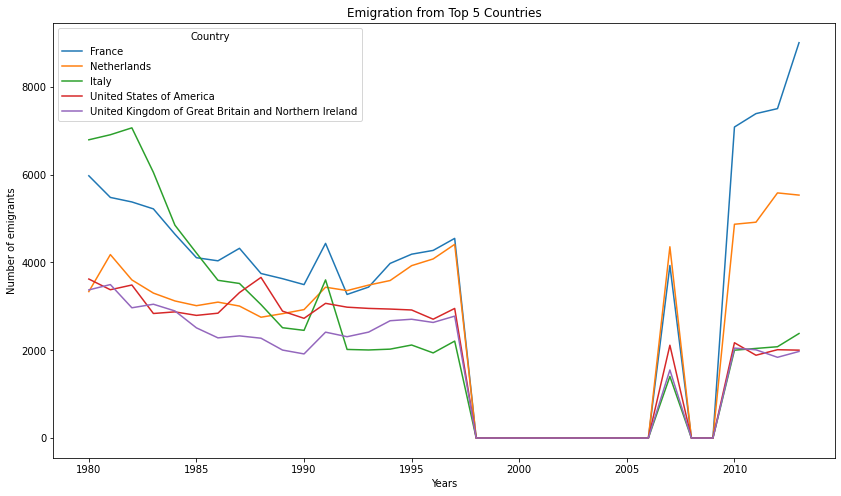

In [159]:
df_top5_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 5 Countries')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show()

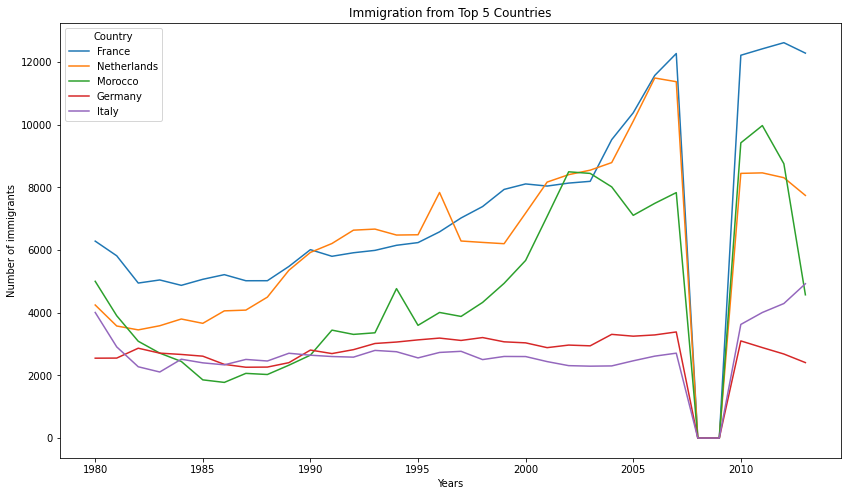

In [160]:
df_top5_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

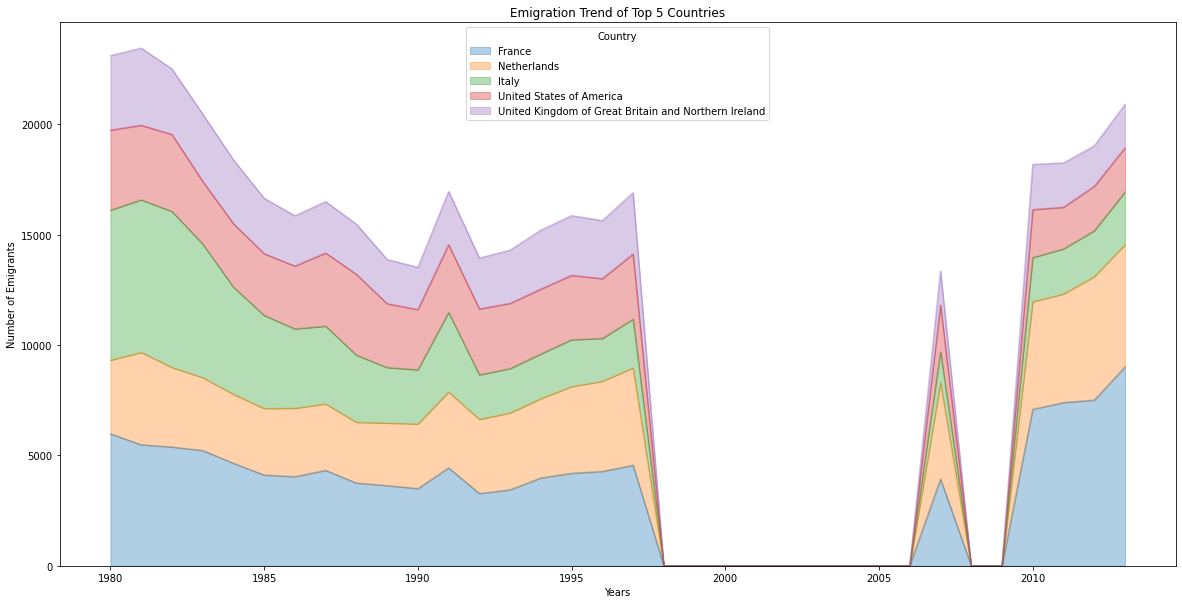

In [161]:
df_top5_e.index = df_top5_e.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_e.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Emigration Trend of Top 5 Countries')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

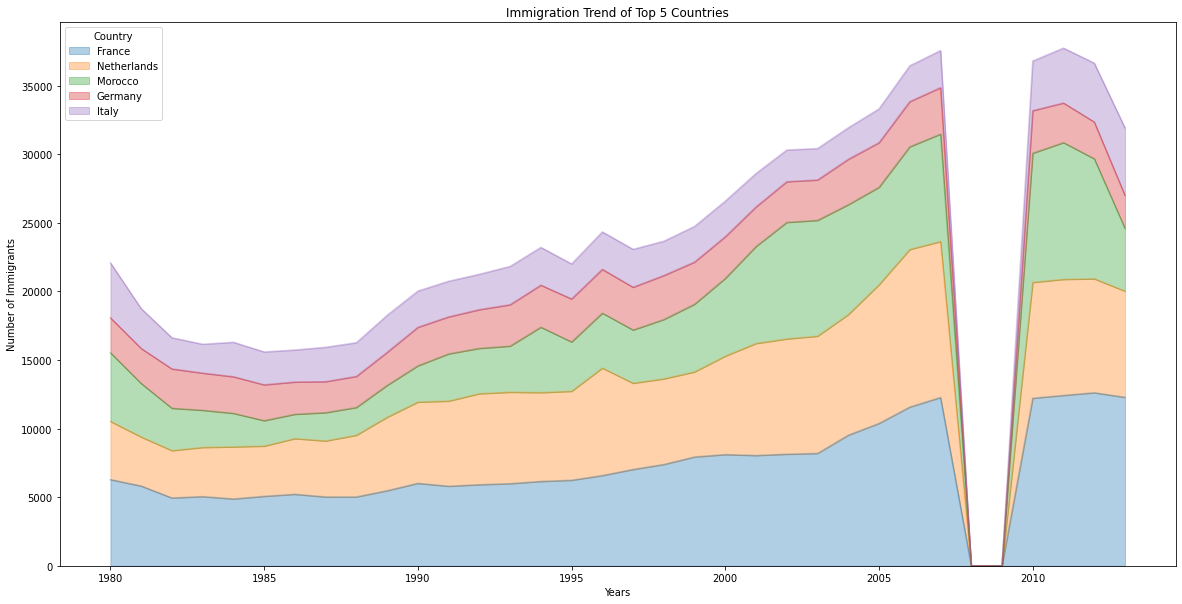

In [162]:
df_top5_i.index = df_top5_i.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_i.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------

In [163]:
# df_top5_e.drop(['Romania'], axis=1, inplace=True)
# df_top5_no_Romania_e = df_top5_e
# df_top5_no_Romania_e.head()

In [164]:
# df_top5_i.drop(['Romania'], axis=1, inplace=True)
# df_top5_no_Romania_i = df_top5_i
# df_top5_no_Romania_i.head()

In [165]:
# df_top5_no_Romania_e.plot(kind='line', figsize=(14, 8))

# plt.title('Emigration from Top 5 Countries minus Romania')
# plt.ylabel('Number of Emigrants')
# plt.xlabel('Years')

# plt.show()

In [166]:
# df_top5_no_Romania_i.plot(kind='line', figsize=(14, 8))

# plt.title('Immigration from Top 5 Countries Minus Romania')
# plt.ylabel('Number of Immigrants')
# plt.xlabel('Years')

# plt.show()

---------------------

In [167]:
# df_top5_no_Romania_e.index = df_top5_no_Romania_e.index.map(int) # let's change the index values of df_top5 to type integer for plotting
# df_top5_no_Romania_e.plot(kind='area', 
#              stacked=True,
#              alpha=0.35,
#              figsize=(20, 10),
#              )

# plt.title('Emigration Trend of Top 5 Countries without Romania')
# plt.ylabel('Number of Emigrants')
# plt.xlabel('Years')

# plt.show()

In [168]:
# df_top5_no_Romania_i.index = df_top5_no_Romania_i.index.map(int) # let's change the index values of df_top5 to type integer for plotting
# df_top5_no_Romania_i.plot(kind='area', 
#              stacked=True,
#              alpha=0.35,
#              figsize=(20, 10),
#              )

# plt.title('Immigration Trend of Top 5 Countries without Romania')
# plt.ylabel('Number of Immigrants')
# plt.xlabel('Years')

# plt.show()

---------------

### 4.2.2 Top 15 Countries - Sorted by Total<a id="4.2.2"></a>

In [169]:
df_top15_e = df_belgium_emigrants.head(18)
df_top15_e

Continent  \
Country                                                                
Total                                                          World   
Belgium                                                       Europe   
Unknown                                                        World   
France                                                        Europe   
Netherlands                                                   Europe   
Italy                                                         Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...            Europe   
Germany                                                       Europe   
Spain                                                         Europe   
Morocco                                                       Africa   
Democratic Republic of the Congo                              Africa   
Turkey                                                          Asia   
Portugal                                                      Europe   
Japan                                                           Asia   
Greece                                                        Europe   
Poland                                                        Europe   
Canada                                              Northern America   

                                                              Region  \
Country                                                                
Total                                                          World   
Belgium                                               Western Europe   
Unknown                                                        World   
France                                                Western Europe   
Netherlands                                           Western Europe   
Italy                                                Southern Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Germany                                               Western Europe   
Spain                                                Southern Europe   
Morocco                                              Northern Africa   
Democratic Republic of the Congo                       Middle Africa   
Turkey                                                  Western Asia   
Portugal                                             Southern Europe   
Japan                                                   Eastern Asia   
Greece                                               Southern Europe   
Poland                                                Eastern Europe   
Canada                                              Northern America   

                                                           Development  \
Country                                                                  
Total                                                            World   
Belgium                                              Developed regions   
Unknown                                                          World   
France                                               Developed regions   
Netherlands                                          Developed regions   
Italy                                                Developed regions   
United States of America                             Developed regions   
United Kingdom of Great Britain and Northern Ir...   Developed regions   
Germany                                              Developed regions   
Spain                                                Developed regions   
Morocco                                             Developing regions   
Democratic Republic of the Congo                    Developing regions   
Turkey                                              Developing regions   
Portugal                                             Developed regi

In [170]:
df_top15_e.drop(['Total','Belgium','Unknown'], axis=0, inplace=True)
df_top15_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                
France                                                        Europe   
Netherlands                                                   Europe   
Italy                                                         Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...            Europe   
Germany                                                       Europe   
Spain                                                         Europe   
Morocco                                                       Africa   
Democratic Republic of the Congo                              Africa   
Turkey                                                          Asia   
Portugal                                                      Europe   
Japan                                                           Asia   
Greece                                                        Europe   
Poland                                                        Europe   
Canada                                              Northern America   

                                                              Region  \
Country                                                                
France                                                Western Europe   
Netherlands                                           Western Europe   
Italy                                                Southern Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Germany                                               Western Europe   
Spain                                                Southern Europe   
Morocco                                              Northern Africa   
Democratic Republic of the Congo                       Middle Africa   
Turkey                                                  Western Asia   
Portugal                                             Southern Europe   
Japan                                                   Eastern Asia   
Greece                                               Southern Europe   
Poland                                                Eastern Europe   
Canada                                              Northern America   

                                                           Development  \
Country                                                                  
France                                               Developed regions   
Netherlands                                          Developed regions   
Italy                                                Developed regions   
United States of America                             Developed regions   
United Kingdom of Great Britain and Northern Ir...   Developed regions   
Germany                                              Developed regions   
Spain                                                Developed regions   
Morocco                                             Developing regions   
Democratic Republic of the Congo                    Developing regions   
Turkey                                              Developing regions   
Portugal                                             Developed regions   
Japan                                                Developed regions   
Greece                                               Developed regions   
Poland                                               Developed regions   
Canada                                               Developed regions   

                                                      1980    1981    1982  \
Country                                                                      
France                                              5974.0  5481.0  5378.0   
Netherlands                                         3336.0  4179.0  3602.0   
Italy                                 

---------------------

In [171]:
df_top15_i = df_belgium_immigrants.head(16)
df_top15_i

Continent  \
Country                                                                
Belgium                                                       Europe   
France                                                        Europe   
Netherlands                                                   Europe   
Morocco                                                       Africa   
Germany                                                       Europe   
Italy                                                         Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...            Europe   
Turkey                                                          Asia   
Poland                                                        Europe   
Portugal                                                      Europe   
Romania                                                       Europe   
Democratic Republic of the Congo                              Africa   
Spain                                                         Europe   
Japan                                                           Asia   
Bulgaria                                                      Europe   

                                                              Region  \
Country                                                                
Belgium                                               Western Europe   
France                                                Western Europe   
Netherlands                                           Western Europe   
Morocco                                              Northern Africa   
Germany                                               Western Europe   
Italy                                                Southern Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Turkey                                                  Western Asia   
Poland                                                Eastern Europe   
Portugal                                             Southern Europe   
Romania                                               Eastern Europe   
Democratic Republic of the Congo                       Middle Africa   
Spain                                                Southern Europe   
Japan                                                   Eastern Asia   
Bulgaria                                              Eastern Europe   

                                                           Development  \
Country                                                                  
Belgium                                              Developed regions   
France                                               Developed regions   
Netherlands                                          Developed regions   
Morocco                                             Developing regions   
Germany                                              Developed regions   
Italy                                                Developed regions   
United States of America                             Developed regions   
United Kingdom of Great Britain and Northern Ir...   Developed regions   
Turkey                                              Developing regions   
Poland                                               Developed regions   
Portugal                                             Developed regions   
Romania                                              Developed regions   
Democratic Republic of the Congo                    Developing regions   
Spain                                                Developed regions   
Japan                                                Developed regions   
Bulgaria                                             Developed regions   

                                                      1980    1981    1982  \
Country                                               

In [172]:
df_top15_i.drop(['Belgium'], axis=0, inplace=True)
df_top15_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                
France                                                        Europe   
Netherlands                                                   Europe   
Morocco                                                       Africa   
Germany                                                       Europe   
Italy                                                         Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...            Europe   
Turkey                                                          Asia   
Poland                                                        Europe   
Portugal                                                      Europe   
Romania                                                       Europe   
Democratic Republic of the Congo                              Africa   
Spain                                                         Europe   
Japan                                                           Asia   
Bulgaria                                                      Europe   

                                                              Region  \
Country                                                                
France                                                Western Europe   
Netherlands                                           Western Europe   
Morocco                                              Northern Africa   
Germany                                               Western Europe   
Italy                                                Southern Europe   
United States of America                            Northern America   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Turkey                                                  Western Asia   
Poland                                                Eastern Europe   
Portugal                                             Southern Europe   
Romania                                               Eastern Europe   
Democratic Republic of the Congo                       Middle Africa   
Spain                                                Southern Europe   
Japan                                                   Eastern Asia   
Bulgaria                                              Eastern Europe   

                                                           Development  \
Country                                                                  
France                                               Developed regions   
Netherlands                                          Developed regions   
Morocco                                             Developing regions   
Germany                                              Developed regions   
Italy                                                Developed regions   
United States of America                             Developed regions   
United Kingdom of Great Britain and Northern Ir...   Developed regions   
Turkey                                              Developing regions   
Poland                                               Developed regions   
Portugal                                             Developed regions   
Romania                                              Developed regions   
Democratic Republic of the Congo                    Developing regions   
Spain                                                Developed regions   
Japan                                                Developed regions   
Bulgaria                                             Developed regions   

                                                      1980    1981    1982  \
Country                                                                      
France                                              6283.0  5815.0  4945.0   
Netherlands                                         4245.0  3575.0  3451.0   
Morocco                               

-----------------

In [173]:
df_top15_e = df_top15_e[years].transpose()
df_top15_e.head()

Country  France  Netherlands   Italy  United States of America  \
1980     5974.0       3336.0  6794.0                    3622.0   
1981     5481.0       4179.0  6909.0                    3378.0   
1982     5378.0       3602.0  7066.0                    3486.0   
1983     5220.0       3302.0  6052.0                    2837.0   
1984     4644.0       3123.0  4849.0                    2874.0   

Country  United Kingdom of Great Britain and Northern Ireland  Germany  \
1980                                                3374.0      2390.0   
1981                                                3496.0      2534.0   
1982                                                2967.0      2377.0   
1983                                                3048.0      2400.0   
1984                                                2895.0      2440.0   

Country   Spain  Morocco  Democratic Republic of the Congo  Turkey  Portugal  \
1980     1764.0   1722.0                            1038.0  1216.0     452.0   
1981     1357.0   1661.0                            1254.0  1084.0     482.0   
1982     1556.0   2127.0                            1256.0  1221.0     456.0   
1983     1609.0   2246.0                            1519.0  1506.0     511.0   
1984     1530.0   1909.0                            1373.0  1306.0     397.0   

Country  Japan  Greece  Poland  Canada  
1980     415.0   668.0   173.0   336.0  
1981     503.0   561.0   189.0   402.0  
1982     617.0   816.0   241.0   362.0  
1983     572.0   854.0   253.0   307.0  
1984     606.0   921.0   186.0   289.0

In [174]:
df_top15_i = df_top15_i[years].transpose()
df_top15_i.head()

Country  France  Netherlands  Morocco  Germany   Italy  \
1980     6283.0       4245.0   5001.0   2548.0  4007.0   
1981     5815.0       3575.0   3902.0   2551.0  2908.0   
1982     4945.0       3451.0   3088.0   2866.0  2274.0   
1983     5044.0       3583.0   2709.0   2709.0  2107.0   
1984     4872.0       3798.0   2444.0   2667.0  2515.0   

Country  United States of America  \
1980                       3267.0   
1981                       2779.0   
1982                       2974.0   
1983                       2787.0   
1984                       3058.0   

Country  United Kingdom of Great Britain and Northern Ireland  Turkey  Poland  \
1980                                                3514.0     3176.0   314.0   
1981                                                2877.0     1865.0   596.0   
1982                                                2693.0     1289.0   509.0   
1983                                                2497.0     1265.0   323.0   
1984                                                2601.0     1806.0   357.0   

Country  Portugal  Romania  Democratic Republic of the Congo  Spain  Japan  \
1980        456.0      0.0                            1910.0  474.0  503.0   
1981        369.0      0.0                            1908.0  508.0  597.0   
1982        291.0      0.0                            1302.0  330.0  583.0   
1983        380.0      0.0                            1229.0  404.0  512.0   
1984        354.0      0.0                            1246.0  582.0  567.0   

Country  Bulgaria  
1980          0.0  
1981          0.0  
1982          0.0  
1983          0.0  
1984          0.0

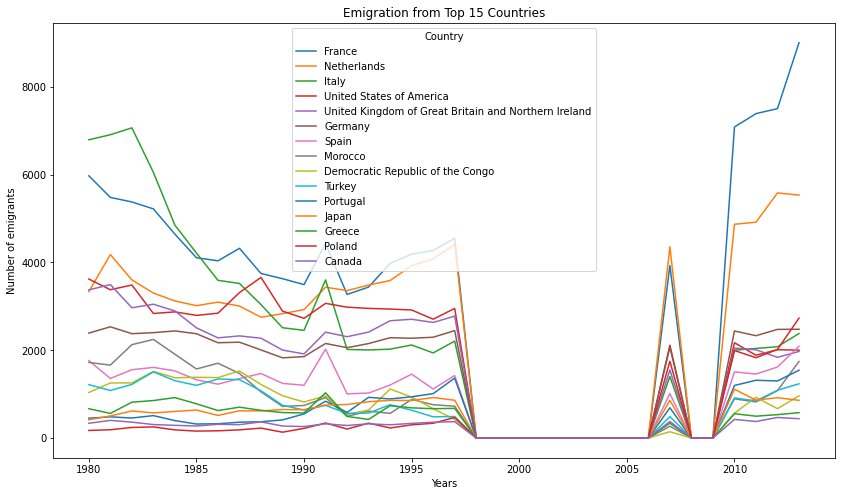

In [175]:
df_top15_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 15 Countries')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show()

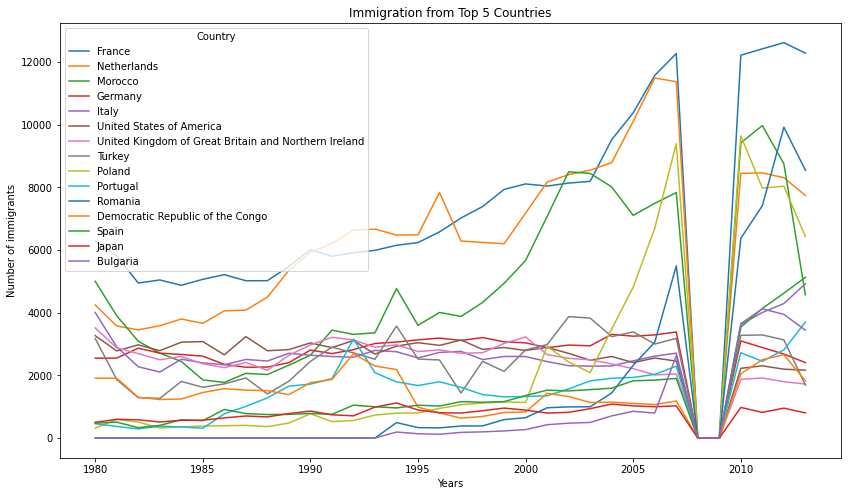

In [176]:
df_top15_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

----------------

In [177]:
# df_top15_no_romania_e = df_belgium_emigrants.head(18)
# df_top15_no_romania_e

In [178]:
# df_top15_no_romania_e.drop(['Total','Belgium','Romania','Unknown'], axis=0, inplace=True)
# df_top15_no_romania_e

-----------------

In [179]:
# df_top15_no_romania_i = df_belgium_immigrants.head(16)
# df_top15_no_romania_i

In [180]:
# df_top15_no_romania_i.drop(['Belgium','Romania'], axis=0, inplace=True)
# df_top15_no_romania_i

In [181]:
# df_top15_no_romania_e = df_top15_no_romania_e[years].transpose()
# df_top15_no_romania_e.head()

In [182]:
# df_top15_no_romania_i = df_top15_no_romania_i[years].transpose()
# df_top15_no_romania_i.head()

In [183]:
# df_top15_no_romania_e.plot(kind='line', figsize=(14, 8))

# plt.title('Emigration from Top 15 Countries without Romania')
# plt.ylabel('Number of Emigrants')
# plt.xlabel('Years')

# plt.show()

In [184]:
# df_top15_no_romania_i.plot(kind='line', figsize=(14, 8))

# plt.title('Immigration from Top 5 Countries without Romania')
# plt.ylabel('Number of immigrants')
# plt.xlabel('Years')

# plt.show()

----------------

In [185]:
df_top15_e = df_belgium_emigrants.head(18)
df_top15_e.drop(['Total','Belgium','Unknown'], axis=0, inplace=True)
df_top15_e.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','China (including Hong Kong Special Administrative Region)':'China','United States of America':'USA','Republic of Moldova':'Moldova'}, inplace=True)
df_top15_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent            Region  \
Country                                                                
France                                      Europe    Western Europe   
Netherlands                                 Europe    Western Europe   
Italy                                       Europe   Southern Europe   
USA                               Northern America  Northern America   
UK                                          Europe   Northern Europe   
Germany                                     Europe    Western Europe   
Spain                                       Europe   Southern Europe   
Morocco                                     Africa   Northern Africa   
Democratic Republic of the Congo            Africa     Middle Africa   
Turkey                                        Asia      Western Asia   
Portugal                                    Europe   Southern Europe   
Japan                                         Asia      Eastern Asia   
Greece                                      Europe   Southern Europe   
Poland                                      Europe    Eastern Europe   
Canada                            Northern America  Northern America   

                                         Development    1980    1981    1982  \
Country                                                                        
France                             Developed regions  5974.0  5481.0  5378.0   
Netherlands                        Developed regions  3336.0  4179.0  3602.0   
Italy                              Developed regions  6794.0  6909.0  7066.0   
USA                                Developed regions  3622.0  3378.0  3486.0   
UK                                 Developed regions  3374.0  3496.0  2967.0   
Germany                            Developed regions  2390.0  2534.0  2377.0   
Spain                              Developed regions  1764.0  1357.0  1556.0   
Morocco                           Developing regions  1722.0  1661.0  2127.0   
Democratic Republic of the Congo  Developing regions  1038.0  1254.0  1256.0   
Turkey                            Developing regions  1216.0  1084.0  1221.0   
Portugal                           Developed regions   452.0   482.0   456.0   
Japan                              Developed regions   415.0   503.0   617.0   
Greece                             Developed regions   668.0   561.0   816.0   
Poland                             Developed regions   173.0   189.0   241.0   
Canada                             Developed regions   336.0   402.0   362.0   

                                    1983    1984    1985    1986  ...  2005  \
Country                                                           ...         
France                            5220.0  4644.0  4108.0  4037.0  ...   0.0   
Netherlands                       3302.0  3123.0  3015.0  3096.0  ...   0.0   
Italy                             6052.0  4849.0  4215.0  3593.0  ...   0.0   
USA                               2837.0  2874.0  2794.0  2844.0  ...   0.0   
UK                                3048.0  2895.0  2510.0  2282.0  ...   0.0   
Germany                           2400.0  2440.0  2376.0  2171.0  ...   0.0   
Spain                             1609.0  1530.0  1327.0  1227.0  ...   0.0   
Morocco                           2246.0  1909.0  1573.0  1704.0  ...   0.0   
Democratic Republic of the Congo  1519.0  1373.0  1383.0  1377.0  ...   0.0   
Turkey                            1506.0  1306.0  1200.0  1345.0  ...   0.0   
Portugal                           511.0   397.0   319.0   325.0  ...   0.0   
Japan                              572.0   606.0   638.0   515.0  ...   0.0   
Greece                             854.0   921.0   780.0   626.0  ...   0.0   
Poland                             253.0   186.0   158.0   165.0  ...   0.0   
Canada                             307.0   289.0   274.0   313.0  ...   0.0   

                                  2006    2007  2008  2009    2010    2011  \
Country                          

In [186]:
df_top15_e.shape

(15, 38)

In [187]:
df_top15_e.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total = df_top15_e['Total']
df_top15_e_total

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Canada                                7878.0
Poland                               14673.0
Greece                               14926.0
Japan                                16850.0
Portugal                             17239.0
Turkey                               21478.0
Democratic Republic of the Congo     22277.0
Morocco                              26689.0
Spain                                32587.0
Germany                              52019.0
UK                                   56435.0
USA                                  65127.0
Italy                                76827.0
Netherlands                          86718.0
France                              113084.0
Name: Total, dtype: float64

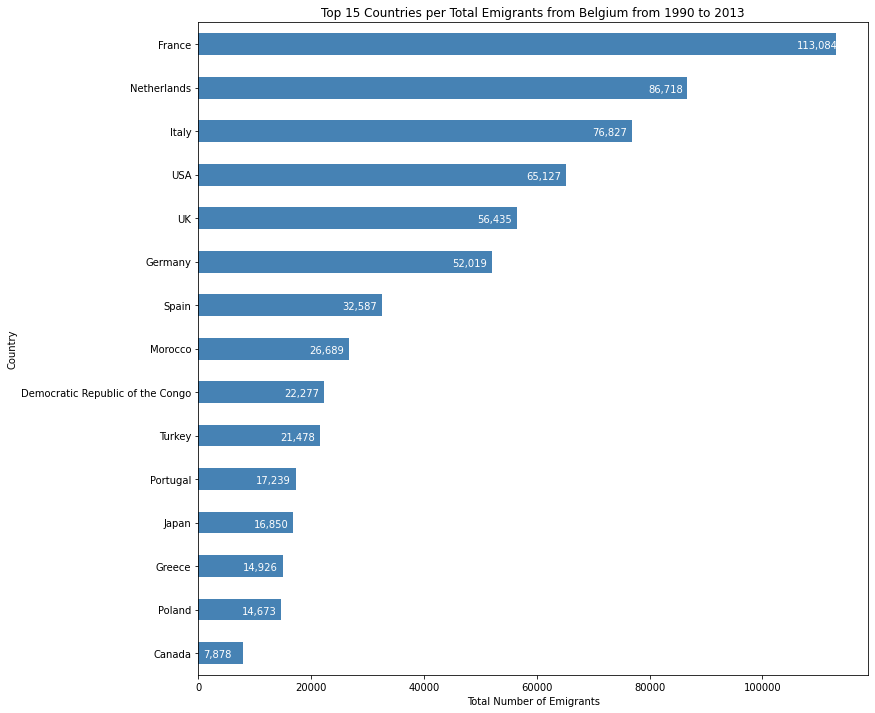

In [188]:
df_top15_e_total.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Belgium from 1990 to 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 7000, index - 0.10), color='white')


plt.show()

-------------

In [189]:
df_top15_i = df_belgium_immigrants.head(16)
df_top15_i.drop(['Belgium'], axis=0, inplace=True)
df_top15_i.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','China (including Hong Kong Special Administrative Region)':'China','United States of America':'USA','Republic of Moldova':'Moldova'}, inplace=True)
df_top15_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent            Region  \
Country                                                                
France                                      Europe    Western Europe   
Netherlands                                 Europe    Western Europe   
Morocco                                     Africa   Northern Africa   
Germany                                     Europe    Western Europe   
Italy                                       Europe   Southern Europe   
USA                               Northern America  Northern America   
UK                                          Europe   Northern Europe   
Turkey                                        Asia      Western Asia   
Poland                                      Europe    Eastern Europe   
Portugal                                    Europe   Southern Europe   
Romania                                     Europe    Eastern Europe   
Democratic Republic of the Congo            Africa     Middle Africa   
Spain                                       Europe   Southern Europe   
Japan                                         Asia      Eastern Asia   
Bulgaria                                    Europe    Eastern Europe   

                                         Development    1980    1981    1982  \
Country                                                                        
France                             Developed regions  6283.0  5815.0  4945.0   
Netherlands                        Developed regions  4245.0  3575.0  3451.0   
Morocco                           Developing regions  5001.0  3902.0  3088.0   
Germany                            Developed regions  2548.0  2551.0  2866.0   
Italy                              Developed regions  4007.0  2908.0  2274.0   
USA                                Developed regions  3267.0  2779.0  2974.0   
UK                                 Developed regions  3514.0  2877.0  2693.0   
Turkey                            Developing regions  3176.0  1865.0  1289.0   
Poland                             Developed regions   314.0   596.0   509.0   
Portugal                           Developed regions   456.0   369.0   291.0   
Romania                            Developed regions     0.0     0.0     0.0   
Democratic Republic of the Congo  Developing regions  1910.0  1908.0  1302.0   
Spain                              Developed regions   474.0   508.0   330.0   
Japan                              Developed regions   503.0   597.0   583.0   
Bulgaria                           Developed regions     0.0     0.0     0.0   

                                    1983    1984    1985    1986  ...  \
Country                                                           ...   
France                            5044.0  4872.0  5065.0  5213.0  ...   
Netherlands                       3583.0  3798.0  3660.0  4058.0  ...   
Morocco                           2709.0  2444.0  1856.0  1775.0  ...   
Germany                           2709.0  2667.0  2612.0  2350.0  ...   
Italy                             2107.0  2515.0  2399.0  2336.0  ...   
USA                               2787.0  3058.0  3078.0  2655.0  ...   
UK                                2497.0  2601.0  2370.0  2246.0  ...   
Turkey                            1265.0  1806.0  1620.0  1727.0  ...   
Poland                             323.0   357.0   381.0   393.0  ...   
Portugal                           380.0   354.0   311.0   772.0  ...   
Romania                              0.0     0.0     0.0     0.0  ...   
Democratic Republic of the Congo  1229.0  1246.0  1453.0  1573.0  ...   
Spain                              404.0   582.0   555.0   911.0  ...   
Japan                              512.0   567.0   568.0   643.0  ...   
Bulgaria                             0.0     0.0     0.0     0.0  ...   

                                     2005     2006     2007  2008  2009  \
Country                                                                   
France                            10378.0  11570.0  12269.0   0

In [190]:
df_top15_i.shape

(15, 38)

In [191]:
df_top15_i.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total = df_top15_i['Total']
df_top15_i_total

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Bulgaria                             22858.0
Japan                                26007.0
Spain                                46649.0
Democratic Republic of the Congo     48031.0
Romania                              50675.0
Portugal                             51223.0
Poland                               77622.0
Turkey                               80736.0
UK                                   82087.0
USA                                  88707.0
Italy                                89327.0
Germany                              91479.0
Morocco                             158284.0
Netherlands                         212265.0
France                              243509.0
Name: Total, dtype: float64

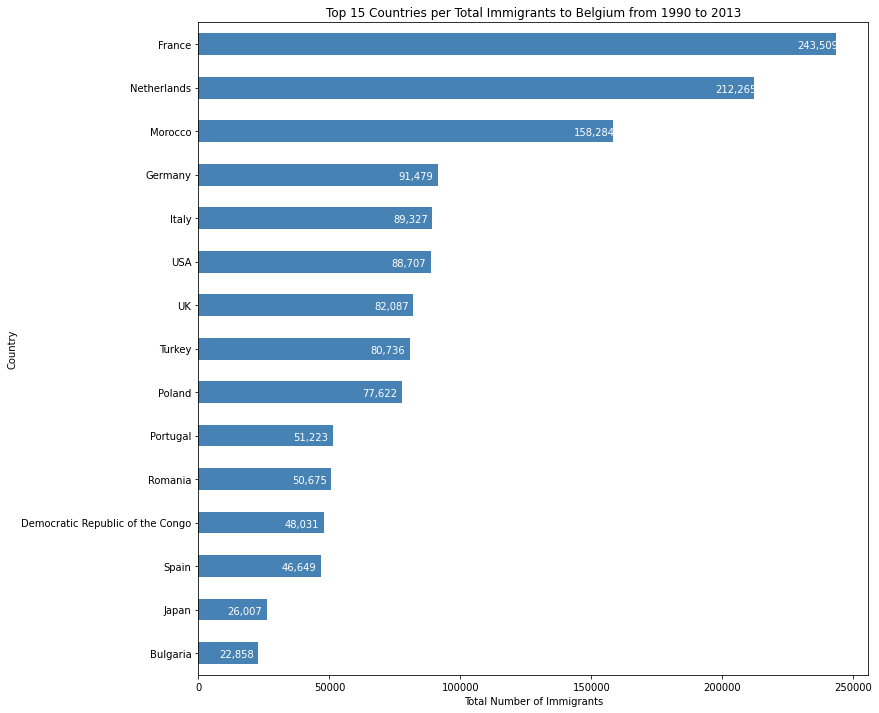

In [192]:
df_top15_i_total.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Belgium from 1990 to 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 15000, index - 0.10), color='white')


plt.show()

---------------

### 4.2.3 Top 15 Countries - Sorted by Total and Continent<a id="4.2.3"></a>

---------------

### Europe

In [193]:
df_top15_e_europe = df_belgium_emigrants[df_belgium_emigrants['Continent']=='Europe']
df_top15_e_europe.head(16)

Continent           Region  \
Country                                                                         
Belgium                                               Europe   Western Europe   
France                                                Europe   Western Europe   
Netherlands                                           Europe   Western Europe   
Italy                                                 Europe  Southern Europe   
United Kingdom of Great Britain and Northern Ir...    Europe  Northern Europe   
Germany                                               Europe   Western Europe   
Spain                                                 Europe  Southern Europe   
Portugal                                              Europe  Southern Europe   
Greece                                                Europe  Southern Europe   
Poland                                                Europe   Eastern Europe   
Romania                                               Europe   Eastern Europe   
Denmark                                               Europe  Northern Europe   
Sweden                                                Europe  Northern Europe   
Ireland                                               Europe  Northern Europe   
Luxembourg                                            Europe   Western Europe   
Switzerland                                           Europe   Western Europe   

                                                          Development  \
Country                                                                 
Belgium                                             Developed regions   
France                                              Developed regions   
Netherlands                                         Developed regions   
Italy                                               Developed regions   
United Kingdom of Great Britain and Northern Ir...  Developed regions   
Germany                                             Developed regions   
Spain                                               Developed regions   
Portugal                                            Developed regions   
Greece                                              Developed regions   
Poland                                              Developed regions   
Romania                                             Developed regions   
Denmark                                             Developed regions   
Sweden                                              Developed regions   
Ireland                                             Developed regions   
Luxembourg                                          Developed regions   
Switzerland                                         Developed regions   

                                                       1980     1981     1982  \
Country                                                                         
Belgium                                             13326.0  20325.0  21497.0   
France                                               5974.0   5481.0   5378.0   
Netherlands                                          3336.0   4179.0   3602.0   
Italy                                                6794.0   6909.0   7066.0   
United Kingdom of Great Britain and Northern Ir...   3374.0   3496.0   2967.0   
Germany                                              2390.0   2534.0   2377.0   
Spain                                                1764.0   1357.0   1556.0   
Portugal                                              452.0    482.0    456.0   
Greece                                                668.0    561.0    816.0   
Poland                                                173.0    189.0    241.0   
Romania                                                 0.0      0.0      0.0   
Denmark                                               195.0    199.0    192.0   
Sweden                                                  0.0      0.0      0.0   
Ireland                                               177.0   

In [194]:
df_top15_e_europe = df_top15_e_europe.head(16)
df_top15_e_europe.drop(['Belgium'], axis=0, inplace=True)
df_top15_e_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia'}, inplace=True)
df_top15_e_europe

Continent           Region        Development    1980    1981  \
Country                                                                     
France         Europe   Western Europe  Developed regions  5974.0  5481.0   
Netherlands    Europe   Western Europe  Developed regions  3336.0  4179.0   
Italy          Europe  Southern Europe  Developed regions  6794.0  6909.0   
UK             Europe  Northern Europe  Developed regions  3374.0  3496.0   
Germany        Europe   Western Europe  Developed regions  2390.0  2534.0   
Spain          Europe  Southern Europe  Developed regions  1764.0  1357.0   
Portugal       Europe  Southern Europe  Developed regions   452.0   482.0   
Greece         Europe  Southern Europe  Developed regions   668.0   561.0   
Poland         Europe   Eastern Europe  Developed regions   173.0   189.0   
Romania        Europe   Eastern Europe  Developed regions     0.0     0.0   
Denmark        Europe  Northern Europe  Developed regions   195.0   199.0   
Sweden         Europe  Northern Europe  Developed regions     0.0     0.0   
Ireland        Europe  Northern Europe  Developed regions   177.0   149.0   
Luxembourg     Europe   Western Europe  Developed regions   230.0   210.0   
Switzerland    Europe   Western Europe  Developed regions   262.0   259.0   

               1982    1983    1984    1985    1986  ...  2005  2006    2007  \
Country                                              ...                       
France       5378.0  5220.0  4644.0  4108.0  4037.0  ...   0.0   0.0  3930.0   
Netherlands  3602.0  3302.0  3123.0  3015.0  3096.0  ...   0.0   0.0  4357.0   
Italy        7066.0  6052.0  4849.0  4215.0  3593.0  ...   0.0   0.0  1403.0   
UK           2967.0  3048.0  2895.0  2510.0  2282.0  ...   0.0   0.0  1551.0   
Germany      2377.0  2400.0  2440.0  2376.0  2171.0  ...   0.0   0.0  2070.0   
Spain        1556.0  1609.0  1530.0  1327.0  1227.0  ...   0.0   0.0  1013.0   
Portugal      456.0   511.0   397.0   319.0   325.0  ...   0.0   0.0   690.0   
Greece        816.0   854.0   921.0   780.0   626.0  ...   0.0   0.0   338.0   
Poland        241.0   253.0   186.0   158.0   165.0  ...   0.0   0.0  1749.0   
Romania         0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   398.0   
Denmark       192.0   213.0   182.0   213.0   162.0  ...   0.0   0.0   233.0   
Sweden          0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   383.0   
Ireland       114.0   117.0   101.0   181.0   153.0  ...   0.0   0.0   169.0   
Luxembourg    228.0   187.0   193.0   194.0   189.0  ...   0.0   0.0   149.0   
Switzerland   228.0   223.0   229.0   170.0   170.0  ...   0.0   0.0   136.0   

             2008  2009    2010    2011    2012    2013     Total  
Country                                                            
France        0.0   0.0  7085.0  7390.0  7504.0  9006.0  113084.0  
Netherlands   0.0   0.0  4870.0  4917.0  5584.0  5534.0   86718.0  
Italy         0.0   0.0  2001.0  2041.0  2080.0  2381.0   76827.0  
UK            0.0   0.0  2049.0  2010.0  1839.0  1972.0   56435.0  
Germany       0.0   0.0  2439.0  2331.0  2475.0  2478.0   52019.0  
Spain         0.0   0.0  1507.0  1457.0  1618.0  2090.0   32587.0  
Portugal      0.0   0.0  1197.0  1316.0  1300.0  1545.0   17239.0  
Greece        0.0   0.0   554.0   498.0   533.0   578.0   14926.0  
Poland        0.0   0.0  1993.0  1830.0  2018.0  2732.0   14673.0  
Romania       0.0   0.0   943.0  1039.0  1406.0  2764.0    7733.0  
Denmark       0.0   0.0   321.0   308.0   270.0   291.0    5803.0  
Sweden        0.0   0.0   482.0   496.0   412.0   443.0    4973.0  
Ireland       0.0   0.0   267.0   295.0   268.0   349.0    4970.0  
Luxembourg    0.0   0.0   169.0   190.0   174.0   192.0    4115.0  
Switzerland   0.0   0.0   187.0   144.0   180.0   160.0    3919.0  

[15 rows x 38 columns]

In [195]:
df_top15_e_europe.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_europe = df_top15_e_europe['Total']
df_top15_e_total_europe

Country
Switzerland      3919.0
Luxembourg       4115.0
Ireland          4970.0
Sweden           4973.0
Denmark          5803.0
Romania          7733.0
Poland          14673.0
Greece          14926.0
Portugal        17239.0
Spain           32587.0
Germany         52019.0
UK              56435.0
Italy           76827.0
Netherlands     86718.0
France         113084.0
Name: Total, dtype: float64

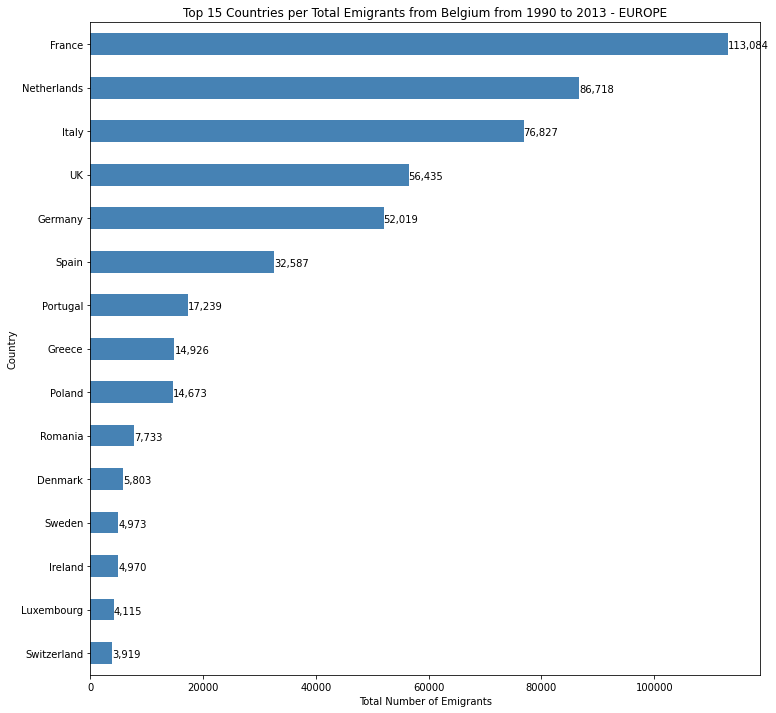

In [196]:
df_top15_e_total_europe.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Belgium from 1990 to 2013 - EUROPE') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_europe): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='Black')


plt.show()

------------

In [197]:
df_top15_i_europe = df_belgium_immigrants[df_belgium_immigrants['Continent']=='Europe']
df_top15_i_europe.head(16)

Continent           Region  \
Country                                                                         
Belgium                                               Europe   Western Europe   
France                                                Europe   Western Europe   
Netherlands                                           Europe   Western Europe   
Germany                                               Europe   Western Europe   
Italy                                                 Europe  Southern Europe   
United Kingdom of Great Britain and Northern Ir...    Europe  Northern Europe   
Poland                                                Europe   Eastern Europe   
Portugal                                              Europe  Southern Europe   
Romania                                               Europe   Eastern Europe   
Spain                                                 Europe  Southern Europe   
Bulgaria                                              Europe   Eastern Europe   
Greece                                                Europe  Southern Europe   
Russian Federation                                    Europe   Eastern Europe   
Sweden                                                Europe  Northern Europe   
Denmark                                               Europe  Northern Europe   
Ireland                                               Europe  Northern Europe   

                                                          Development    1980  \
Country                                                                         
Belgium                                             Developed regions  7834.0   
France                                              Developed regions  6283.0   
Netherlands                                         Developed regions  4245.0   
Germany                                             Developed regions  2548.0   
Italy                                               Developed regions  4007.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions  3514.0   
Poland                                              Developed regions   314.0   
Portugal                                            Developed regions   456.0   
Romania                                             Developed regions     0.0   
Spain                                               Developed regions   474.0   
Bulgaria                                            Developed regions     0.0   
Greece                                              Developed regions   478.0   
Russian Federation                                  Developed regions     0.0   
Sweden                                              Developed regions     0.0   
Denmark                                             Developed regions   260.0   
Ireland                                             Developed regions   169.0   

                                                      1981    1982    1983  \
Country                                                                      
Belgium                                             7979.0  8479.0  9310.0   
France                                              5815.0  4945.0  5044.0   
Netherlands                                         3575.0  3451.0  3583.0   
Germany                                             2551.0  2866.0  2709.0   
Italy                                               2908.0  2274.0  2107.0   
United Kingdom of Great Britain and Northern Ir...  2877.0  2693.0  2497.0   
Poland                                               596.0   509.0   323.0   
Portugal                                             369.0   291.0   380.0   
Romania                                                0.0     0.0     0.0   
Spain                                                508.0   330.0   404.0   
Bulgaria                                               0.0     0.0     0.0   
Greece                                               752.0   584.0   655.0   
Russian Federation                       

In [198]:
df_top15_i_europe = df_top15_i_europe.head(16)
df_top15_i_europe.drop(['Belgium'], axis=0, inplace=True)
df_top15_i_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia'}, inplace=True)
df_top15_i_europe

Continent           Region        Development    1980  \
Country                                                                    
France                Europe   Western Europe  Developed regions  6283.0   
Netherlands           Europe   Western Europe  Developed regions  4245.0   
Germany               Europe   Western Europe  Developed regions  2548.0   
Italy                 Europe  Southern Europe  Developed regions  4007.0   
UK                    Europe  Northern Europe  Developed regions  3514.0   
Poland                Europe   Eastern Europe  Developed regions   314.0   
Portugal              Europe  Southern Europe  Developed regions   456.0   
Romania               Europe   Eastern Europe  Developed regions     0.0   
Spain                 Europe  Southern Europe  Developed regions   474.0   
Bulgaria              Europe   Eastern Europe  Developed regions     0.0   
Greece                Europe  Southern Europe  Developed regions   478.0   
Russian Federation    Europe   Eastern Europe  Developed regions     0.0   
Sweden                Europe  Northern Europe  Developed regions     0.0   
Denmark               Europe  Northern Europe  Developed regions   260.0   
Ireland               Europe  Northern Europe  Developed regions   169.0   

                      1981    1982    1983    1984    1985    1986  ...  \
Country                                                             ...   
France              5815.0  4945.0  5044.0  4872.0  5065.0  5213.0  ...   
Netherlands         3575.0  3451.0  3583.0  3798.0  3660.0  4058.0  ...   
Germany             2551.0  2866.0  2709.0  2667.0  2612.0  2350.0  ...   
Italy               2908.0  2274.0  2107.0  2515.0  2399.0  2336.0  ...   
UK                  2877.0  2693.0  2497.0  2601.0  2370.0  2246.0  ...   
Poland               596.0   509.0   323.0   357.0   381.0   393.0  ...   
Portugal             369.0   291.0   380.0   354.0   311.0   772.0  ...   
Romania                0.0     0.0     0.0     0.0     0.0     0.0  ...   
Spain                508.0   330.0   404.0   582.0   555.0   911.0  ...   
Bulgaria               0.0     0.0     0.0     0.0     0.0     0.0  ...   
Greece               752.0   584.0   655.0   568.0   504.0   505.0  ...   
Russian Federation     0.0     0.0     0.0     0.0     0.0     0.0  ...   
Sweden                 0.0     0.0     0.0     0.0     0.0     0.0  ...   
Denmark              311.0   170.0   214.0   215.0   258.0   262.0  ...   
Ireland              147.0   122.0   155.0   245.0   243.0   194.0  ...   

                       2005     2006     2007  2008  2009     2010     2011  \
Country                                                                       
France              10378.0  11570.0  12269.0   0.0   0.0  12214.0  12419.0   
Netherlands         10109.0  11488.0  11370.0   0.0   0.0   8445.0   8461.0   
Germany              3250.0   3290.0   3385.0   0.0   0.0   3099.0   2886.0   
Italy                2464.0   2613.0   2708.0   0.0   0.0   3625.0   4006.0   
UK                   2213.0   2015.0   2042.0   0.0   0.0   1874.0   1915.0   
Poland               4816.0   6694.0   9393.0   0.0   0.0   9639.0   7976.0   
Portugal             1934.0   2030.0   2293.0   0.0   0.0   2723.0   2448.0   
Romania              2322.0   3059.0   5491.0   0.0   0.0   6373.0   7412.0   
Spain                1827.0   1848.0   1902.0   0.0   0.0   3537.0   4134.0   
Bulgaria              853.0    797.0   2625.0   0.0   0.0   3651.0   4122.0   
Greece                716.0    558.0    495.0   0.0   0.0    715.0    684.0   
Russian Federation    647.0    760.0    783.0   0.0   0.0   2777.0   2481.0   
Sweden                481.0    521.0    491.0   0.0   0.0    434.0    413.0   
Denmark               343.0    318.0    295.0   0.0   0.0    239.0    190.0   
Ireland               286.0    256.0    228.0   0.0   0.0    350.0    365.0   

                       2012     2013     Total  
Country                                         
France  

In [199]:
df_top15_i_europe.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_europe = df_top15_i_europe['Total']
df_top15_i_total_europe

Country
Ireland                 9561.0
Denmark                 9987.0
Sweden                 10739.0
Russian Federation     14924.0
Greece                 21179.0
Bulgaria               22858.0
Spain                  46649.0
Romania                50675.0
Portugal               51223.0
Poland                 77622.0
UK                     82087.0
Italy                  89327.0
Germany                91479.0
Netherlands           212265.0
France                243509.0
Name: Total, dtype: float64

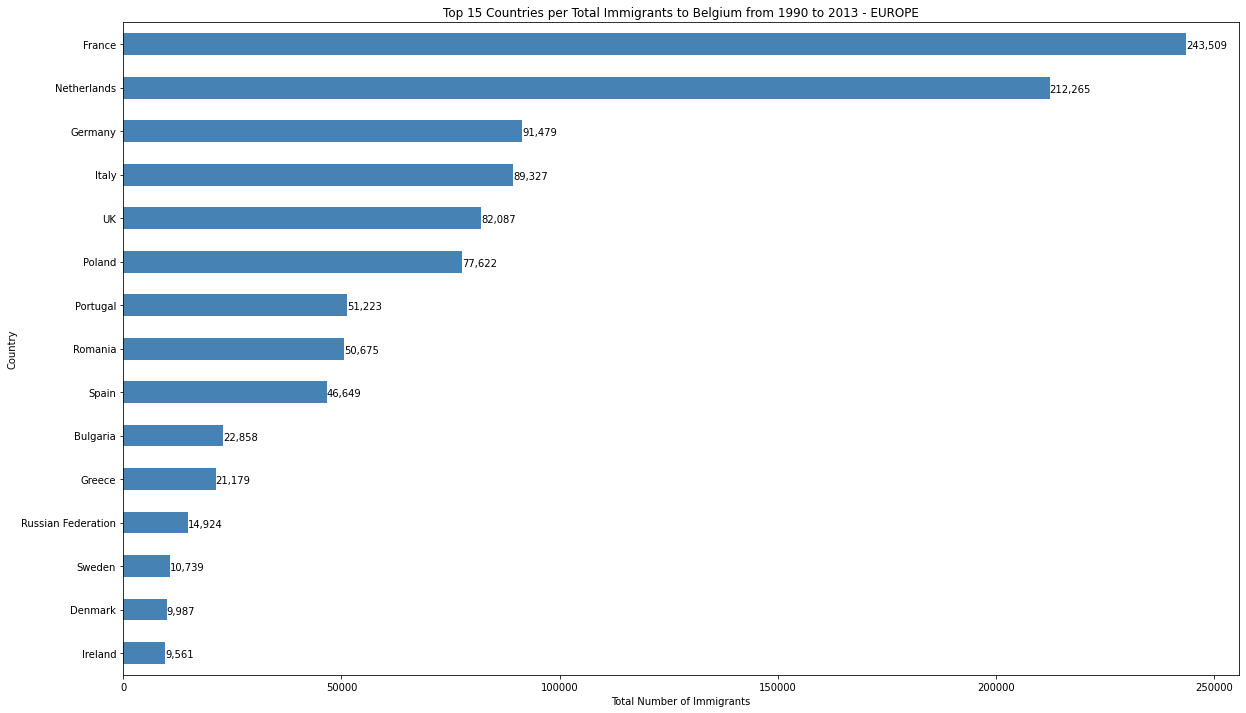

In [200]:
df_top15_i_total_europe.plot(kind='barh', figsize=(20, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Belgium from 1990 to 2013 - EUROPE') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_europe): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Africa

In [201]:
df_top15_e_africa = df_belgium_emigrants[df_belgium_emigrants['Continent']=='Africa']
df_top15_e_africa.head(15)

Continent           Region  \
Country                                                       
Morocco                             Africa  Northern Africa   
Democratic Republic of the Congo    Africa    Middle Africa   
Algeria                             Africa  Northern Africa   
Tunisia                             Africa  Northern Africa   
Cameroon                            Africa    Middle Africa   
Ghana                               Africa   Western Africa   
Guinea                              Africa   Western Africa   
Rwanda                              Africa   Eastern Africa   
Nigeria                             Africa   Western Africa   
Côte d'Ivoire                       Africa   Western Africa   
Angola                              Africa    Middle Africa   
Burundi                             Africa   Eastern Africa   
South Africa                        Africa  Southern Africa   
Senegal                             Africa   Western Africa   
Ethiopia                            Africa   Eastern Africa   

                                         Development    1980    1981    1982  \
Country                                                                        
Morocco                           Developing regions  1722.0  1661.0  2127.0   
Democratic Republic of the Congo  Developing regions  1038.0  1254.0  1256.0   
Algeria                           Developing regions   546.0   449.0   577.0   
Tunisia                           Developing regions   490.0   448.0   535.0   
Cameroon                          Developing regions     0.0     0.0     0.0   
Ghana                             Developing regions     0.0     0.0     0.0   
Guinea                            Developing regions     0.0     0.0     0.0   
Rwanda                            Developing regions     0.0     0.0     0.0   
Nigeria                           Developing regions     0.0     0.0     0.0   
Côte d'Ivoire                     Developing regions     0.0     0.0     0.0   
Angola                            Developing regions     0.0     0.0     0.0   
Burundi                           Developing regions     0.0     0.0     0.0   
South Africa                      Developing regions     0.0     0.0     0.0   
Senegal                           Developing regions     0.0     0.0     0.0   
Ethiopia                          Developing regions     0.0     0.0     0.0   

                                    1983    1984    1985    1986  ...  2005  \
Country                                                           ...         
Morocco                           2246.0  1909.0  1573.0  1704.0  ...   0.0   
Democratic Republic of the Congo  1519.0  1373.0  1383.0  1377.0  ...   0.0   
Algeria                            503.0   405.0   368.0   345.0  ...   0.0   
Tunisia                            482.0   386.0   343.0   253.0  ...   0.0   
Cameroon                             0.0     0.0     0.0     0.0  ...   0.0   
Ghana                                0.0     0.0     0.0     0.0  ...   0.0   
Guinea                               0.0     0.0     0.0     0.0  ...   0.0   
Rwanda                               0.0     0.0     0.0     0.0  ...   0.0   
Nigeria                              0.0     0.0     0.0     0.0  ...   0.0   
Côte d'Ivoire                        0.0     0.0     0.0     0.0  ...   0.0   
Angola                               0.0     0.0     0.0     0.0  ...   0.0   
Burundi                              0.0     0.0     0.0     0.0  ...   0.0   
South Africa                         0.0     0.0     0.0     0.0  ...   0.0   
Senegal                              0.0     0.0     0.0     0.0  ...   0.0   
Ethiopia                             0.0     0.0     0.0     0.0  ...   0.0   

                                  2006   2007  2008  2009   2010   2011  \
Country                                                                   
Morocco                            0.0  269.0   0.0   0.0  893.0  822.0   
Democratic Republic of the Cong

In [202]:
df_top15_e_africa = df_top15_e_africa.head(15)
df_top15_e_africa

Continent           Region  \
Country                                                       
Morocco                             Africa  Northern Africa   
Democratic Republic of the Congo    Africa    Middle Africa   
Algeria                             Africa  Northern Africa   
Tunisia                             Africa  Northern Africa   
Cameroon                            Africa    Middle Africa   
Ghana                               Africa   Western Africa   
Guinea                              Africa   Western Africa   
Rwanda                              Africa   Eastern Africa   
Nigeria                             Africa   Western Africa   
Côte d'Ivoire                       Africa   Western Africa   
Angola                              Africa    Middle Africa   
Burundi                             Africa   Eastern Africa   
South Africa                        Africa  Southern Africa   
Senegal                             Africa   Western Africa   
Ethiopia                            Africa   Eastern Africa   

                                         Development    1980    1981    1982  \
Country                                                                        
Morocco                           Developing regions  1722.0  1661.0  2127.0   
Democratic Republic of the Congo  Developing regions  1038.0  1254.0  1256.0   
Algeria                           Developing regions   546.0   449.0   577.0   
Tunisia                           Developing regions   490.0   448.0   535.0   
Cameroon                          Developing regions     0.0     0.0     0.0   
Ghana                             Developing regions     0.0     0.0     0.0   
Guinea                            Developing regions     0.0     0.0     0.0   
Rwanda                            Developing regions     0.0     0.0     0.0   
Nigeria                           Developing regions     0.0     0.0     0.0   
Côte d'Ivoire                     Developing regions     0.0     0.0     0.0   
Angola                            Developing regions     0.0     0.0     0.0   
Burundi                           Developing regions     0.0     0.0     0.0   
South Africa                      Developing regions     0.0     0.0     0.0   
Senegal                           Developing regions     0.0     0.0     0.0   
Ethiopia                          Developing regions     0.0     0.0     0.0   

                                    1983    1984    1985    1986  ...  2005  \
Country                                                           ...         
Morocco                           2246.0  1909.0  1573.0  1704.0  ...   0.0   
Democratic Republic of the Congo  1519.0  1373.0  1383.0  1377.0  ...   0.0   
Algeria                            503.0   405.0   368.0   345.0  ...   0.0   
Tunisia                            482.0   386.0   343.0   253.0  ...   0.0   
Cameroon                             0.0     0.0     0.0     0.0  ...   0.0   
Ghana                                0.0     0.0     0.0     0.0  ...   0.0   
Guinea                               0.0     0.0     0.0     0.0  ...   0.0   
Rwanda                               0.0     0.0     0.0     0.0  ...   0.0   
Nigeria                              0.0     0.0     0.0     0.0  ...   0.0   
Côte d'Ivoire                        0.0     0.0     0.0     0.0  ...   0.0   
Angola                               0.0     0.0     0.0     0.0  ...   0.0   
Burundi                              0.0     0.0     0.0     0.0  ...   0.0   
South Africa                         0.0     0.0     0.0     0.0  ...   0.0   
Senegal                              0.0     0.0     0.0     0.0  ...   0.0   
Ethiopia                             0.0     0.0     0.0     0.0  ...   0.0   

                                  2006   2007  2008  2009   2010   2011  \
Country                                                                   
Morocco                            0.0  269.0   0.0   0.0  893.0  822.0   
Democratic Republic of the Cong

In [203]:
df_top15_e_africa.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_africa = df_top15_e_africa['Total']
df_top15_e_total_africa

Country
Ethiopia                              419.0
Senegal                               430.0
South Africa                          473.0
Burundi                               746.0
Angola                                768.0
Côte d'Ivoire                         785.0
Nigeria                               876.0
Rwanda                                978.0
Guinea                               1335.0
Ghana                                1684.0
Cameroon                             2098.0
Tunisia                              5724.0
Algeria                              6252.0
Democratic Republic of the Congo    22277.0
Morocco                             26689.0
Name: Total, dtype: float64

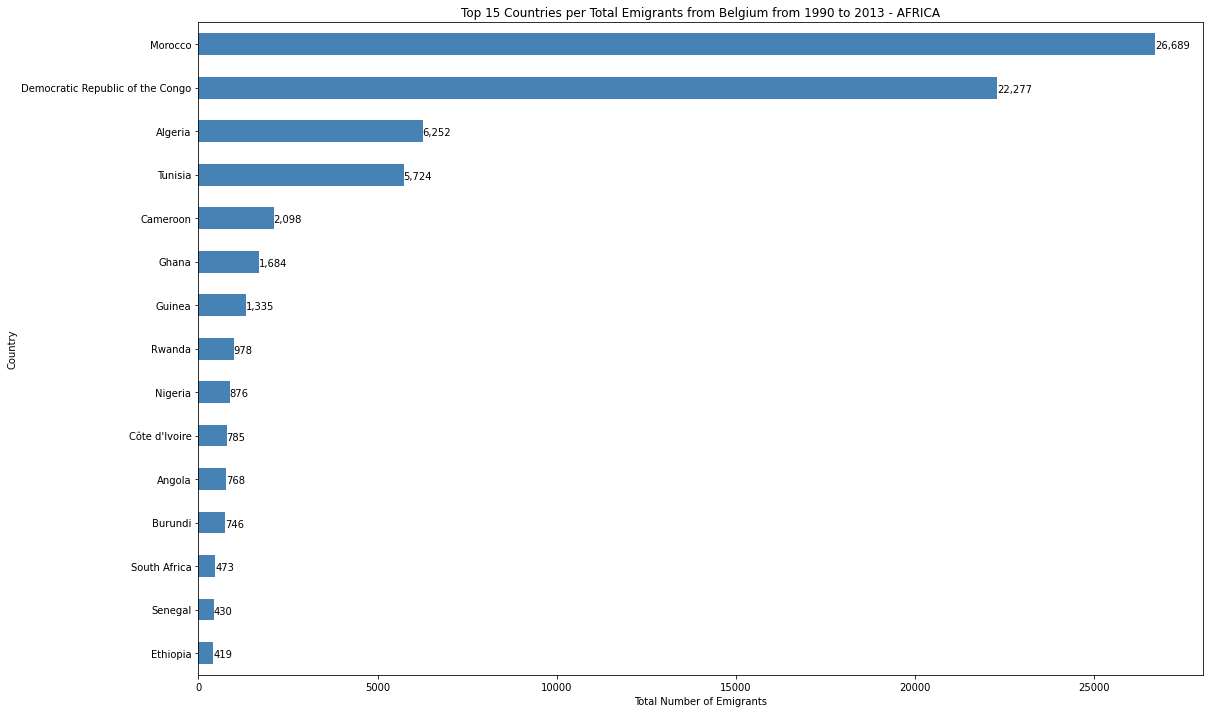

In [204]:
df_top15_e_total_africa.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Belgium from 1990 to 2013 - AFRICA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_africa): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [205]:
df_top15_i_africa = df_belgium_immigrants[df_belgium_immigrants['Continent']=='Africa']
df_top15_i_africa.head(15)

Continent           Region  \
Country                                                       
Morocco                             Africa  Northern Africa   
Democratic Republic of the Congo    Africa    Middle Africa   
Algeria                             Africa  Northern Africa   
Tunisia                             Africa  Northern Africa   
Cameroon                            Africa    Middle Africa   
Guinea                              Africa   Western Africa   
Ghana                               Africa   Western Africa   
Rwanda                              Africa   Eastern Africa   
Nigeria                             Africa   Western Africa   
Senegal                             Africa   Western Africa   
Côte d'Ivoire                       Africa   Western Africa   
Burundi                             Africa   Eastern Africa   
Egypt                               Africa  Northern Africa   
South Africa                        Africa  Southern Africa   
Togo                                Africa   Western Africa   

                                         Development    1980    1981    1982  \
Country                                                                        
Morocco                           Developing regions  5001.0  3902.0  3088.0   
Democratic Republic of the Congo  Developing regions  1910.0  1908.0  1302.0   
Algeria                           Developing regions   604.0   461.0   309.0   
Tunisia                           Developing regions   622.0   442.0   324.0   
Cameroon                          Developing regions     0.0     0.0     0.0   
Guinea                            Developing regions     0.0     0.0     0.0   
Ghana                             Developing regions     0.0     0.0     0.0   
Rwanda                            Developing regions     0.0     0.0     0.0   
Nigeria                           Developing regions     0.0     0.0     0.0   
Senegal                           Developing regions     0.0     0.0     0.0   
Côte d'Ivoire                     Developing regions     0.0     0.0     0.0   
Burundi                           Developing regions     0.0     0.0     0.0   
Egypt                             Developing regions     0.0     0.0     0.0   
South Africa                      Developing regions     0.0     0.0     0.0   
Togo                              Developing regions     0.0     0.0     0.0   

                                    1983    1984    1985    1986  ...    2005  \
Country                                                           ...           
Morocco                           2709.0  2444.0  1856.0  1775.0  ...  7106.0   
Democratic Republic of the Congo  1229.0  1246.0  1453.0  1573.0  ...  1105.0   
Algeria                            276.0   313.0   344.0   349.0  ...   725.0   
Tunisia                            282.0   268.0   245.0   284.0  ...   494.0   
Cameroon                             0.0     0.0     0.0     0.0  ...   618.0   
Guinea                               0.0     0.0     0.0     0.0  ...   160.0   
Ghana                                0.0     0.0     0.0     0.0  ...   529.0   
Rwanda                               0.0     0.0     0.0     0.0  ...   160.0   
Nigeria                              0.0     0.0     0.0     0.0  ...   349.0   
Senegal                              0.0     0.0     0.0     0.0  ...   226.0   
Côte d'Ivoire                        0.0     0.0     0.0     0.0  ...   210.0   
Burundi                              0.0     0.0     0.0     0.0  ...   127.0   
Egypt                                0.0     0.0     0.0     0.0  ...   174.0   
South Africa                         0.0     0.0     0.0     0.0  ...   144.0   
Togo                                 0.0     0.0     0.0     0.0  ...   144.0   

                                    2006    2007  2008  2009    2010    2011  \
Country                                                                        
Morocco                           7488.0  7831.0   0.0   0.0  

In [206]:
df_top15_i_africa = df_top15_i_africa.head(15)
df_top15_i_africa

Continent           Region  \
Country                                                       
Morocco                             Africa  Northern Africa   
Democratic Republic of the Congo    Africa    Middle Africa   
Algeria                             Africa  Northern Africa   
Tunisia                             Africa  Northern Africa   
Cameroon                            Africa    Middle Africa   
Guinea                              Africa   Western Africa   
Ghana                               Africa   Western Africa   
Rwanda                              Africa   Eastern Africa   
Nigeria                             Africa   Western Africa   
Senegal                             Africa   Western Africa   
Côte d'Ivoire                       Africa   Western Africa   
Burundi                             Africa   Eastern Africa   
Egypt                               Africa  Northern Africa   
South Africa                        Africa  Southern Africa   
Togo                                Africa   Western Africa   

                                         Development    1980    1981    1982  \
Country                                                                        
Morocco                           Developing regions  5001.0  3902.0  3088.0   
Democratic Republic of the Congo  Developing regions  1910.0  1908.0  1302.0   
Algeria                           Developing regions   604.0   461.0   309.0   
Tunisia                           Developing regions   622.0   442.0   324.0   
Cameroon                          Developing regions     0.0     0.0     0.0   
Guinea                            Developing regions     0.0     0.0     0.0   
Ghana                             Developing regions     0.0     0.0     0.0   
Rwanda                            Developing regions     0.0     0.0     0.0   
Nigeria                           Developing regions     0.0     0.0     0.0   
Senegal                           Developing regions     0.0     0.0     0.0   
Côte d'Ivoire                     Developing regions     0.0     0.0     0.0   
Burundi                           Developing regions     0.0     0.0     0.0   
Egypt                             Developing regions     0.0     0.0     0.0   
South Africa                      Developing regions     0.0     0.0     0.0   
Togo                              Developing regions     0.0     0.0     0.0   

                                    1983    1984    1985    1986  ...    2005  \
Country                                                           ...           
Morocco                           2709.0  2444.0  1856.0  1775.0  ...  7106.0   
Democratic Republic of the Congo  1229.0  1246.0  1453.0  1573.0  ...  1105.0   
Algeria                            276.0   313.0   344.0   349.0  ...   725.0   
Tunisia                            282.0   268.0   245.0   284.0  ...   494.0   
Cameroon                             0.0     0.0     0.0     0.0  ...   618.0   
Guinea                               0.0     0.0     0.0     0.0  ...   160.0   
Ghana                                0.0     0.0     0.0     0.0  ...   529.0   
Rwanda                               0.0     0.0     0.0     0.0  ...   160.0   
Nigeria                              0.0     0.0     0.0     0.0  ...   349.0   
Senegal                              0.0     0.0     0.0     0.0  ...   226.0   
Côte d'Ivoire                        0.0     0.0     0.0     0.0  ...   210.0   
Burundi                              0.0     0.0     0.0     0.0  ...   127.0   
Egypt                                0.0     0.0     0.0     0.0  ...   174.0   
South Africa                         0.0     0.0     0.0     0.0  ...   144.0   
Togo                                 0.0     0.0     0.0     0.0  ...   144.0   

                                    2006    2007  2008  2009    2010    2011  \
Country                                                                        
Morocco                           7488.0  7831.0   0.0   0.0  

In [207]:
df_top15_i_africa.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_africa = df_top15_i_africa['Total']
df_top15_i_total_africa

Country
Togo                                  2229.0
South Africa                          2479.0
Egypt                                 2945.0
Burundi                               3077.0
Côte d'Ivoire                         3726.0
Senegal                               3963.0
Nigeria                               4820.0
Rwanda                                5057.0
Ghana                                 7141.0
Guinea                                7957.0
Cameroon                             11008.0
Tunisia                              13198.0
Algeria                              18314.0
Democratic Republic of the Congo     48031.0
Morocco                             158284.0
Name: Total, dtype: float64

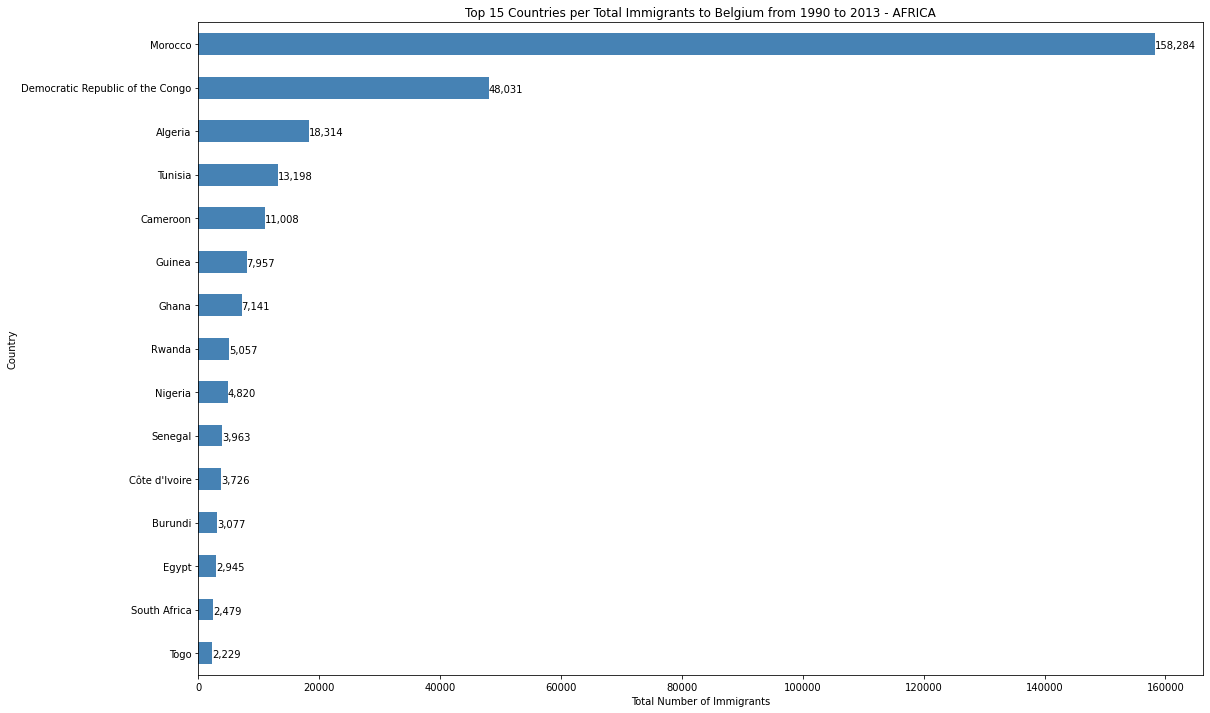

In [208]:
df_top15_i_total_africa.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Belgium from 1990 to 2013 - AFRICA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_africa): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Asia

In [209]:
df_top15_e_asia = df_belgium_emigrants[df_belgium_emigrants['Continent']=='Asia']
df_top15_e_asia.head(16)

Continent  \
Country                                                        
Turkey                                                  Asia   
Japan                                                   Asia   
India                                                   Asia   
China (including Hong Kong Special Administrati...      Asia   
Pakistan                                                Asia   
Israel                                                  Asia   
Iran (Islamic Republic of)                              Asia   
Philippines                                             Asia   
Iraq                                                    Asia   
Armenia                                                 Asia   
Indonesia                                               Asia   
Thailand                                                Asia   
Lebanon                                                 Asia   
Viet Nam                                                Asia   
Afghanistan                                             Asia   
Republic of Korea                                       Asia   

                                                                Region  \
Country                                                                  
Turkey                                                    Western Asia   
Japan                                                     Eastern Asia   
India                                                    Southern Asia   
China (including Hong Kong Special Administrati...        Eastern Asia   
Pakistan                                                 Southern Asia   
Israel                                                    Western Asia   
Iran (Islamic Republic of)                               Southern Asia   
Philippines                                         South-Eastern Asia   
Iraq                                                      Western Asia   
Armenia                                                   Western Asia   
Indonesia                                           South-Eastern Asia   
Thailand                                            South-Eastern Asia   
Lebanon                                                   Western Asia   
Viet Nam                                            South-Eastern Asia   
Afghanistan                                              Southern Asia   
Republic of Korea                                         Eastern Asia   

                                                           Development  \
Country                                                                  
Turkey                                              Developing regions   
Japan                                                Developed regions   
India                                               Developing regions   
China (including Hong Kong Special Administrati...  Developing regions   
Pakistan                                            Developing regions   
Israel                                              Developing regions   
Iran (Islamic Republic of)                          Developing regions   
Philippines                                         Developing regions   
Iraq                                                Developing regions   
Armenia                                             Developing regions   
Indonesia                                           Developing regions   
Thailand                                            Developing regions   
Lebanon                                             Developing regions   
Viet Nam                                            Developing regions   
Afghanistan                                         Developing regions   
Republic of Korea                                   Developing regions   

                                                      1980    1981    1982  \
Country                                                                      
Turkey                                              1216.0  1084.0  1221.0  

In [210]:
df_top15_e_asia = df_top15_e_asia.head(15)
df_top15_e_asia.rename(index={'China (including Hong Kong Special Administrative Region)':'China','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria'}, inplace=True)
df_top15_e_asia

Continent              Region         Development    1980    1981  \
Country                                                                         
Turkey           Asia        Western Asia  Developing regions  1216.0  1084.0   
Japan            Asia        Eastern Asia   Developed regions   415.0   503.0   
India            Asia       Southern Asia  Developing regions     0.0     0.0   
China            Asia        Eastern Asia  Developing regions     0.0     0.0   
Pakistan         Asia       Southern Asia  Developing regions     0.0     0.0   
Israel           Asia        Western Asia  Developing regions     0.0     0.0   
Iran             Asia       Southern Asia  Developing regions     0.0     0.0   
Philippines      Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Iraq             Asia        Western Asia  Developing regions     0.0     0.0   
Armenia          Asia        Western Asia  Developing regions     0.0     0.0   
Indonesia        Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Thailand         Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Lebanon          Asia        Western Asia  Developing regions     0.0     0.0   
Viet Nam         Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Afghanistan      Asia       Southern Asia  Developing regions     0.0     0.0   

               1982    1983    1984    1985    1986  ...  2005  2006   2007  \
Country                                              ...                      
Turkey       1221.0  1506.0  1306.0  1200.0  1345.0  ...   0.0   0.0  488.0   
Japan         617.0   572.0   606.0   638.0   515.0  ...   0.0   0.0  860.0   
India           0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0  726.0   
China           0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0  417.0   
Pakistan        0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   35.0   
Israel          0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   66.0   
Iran            0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   22.0   
Philippines     0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   77.0   
Iraq            0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0    3.0   
Armenia         0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   13.0   
Indonesia       0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   45.0   
Thailand        0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0  100.0   
Lebanon         0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   15.0   
Viet Nam        0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0   55.0   
Afghanistan     0.0     0.0     0.0     0.0     0.0  ...   0.0   0.0    4.0   

             2008  2009    2010   2011    2012    2013    Total  
Country                                                          
Turkey        0.0   0.0   914.0  845.0  1089.0  1236.0  21478.0  
Japan         0.0   0.0  1111.0  864.0   918.0   859.0  16850.0  
India         0.0   0.0   751.0  878.0   898.0  1104.0   6155.0  
China         0.0   0.0   783.0  580.0   715.0   689.0   4981.0  
Pakistan      0.0   0.0   143.0  154.0   169.0   500.0   1688.0  
Israel        0.0   0.0   142.0  119.0    96.0   135.0   1609.0  
Iran          0.0   0.0   178.0  160.0   235.0   226.0   1277.0  
Philippines   0.0   0.0   100.0  106.0   116.0   160.0   1251.0  
Iraq          0.0   0.0   144.0  206.0   350.0   483.0   1186.0  
Armenia       0.0   0.0   113.0   70.0   375.0   575.0   1146.0  
Indonesia     0.0   0.0    88.0   68.0    77.0    79.0   1015.0  
Thailand      0.0   0.0   111.0  101.0   140.0   134.0    937.0  
Lebanon       0.0   0.0    72.0  127.0    95.0   131.0    905.0  
Viet Nam      0.0   0.0   136.0  130.0   152.0   138.0    837.0  
Afghanistan   0.0   0.0    72.0  109.0   107.0   541.0    833.0  

[15 rows x 38 columns]

In [211]:
df_top15_e_asia.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_asia = df_top15_e_asia['Total']
df_top15_e_total_asia

Country
Afghanistan      833.0
Viet Nam         837.0
Lebanon          905.0
Thailand         937.0
Indonesia       1015.0
Armenia         1146.0
Iraq            1186.0
Philippines     1251.0
Iran            1277.0
Israel          1609.0
Pakistan        1688.0
China           4981.0
India           6155.0
Japan          16850.0
Turkey         21478.0
Name: Total, dtype: float64

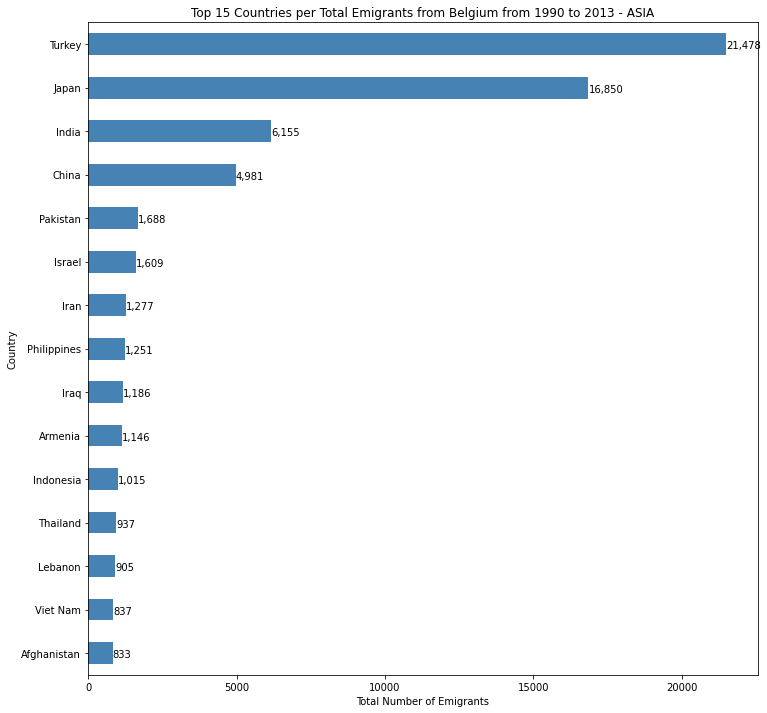

In [212]:
df_top15_e_total_asia.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Belgium from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_asia): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [213]:
df_top15_i_asia = df_belgium_immigrants[df_belgium_immigrants['Continent']=='Asia']
df_top15_i_asia.head(15)

Continent              Region         Development  \
Country                                                                        
Turkey                          Asia        Western Asia  Developing regions   
Japan                           Asia        Eastern Asia   Developed regions   
China                           Asia        Eastern Asia  Developing regions   
India                           Asia       Southern Asia  Developing regions   
Pakistan                        Asia       Southern Asia  Developing regions   
Philippines                     Asia  South-Eastern Asia  Developing regions   
Thailand                        Asia  South-Eastern Asia  Developing regions   
Afghanistan                     Asia       Southern Asia  Developing regions   
Iraq                            Asia        Western Asia  Developing regions   
Armenia                         Asia        Western Asia  Developing regions   
Iran (Islamic Republic of)      Asia       Southern Asia  Developing regions   
Viet Nam                        Asia  South-Eastern Asia  Developing regions   
Syrian Arab Republic            Asia        Western Asia  Developing regions   
Israel                          Asia        Western Asia  Developing regions   
Lebanon                         Asia        Western Asia  Developing regions   

                              1980    1981    1982    1983    1984    1985  \
Country                                                                      
Turkey                      3176.0  1865.0  1289.0  1265.0  1806.0  1620.0   
Japan                        503.0   597.0   583.0   512.0   567.0   568.0   
China                          0.0     0.0     0.0     0.0     0.0     0.0   
India                          0.0     0.0     0.0     0.0     0.0     0.0   
Pakistan                       0.0     0.0     0.0     0.0     0.0     0.0   
Philippines                    0.0     0.0     0.0     0.0     0.0     0.0   
Thailand                       0.0     0.0     0.0     0.0     0.0     0.0   
Afghanistan                    0.0     0.0     0.0     0.0     0.0     0.0   
Iraq                           0.0     0.0     0.0     0.0     0.0     0.0   
Armenia                        0.0     0.0     0.0     0.0     0.0     0.0   
Iran (Islamic Republic of)     0.0     0.0     0.0     0.0     0.0     0.0   
Viet Nam                       0.0     0.0     0.0     0.0     0.0     0.0   
Syrian Arab Republic           0.0     0.0     0.0     0.0     0.0     0.0   
Israel                         0.0     0.0     0.0     0.0     0.0     0.0   
Lebanon                        0.0     0.0     0.0     0.0     0.0     0.0   

                              1986  ...    2005    2006    2007  2008  2009  \
Country                             ...                                       
Turkey                      1727.0  ...  3387.0  2999.0  3180.0   0.0   0.0   
Japan                        643.0  ...  1027.0   999.0  1027.0   0.0   0.0   
China                          0.0  ...  1222.0  1469.0  1171.0   0.0   0.0   
India                          0.0  ...  1339.0  1516.0  1640.0   0.0   0.0   
Pakistan                       0.0  ...   673.0   511.0   456.0   0.0   0.0   
Philippines                    0.0  ...   349.0   435.0   436.0   0.0   0.0   
Thailand                       0.0  ...   573.0   546.0   555.0   0.0   0.0   
Afghanistan                    0.0  ...   118.0   208.0   163.0   0.0   0.0   
Iraq                           0.0  ...     0.0    37.0   108.0   0.0   0.0   
Armenia                        0.0  ...   103.0   105.0   123.0   0.0   0.0   
Iran (Islamic Republic of)     0.0  ...   171.0   180.0   174.0   0.0   0.0   
Viet Nam                       0.0  ...   242.0   201.0   217.0   0.0   0.0   
Syrian Arab Republic           0.0  ...   117.0   130.0   138.0   0.0   0.0   
Israel                         0.0  ...   185.0   157.0   166.0   0.0   0.0   
Lebanon                        0.0  ...   140.0   165.0   194.0   0.0   0.0

In [214]:
df_top15_i_asia = df_top15_i_asia.head(15)
df_top15_i_asia.rename(index={'Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria'}, inplace=True)
df_top15_i_asia

Continent              Region         Development    1980    1981  \
Country                                                                         
Turkey           Asia        Western Asia  Developing regions  3176.0  1865.0   
Japan            Asia        Eastern Asia   Developed regions   503.0   597.0   
China            Asia        Eastern Asia  Developing regions     0.0     0.0   
India            Asia       Southern Asia  Developing regions     0.0     0.0   
Pakistan         Asia       Southern Asia  Developing regions     0.0     0.0   
Philippines      Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Thailand         Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Afghanistan      Asia       Southern Asia  Developing regions     0.0     0.0   
Iraq             Asia        Western Asia  Developing regions     0.0     0.0   
Armenia          Asia        Western Asia  Developing regions     0.0     0.0   
Iran             Asia       Southern Asia  Developing regions     0.0     0.0   
Viet Nam         Asia  South-Eastern Asia  Developing regions     0.0     0.0   
Syria            Asia        Western Asia  Developing regions     0.0     0.0   
Israel           Asia        Western Asia  Developing regions     0.0     0.0   
Lebanon          Asia        Western Asia  Developing regions     0.0     0.0   

               1982    1983    1984    1985    1986  ...    2005    2006  \
Country                                              ...                   
Turkey       1289.0  1265.0  1806.0  1620.0  1727.0  ...  3387.0  2999.0   
Japan         583.0   512.0   567.0   568.0   643.0  ...  1027.0   999.0   
China           0.0     0.0     0.0     0.0     0.0  ...  1222.0  1469.0   
India           0.0     0.0     0.0     0.0     0.0  ...  1339.0  1516.0   
Pakistan        0.0     0.0     0.0     0.0     0.0  ...   673.0   511.0   
Philippines     0.0     0.0     0.0     0.0     0.0  ...   349.0   435.0   
Thailand        0.0     0.0     0.0     0.0     0.0  ...   573.0   546.0   
Afghanistan     0.0     0.0     0.0     0.0     0.0  ...   118.0   208.0   
Iraq            0.0     0.0     0.0     0.0     0.0  ...     0.0    37.0   
Armenia         0.0     0.0     0.0     0.0     0.0  ...   103.0   105.0   
Iran            0.0     0.0     0.0     0.0     0.0  ...   171.0   180.0   
Viet Nam        0.0     0.0     0.0     0.0     0.0  ...   242.0   201.0   
Syria           0.0     0.0     0.0     0.0     0.0  ...   117.0   130.0   
Israel          0.0     0.0     0.0     0.0     0.0  ...   185.0   157.0   
Lebanon         0.0     0.0     0.0     0.0     0.0  ...   140.0   165.0   

               2007  2008  2009    2010    2011    2012    2013    Total  
Country                                                                   
Turkey       3180.0   0.0   0.0  3277.0  3290.0  3132.0  1687.0  80736.0  
Japan        1027.0   0.0   0.0   976.0   819.0   954.0   802.0  26007.0  
China        1171.0   0.0   0.0  1360.0  1484.0  1595.0  1356.0  21114.0  
India        1640.0   0.0   0.0  1424.0  1867.0  1934.0  1922.0  20138.0  
Pakistan      456.0   0.0   0.0   813.0   971.0  1689.0   562.0   9094.0  
Philippines   436.0   0.0   0.0   467.0   602.0   632.0   470.0   8775.0  
Thailand      555.0   0.0   0.0   497.0   606.0   495.0   358.0   7875.0  
Afghanistan   163.0   0.0   0.0  1249.0  1246.0  2963.0  1071.0   7018.0  
Iraq          108.0   0.0   0.0  1326.0  1715.0  2327.0   561.0   6074.0  
Armenia       123.0   0.0   0.0  1717.0  1487.0   673.0   313.0   4521.0  
Iran          174.0   0.0   0.0   502.0   580.0   672.0   395.0   4126.0  
Viet Nam      217.0   0.0   0.0   281.0   288.0   293.0   259.0   4054.0  
Syria         138.0   0.0   0.0   503.0   590.0   631.0   973.0   3845.0  
Israel        166.0   0.0   0.0   168.0   144.0   164.0   105.0   3798.0  
Lebanon       194.0   0.0   0.0   329.0   302.0   272.0   222.0   3230.0  

[15 rows x 38 columns]

In [215]:
df_top15_i_asia.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_asia = df_top15_i_asia['Total']
df_top15_i_total_asia

Country
Lebanon         3230.0
Israel          3798.0
Syria           3845.0
Viet Nam        4054.0
Iran            4126.0
Armenia         4521.0
Iraq            6074.0
Afghanistan     7018.0
Thailand        7875.0
Philippines     8775.0
Pakistan        9094.0
India          20138.0
China          21114.0
Japan          26007.0
Turkey         80736.0
Name: Total, dtype: float64

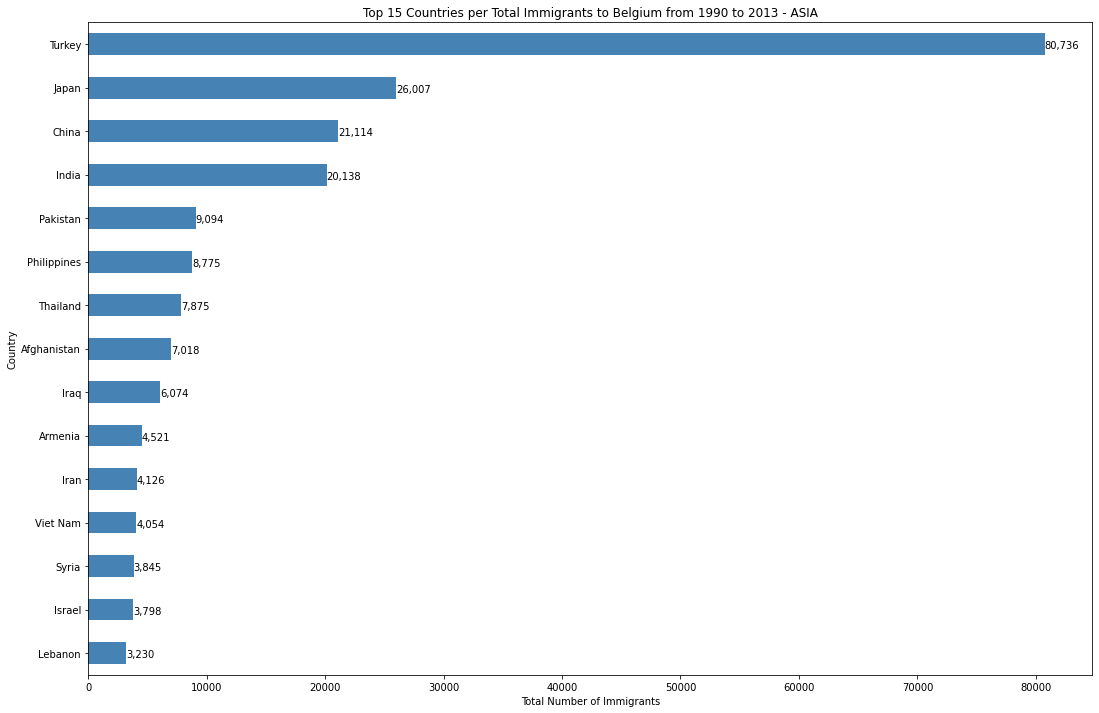

In [216]:
df_top15_i_total_asia.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Belgium from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_asia): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### America

In [217]:
df_top15_e_america = df_belgium_emigrants[(df_belgium_emigrants['Continent']=='Latin America and the Caribbean') | (df_belgium_emigrants['Continent']=='Northern America')]
df_top15_e_america.head(15)

Continent  \
Country                                                               
United States of America                           Northern America   
Canada                                             Northern America   
Brazil                              Latin America and the Caribbean   
Chile                               Latin America and the Caribbean   
Mexico                              Latin America and the Caribbean   
Colombia                            Latin America and the Caribbean   
Argentina                           Latin America and the Caribbean   
Peru                                Latin America and the Caribbean   
Ecuador                             Latin America and the Caribbean   
Haiti                               Latin America and the Caribbean   
Venezuela (Bolivarian Republic of)  Latin America and the Caribbean   
Cuba                                Latin America and the Caribbean   
Suriname                            Latin America and the Caribbean   
Bolivia (Plurinational State of)    Latin America and the Caribbean   
Dominican Republic                  Latin America and the Caribbean   

                                              Region         Development  \
Country                                                                    
United States of America            Northern America   Developed regions   
Canada                              Northern America   Developed regions   
Brazil                                 South America  Developing regions   
Chile                                  South America  Developing regions   
Mexico                               Central America  Developing regions   
Colombia                               South America  Developing regions   
Argentina                              South America  Developing regions   
Peru                                   South America  Developing regions   
Ecuador                                South America  Developing regions   
Haiti                                      Caribbean  Developing regions   
Venezuela (Bolivarian Republic of)     South America  Developing regions   
Cuba                                       Caribbean  Developing regions   
Suriname                               South America  Developing regions   
Bolivia (Plurinational State of)       South America  Developing regions   
Dominican Republic                         Caribbean  Developing regions   

                                      1980    1981    1982    1983    1984  \
Country                                                                      
United States of America            3622.0  3378.0  3486.0  2837.0  2874.0   
Canada                               336.0   402.0   362.0   307.0   289.0   
Brazil                                85.0   100.0   128.0   104.0    84.0   
Chile                                 75.0   105.0    62.0    87.0   118.0   
Mexico                                68.0   107.0    94.0   178.0    78.0   
Colombia                               0.0     0.0     0.0     0.0     0.0   
Argentina                             63.0    74.0    45.0    62.0    61.0   
Peru                                   0.0     0.0     0.0     0.0     0.0   
Ecuador                                0.0     0.0     0.0     0.0     0.0   
Haiti                                  0.0     0.0     0.0     0.0     0.0   
Venezuela (Bolivarian Republic of)     0.0     0.0     0.0     0.0     0.0   
Cuba                                   0.0     0.0     0.0     0.0     0.0   
Suriname                               0.0     0.0     0.0     0.0     0.0   
Bolivia (Plurinational State of)       0.0     0.0     0.0     0.0     0.0   
Dominican Republic                     0.0     0.0     0.0     0.0     0.0   

                                      1985    1986  ...  2005  2006    2007  \
Country                                             ...                       
United States of America            2794.0  2844.0  ...   0.0   0.0  211

In [218]:
df_top15_e_america = df_top15_e_america.head(15)
df_top15_e_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top15_e_america

Continent            Region  \
Country                                                                 
USA                                Northern America  Northern America   
Canada                             Northern America  Northern America   
Brazil              Latin America and the Caribbean     South America   
Chile               Latin America and the Caribbean     South America   
Mexico              Latin America and the Caribbean   Central America   
Colombia            Latin America and the Caribbean     South America   
Argentina           Latin America and the Caribbean     South America   
Peru                Latin America and the Caribbean     South America   
Ecuador             Latin America and the Caribbean     South America   
Haiti               Latin America and the Caribbean         Caribbean   
Venezuela           Latin America and the Caribbean     South America   
Cuba                Latin America and the Caribbean         Caribbean   
Suriname            Latin America and the Caribbean     South America   
Bolivia             Latin America and the Caribbean     South America   
Dominican Republic  Latin America and the Caribbean         Caribbean   

                           Development    1980    1981    1982    1983  \
Country                                                                  
USA                  Developed regions  3622.0  3378.0  3486.0  2837.0   
Canada               Developed regions   336.0   402.0   362.0   307.0   
Brazil              Developing regions    85.0   100.0   128.0   104.0   
Chile               Developing regions    75.0   105.0    62.0    87.0   
Mexico              Developing regions    68.0   107.0    94.0   178.0   
Colombia            Developing regions     0.0     0.0     0.0     0.0   
Argentina           Developing regions    63.0    74.0    45.0    62.0   
Peru                Developing regions     0.0     0.0     0.0     0.0   
Ecuador             Developing regions     0.0     0.0     0.0     0.0   
Haiti               Developing regions     0.0     0.0     0.0     0.0   
Venezuela           Developing regions     0.0     0.0     0.0     0.0   
Cuba                Developing regions     0.0     0.0     0.0     0.0   
Suriname            Developing regions     0.0     0.0     0.0     0.0   
Bolivia             Developing regions     0.0     0.0     0.0     0.0   
Dominican Republic  Developing regions     0.0     0.0     0.0     0.0   

                      1984    1985    1986  ...  2005  2006    2007  2008  \
Country                                     ...                             
USA                 2874.0  2794.0  2844.0  ...   0.0   0.0  2114.0   0.0   
Canada               289.0   274.0   313.0  ...   0.0   0.0   377.0   0.0   
Brazil                84.0    78.0   123.0  ...   0.0   0.0   193.0   0.0   
Chile                118.0    85.0    78.0  ...   0.0   0.0    36.0   0.0   
Mexico                78.0   112.0    46.0  ...   0.0   0.0    99.0   0.0   
Colombia               0.0     0.0     0.0  ...   0.0   0.0    58.0   0.0   
Argentina             61.0    29.0    33.0  ...   0.0   0.0     0.0   0.0   
Peru                   0.0     0.0     0.0  ...   0.0   0.0    51.0   0.0   
Ecuador                0.0     0.0     0.0  ...   0.0   0.0    58.0   0.0   
Haiti                  0.0     0.0     0.0  ...   0.0   0.0     0.0   0.0   
Venezuela              0.0     0.0     0.0  ...   0.0   0.0     0.0   0.0   
Cuba                   0.0     0.0     0.0  ...   0.0   0.0    28.0   0.0   
Suriname               0.0     0.0     0.0  ...   0.0   0.0     0.0   0.0   
Bolivia                0.0     0.0     0.0  ...   0.0   0.0     0.0   0.0   
Dominican Republic     0.0     0.0     0.0  ...   0.0   0.0    10.0   0.0   

                    2009    2010    2011    2012    2013    Total  
Country                                                            
USA                  0.0  2171.0  1886.0  2012.0  2002.0  65127.0  
Canada               0.0   

In [219]:
df_top15_e_america.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_america = df_top15_e_america['Total']
df_top15_e_total_america

Country
Dominican Republic       92.0
Bolivia                  97.0
Suriname                101.0
Cuba                    130.0
Venezuela               153.0
Haiti                   182.0
Ecuador                 357.0
Peru                    634.0
Argentina               694.0
Colombia                840.0
Mexico                 1338.0
Chile                  2209.0
Brazil                 4412.0
Canada                 7878.0
USA                   65127.0
Name: Total, dtype: float64

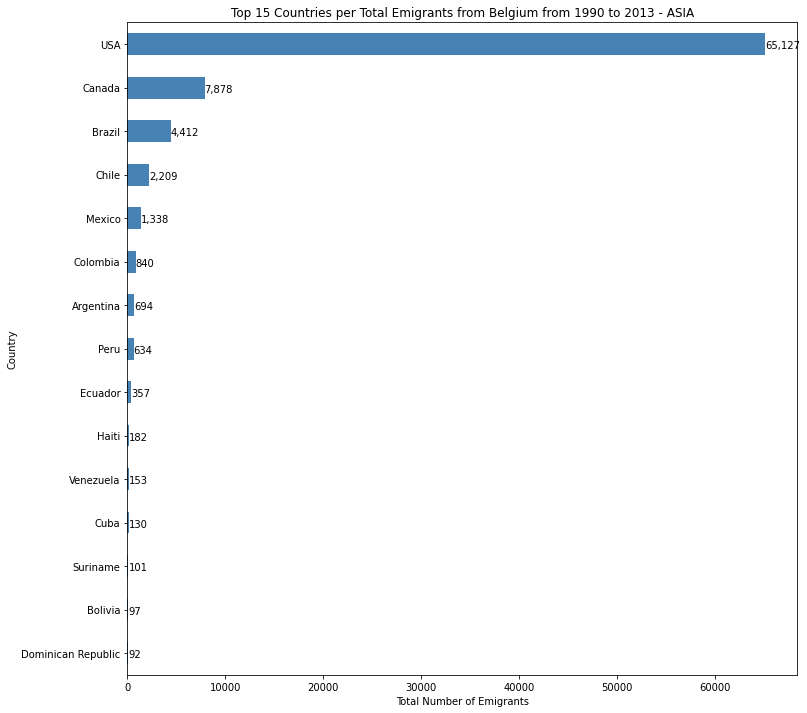

In [220]:
df_top15_e_total_america.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Belgium from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_america): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [221]:
df_top15_i_america = df_belgium_immigrants[(df_belgium_immigrants['Continent']=='Latin America and the Caribbean') | (df_belgium_immigrants['Continent']=='Northern America')]
df_top15_i_america.head(15)

Continent            Region  \
Country                                                                       
United States of America                 Northern America  Northern America   
Brazil                    Latin America and the Caribbean     South America   
Canada                                   Northern America  Northern America   
Chile                     Latin America and the Caribbean     South America   
Colombia                  Latin America and the Caribbean     South America   
Ecuador                   Latin America and the Caribbean     South America   
Peru                      Latin America and the Caribbean     South America   
Mexico                    Latin America and the Caribbean   Central America   
Dominican Republic        Latin America and the Caribbean         Caribbean   
Argentina                 Latin America and the Caribbean     South America   
Cuba                      Latin America and the Caribbean         Caribbean   
Haiti                     Latin America and the Caribbean         Caribbean   

                                 Development    1980    1981    1982    1983  \
Country                                                                        
United States of America   Developed regions  3267.0  2779.0  2974.0  2787.0   
Brazil                    Developing regions   125.0   122.0   109.0   103.0   
Canada                     Developed regions   356.0   306.0   340.0   284.0   
Chile                     Developing regions   249.0   214.0   164.0   195.0   
Colombia                  Developing regions     0.0     0.0     0.0     0.0   
Ecuador                   Developing regions     0.0     0.0     0.0     0.0   
Peru                      Developing regions     0.0     0.0     0.0     0.0   
Mexico                    Developing regions    76.0   110.0   131.0    47.0   
Dominican Republic        Developing regions     0.0     0.0     0.0     0.0   
Argentina                 Developing regions   100.0    68.0    59.0    65.0   
Cuba                      Developing regions     0.0     0.0     0.0     0.0   
Haiti                     Developing regions     0.0     0.0     0.0     0.0   

                            1984    1985    1986  ...    2005    2006    2007  \
Country                                           ...                           
United States of America  3058.0  3078.0  2655.0  ...  2408.0  2553.0  2455.0   
Brazil                     137.0   123.0   133.0  ...   737.0  1022.0   996.0   
Canada                     336.0   303.0   283.0  ...   665.0   584.0   626.0   
Chile                      210.0   206.0   222.0  ...   122.0   139.0    90.0   
Colombia                     0.0     0.0     0.0  ...   190.0   198.0   208.0   
Ecuador                      0.0     0.0     0.0  ...   448.0   496.0   410.0   
Peru                         0.0     0.0     0.0  ...   160.0   180.0   221.0   
Mexico                      45.0    55.0    67.0  ...   204.0   224.0   238.0   
Dominican Republic           0.0     0.0     0.0  ...   126.0   108.0   107.0   
Argentina                   43.0    38.0    45.0  ...     0.0     0.0     0.0   
Cuba                         0.0     0.0     0.0  ...   128.0   107.0   104.0   
Haiti                        0.0     0.0     0.0  ...     0.0     0.0     0.0   

                          2008  2009    2010    2011    2012    2013    Total  
Country                                                                        
United States of America   0.0   0.0  2224.0  2304.0  2197.0  2166.0  88707.0  
Brazil                     0.0   0.0  1200.0  1460.0  1247.0   892.0  14507.0  
Canada                     0.0   0.0   492.0   521.0   516.0   436.0  14204.0  
Chile                      0.0   0.0   127.0   136.0   156.0    90.0   5011.0  
Colombia                   0.0   0.0   225.0   335.0   297.0   221.0   3852.0  
Ecuador                    0.0   0.0   475.0   847.0   358.0   177.0   3211.0  
Peru                       0.0   0.0   195.0 

In [222]:
df_top15_i_america = df_top15_i_america.head(15)
df_top15_i_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top15_i_america

Continent            Region  \
Country                                                                 
USA                                Northern America  Northern America   
Brazil              Latin America and the Caribbean     South America   
Canada                             Northern America  Northern America   
Chile               Latin America and the Caribbean     South America   
Colombia            Latin America and the Caribbean     South America   
Ecuador             Latin America and the Caribbean     South America   
Peru                Latin America and the Caribbean     South America   
Mexico              Latin America and the Caribbean   Central America   
Dominican Republic  Latin America and the Caribbean         Caribbean   
Argentina           Latin America and the Caribbean     South America   
Cuba                Latin America and the Caribbean         Caribbean   
Haiti               Latin America and the Caribbean         Caribbean   

                           Development    1980    1981    1982    1983  \
Country                                                                  
USA                  Developed regions  3267.0  2779.0  2974.0  2787.0   
Brazil              Developing regions   125.0   122.0   109.0   103.0   
Canada               Developed regions   356.0   306.0   340.0   284.0   
Chile               Developing regions   249.0   214.0   164.0   195.0   
Colombia            Developing regions     0.0     0.0     0.0     0.0   
Ecuador             Developing regions     0.0     0.0     0.0     0.0   
Peru                Developing regions     0.0     0.0     0.0     0.0   
Mexico              Developing regions    76.0   110.0   131.0    47.0   
Dominican Republic  Developing regions     0.0     0.0     0.0     0.0   
Argentina           Developing regions   100.0    68.0    59.0    65.0   
Cuba                Developing regions     0.0     0.0     0.0     0.0   
Haiti               Developing regions     0.0     0.0     0.0     0.0   

                      1984    1985    1986  ...    2005    2006    2007  2008  \
Country                                     ...                                 
USA                 3058.0  3078.0  2655.0  ...  2408.0  2553.0  2455.0   0.0   
Brazil               137.0   123.0   133.0  ...   737.0  1022.0   996.0   0.0   
Canada               336.0   303.0   283.0  ...   665.0   584.0   626.0   0.0   
Chile                210.0   206.0   222.0  ...   122.0   139.0    90.0   0.0   
Colombia               0.0     0.0     0.0  ...   190.0   198.0   208.0   0.0   
Ecuador                0.0     0.0     0.0  ...   448.0   496.0   410.0   0.0   
Peru                   0.0     0.0     0.0  ...   160.0   180.0   221.0   0.0   
Mexico                45.0    55.0    67.0  ...   204.0   224.0   238.0   0.0   
Dominican Republic     0.0     0.0     0.0  ...   126.0   108.0   107.0   0.0   
Argentina             43.0    38.0    45.0  ...     0.0     0.0     0.0   0.0   
Cuba                   0.0     0.0     0.0  ...   128.0   107.0   104.0   0.0   
Haiti                  0.0     0.0     0.0  ...     0.0     0.0     0.0   0.0   

                    2009    2010    2011    2012    2013    Total  
Country                                                            
USA                  0.0  2224.0  2304.0  2197.0  2166.0  88707.0  
Brazil               0.0  1200.0  1460.0  1247.0   892.0  14507.0  
Canada               0.0   492.0   521.0   516.0   436.0  14204.0  
Chile                0.0   127.0   136.0   156.0    90.0   5011.0  
Colombia             0.0   225.0   335.0   297.0   221.0   3852.0  
Ecuador              0.0   475.0   847.0   358.0   177.0   3211.0  
Peru                 0.0   195.0   249.0   180.0   118.0   2875.0  
Mexico               0.0   199.0   191.0   244.0   205.0   2221.0  
Dominican Republic   0.0   135.0   124.0   128.0   123.0   1589.0  
Argentina            0.0    86.0    92.0    86.0    82.0    852.0  
Cuba                 0.0   107.

In [223]:
df_top15_i_america.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_america = df_top15_i_america['Total']
df_top15_i_total_america

Country
Haiti                   422.0
Cuba                    726.0
Argentina               852.0
Dominican Republic     1589.0
Mexico                 2221.0
Peru                   2875.0
Ecuador                3211.0
Colombia               3852.0
Chile                  5011.0
Canada                14204.0
Brazil                14507.0
USA                   88707.0
Name: Total, dtype: float64

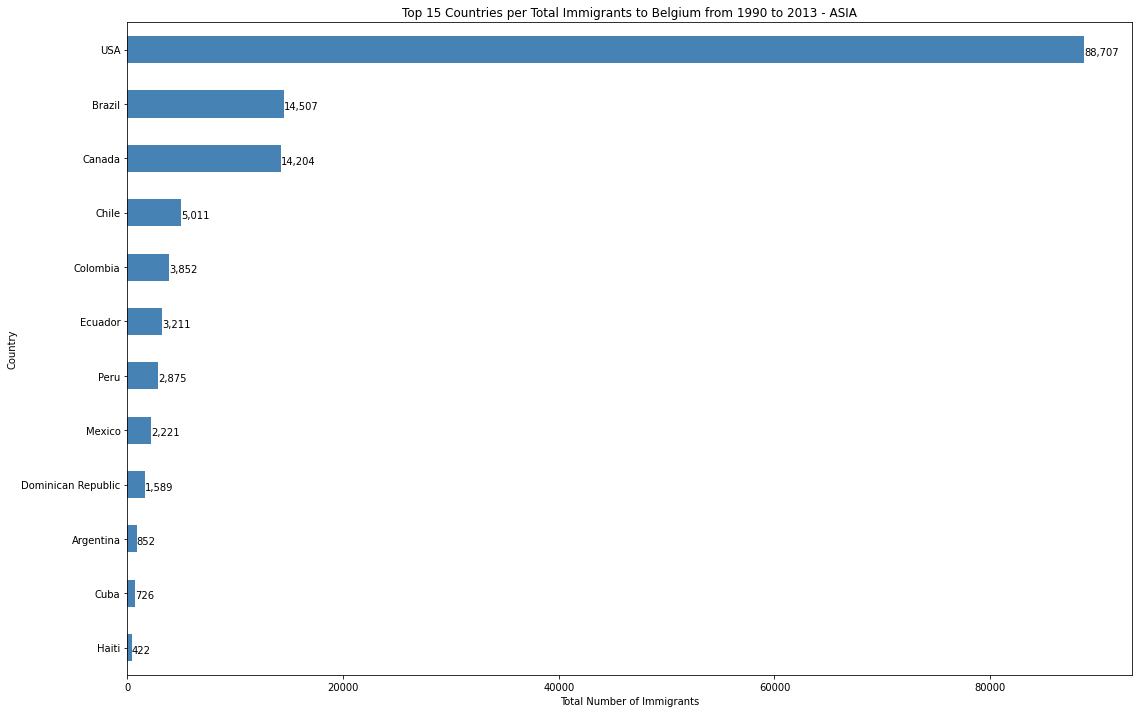

In [224]:
df_top15_i_total_america.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Belgium from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_america): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Oceania

In [225]:
df_top15_e_oceania = df_belgium_emigrants[df_belgium_emigrants['Continent']=='Oceania']
df_top15_e_oceania.head(15)

Continent                     Region         Development  \
Country                                                                     
Australia          Oceania  Australia and New Zealand   Developed regions   
New Zealand        Oceania  Australia and New Zealand   Developed regions   
Fiji               Oceania                  Melanesia  Developing regions   
Solomon Islands    Oceania                  Melanesia  Developing regions   
Marshall Islands   Oceania                 Micronesia  Developing regions   
Papua New Guinea   Oceania                  Melanesia  Developing regions   

                  1980  1981  1982  1983  1984  1985  1986  ...  2005  2006  \
Country                                                     ...               
Australia          0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
New Zealand        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Fiji               0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Solomon Islands    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Marshall Islands   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Papua New Guinea   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   

                   2007  2008  2009   2010   2011   2012   2013   Total  
Country                                                                  
Australia         145.0   0.0   0.0  132.0  130.0  127.0  131.0  1370.0  
New Zealand         0.0   0.0   0.0   27.0   35.0   48.0   43.0   178.0  
Fiji                0.0   0.0   0.0    0.0    0.0    3.0    4.0     7.0  
Solomon Islands     0.0   0.0   0.0    0.0    0.0    1.0    4.0     5.0  
Marshall Islands    0.0   0.0   0.0    1.0    0.0    0.0    0.0     1.0  
Papua New Guinea    0.0   0.0   0.0    0.0    0.0    0.0    1.0     1.0  

[6 rows x 38 columns]

In [226]:
df_top5_e_oceania = df_top15_e_oceania.head(5)
# df_top15_e_oceania.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top5_e_oceania

Continent                     Region         Development  \
Country                                                                     
Australia          Oceania  Australia and New Zealand   Developed regions   
New Zealand        Oceania  Australia and New Zealand   Developed regions   
Fiji               Oceania                  Melanesia  Developing regions   
Solomon Islands    Oceania                  Melanesia  Developing regions   
Marshall Islands   Oceania                 Micronesia  Developing regions   

                  1980  1981  1982  1983  1984  1985  1986  ...  2005  2006  \
Country                                                     ...               
Australia          0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
New Zealand        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Fiji               0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Solomon Islands    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Marshall Islands   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   

                   2007  2008  2009   2010   2011   2012   2013   Total  
Country                                                                  
Australia         145.0   0.0   0.0  132.0  130.0  127.0  131.0  1370.0  
New Zealand         0.0   0.0   0.0   27.0   35.0   48.0   43.0   178.0  
Fiji                0.0   0.0   0.0    0.0    0.0    3.0    4.0     7.0  
Solomon Islands     0.0   0.0   0.0    0.0    0.0    1.0    4.0     5.0  
Marshall Islands    0.0   0.0   0.0    1.0    0.0    0.0    0.0     1.0  

[5 rows x 38 columns]

In [227]:
df_top5_e_oceania.sort_values(by='Total', ascending=True, inplace=True)
df_top5_e_total_oceania = df_top5_e_oceania['Total']
df_top5_e_total_oceania

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Marshall Islands       1.0
Solomon Islands        5.0
Fiji                   7.0
New Zealand          178.0
Australia           1370.0
Name: Total, dtype: float64

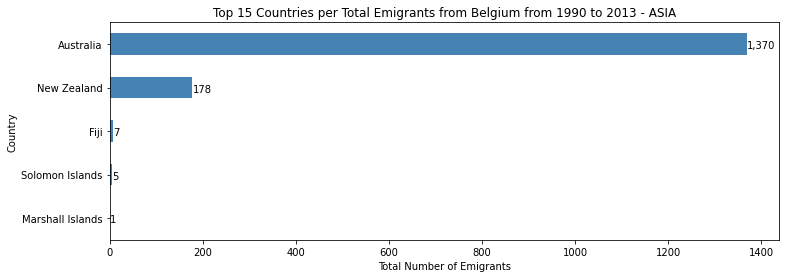

In [228]:
df_top5_e_total_oceania.plot(kind='barh', figsize=(12, 4), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Belgium from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top5_e_total_oceania): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [229]:
df_top15_i_oceania = df_belgium_immigrants[df_belgium_immigrants['Continent']=='Oceania']
df_top15_i_oceania.head(15)

Continent                     Region        Development  1980  \
Country                                                                     
Australia     Oceania  Australia and New Zealand  Developed regions   0.0   
New Zealand   Oceania  Australia and New Zealand  Developed regions   0.0   

             1981  1982  1983  1984  1985  1986  ...   2005   2006   2007  \
Country                                          ...                        
Australia     0.0   0.0   0.0   0.0   0.0   0.0  ...  185.0  169.0  201.0   
New Zealand   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    0.0    0.0   

             2008  2009   2010   2011   2012   2013   Total  
Country                                                      
Australia     0.0   0.0  142.0  184.0  182.0  133.0  3673.0  
New Zealand   0.0   0.0   38.0   43.0   47.0   28.0   204.0  

[2 rows x 38 columns]

In [230]:
df_top5_i_oceania = df_top15_i_oceania.head(5)
# df_top5_i_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top5_i_oceania

Continent                     Region        Development  1980  \
Country                                                                     
Australia     Oceania  Australia and New Zealand  Developed regions   0.0   
New Zealand   Oceania  Australia and New Zealand  Developed regions   0.0   

             1981  1982  1983  1984  1985  1986  ...   2005   2006   2007  \
Country                                          ...                        
Australia     0.0   0.0   0.0   0.0   0.0   0.0  ...  185.0  169.0  201.0   
New Zealand   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    0.0    0.0   

             2008  2009   2010   2011   2012   2013   Total  
Country                                                      
Australia     0.0   0.0  142.0  184.0  182.0  133.0  3673.0  
New Zealand   0.0   0.0   38.0   43.0   47.0   28.0   204.0  

[2 rows x 38 columns]

In [231]:
df_top5_i_oceania.sort_values(by='Total', ascending=True, inplace=True)
df_top5_i_total_oceania = df_top5_i_oceania['Total']
df_top5_i_total_oceania

Country
New Zealand     204.0
Australia      3673.0
Name: Total, dtype: float64

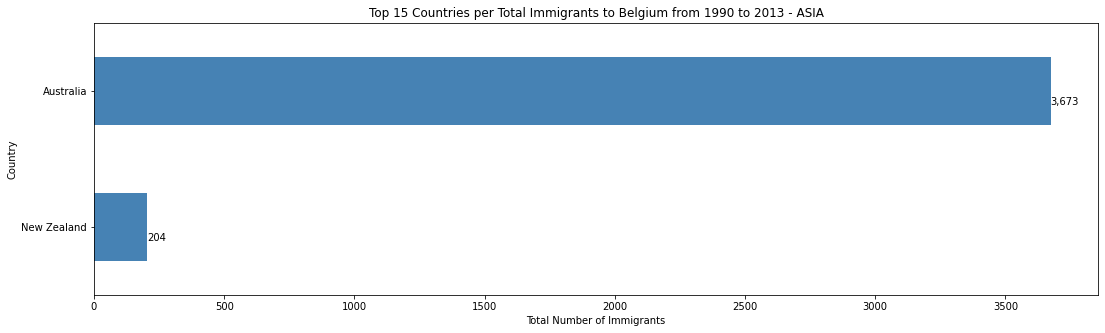

In [232]:
df_top5_i_total_oceania.plot(kind='barh', figsize=(18, 5), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Belgium from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top5_i_total_oceania): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### 4.2.4 Top 15 Countries - Sorted by Total - ___Word Clouds___<a id="4.2.4"></a>

---------------

### World

In [233]:
df_top15_e_total

Country
Canada                                7878.0
Poland                               14673.0
Greece                               14926.0
Japan                                16850.0
Portugal                             17239.0
Turkey                               21478.0
Democratic Republic of the Congo     22277.0
Morocco                              26689.0
Spain                                32587.0
Germany                              52019.0
UK                                   56435.0
USA                                  65127.0
Italy                                76827.0
Netherlands                          86718.0
France                              113084.0
Name: Total, dtype: float64

In [234]:
total_top15_e = df_top15_e_total.sum()
total_top15_e

624807.0

In [235]:
df_top15_e.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_new = pd.DataFrame(df_top15_e['Total'])
df_top15_e_total_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                                   
France                            113084.0
Netherlands                        86718.0
Italy                              76827.0
USA                                65127.0
UK                                 56435.0
Germany                            52019.0
Spain                              32587.0
Morocco                            26689.0
Democratic Republic of the Congo   22277.0
Turkey                             21478.0
Portugal                           17239.0
Japan                              16850.0
Greece                             14926.0
Poland                             14673.0
Canada                              7878.0

In [236]:
max_words = 80
word_string = ''
for country in df_top15_e_total_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_new.loc[country,'Total']/float(total_top15_e)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'France France France France France France France France France France France France France France Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Italy Italy Italy Italy Italy Italy Italy Italy Italy USA USA USA USA USA USA USA USA UK UK UK UK UK UK UK Germany Germany Germany Germany Germany Germany Spain Spain Spain Spain Morocco Morocco Morocco Turkey Turkey Portugal Portugal Japan Japan Greece Poland Canada '

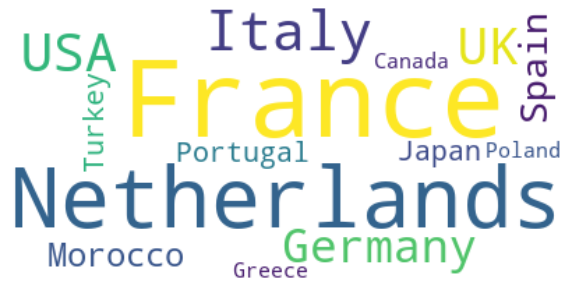

In [237]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

------------------

In [238]:
df_top15_i_total

Country
Bulgaria                             22858.0
Japan                                26007.0
Spain                                46649.0
Democratic Republic of the Congo     48031.0
Romania                              50675.0
Portugal                             51223.0
Poland                               77622.0
Turkey                               80736.0
UK                                   82087.0
USA                                  88707.0
Italy                                89327.0
Germany                              91479.0
Morocco                             158284.0
Netherlands                         212265.0
France                              243509.0
Name: Total, dtype: float64

In [239]:
total_top15_i = df_top15_i_total.sum()
total_top15_i

1369459.0

In [240]:
df_top15_i.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_new = pd.DataFrame(df_top15_i['Total'])
df_top15_i_total_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                                   
France                            243509.0
Netherlands                       212265.0
Morocco                           158284.0
Germany                            91479.0
Italy                              89327.0
USA                                88707.0
UK                                 82087.0
Turkey                             80736.0
Poland                             77622.0
Portugal                           51223.0
Romania                            50675.0
Democratic Republic of the Congo   48031.0
Spain                              46649.0
Japan                              26007.0
Bulgaria                           22858.0

In [241]:
max_words = 70
word_string = ''
for country in df_top15_i_total_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_new.loc[country, 'Total']/float(total_top15_i)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'France France France France France France France France France France France France Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Germany Germany Germany Germany Italy Italy Italy Italy USA USA USA USA UK UK UK UK Turkey Turkey Turkey Turkey Poland Poland Poland Portugal Portugal Romania Romania Spain Spain Japan Bulgaria '

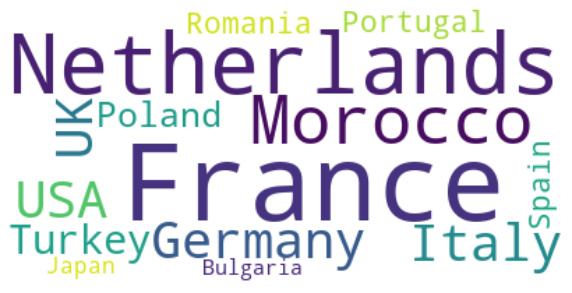

In [242]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Europe

In [243]:
df_top15_e_total_europe

Country
Switzerland      3919.0
Luxembourg       4115.0
Ireland          4970.0
Sweden           4973.0
Denmark          5803.0
Romania          7733.0
Poland          14673.0
Greece          14926.0
Portugal        17239.0
Spain           32587.0
Germany         52019.0
UK              56435.0
Italy           76827.0
Netherlands     86718.0
France         113084.0
Name: Total, dtype: float64

In [244]:
total_top15_e_europe = df_top15_e_total_europe.sum()
total_top15_e_europe

496021.0

In [245]:
df_top15_e_europe.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_europe_new = pd.DataFrame(df_top15_e_europe['Total'])
df_top15_e_total_europe_new

Total
Country              
France       113084.0
Netherlands   86718.0
Italy         76827.0
UK            56435.0
Germany       52019.0
Spain         32587.0
Portugal      17239.0
Greece        14926.0
Poland        14673.0
Romania        7733.0
Denmark        5803.0
Sweden         4973.0
Ireland        4970.0
Luxembourg     4115.0
Switzerland    3919.0

In [246]:
max_words = 130
word_string = ''
for country in df_top15_e_total_europe_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_europe_new.loc[country,'Total']/float(total_top15_e_europe)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'France France France France France France France France France France France France France France France France France France France France France France France France France France France France France Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy UK UK UK UK UK UK UK UK UK UK UK UK UK UK Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Spain Spain Spain Spain Spain Spain Spain Spain Portugal Portugal Portugal Portugal Greece Greece Greece Poland Poland Poland Romania Romania Denmark Sweden Ireland Luxembourg Switzerland '

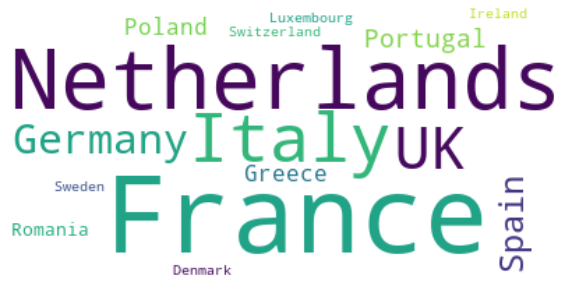

In [247]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [248]:
df_top15_i_total_europe

Country
Ireland                 9561.0
Denmark                 9987.0
Sweden                 10739.0
Russian Federation     14924.0
Greece                 21179.0
Bulgaria               22858.0
Spain                  46649.0
Romania                50675.0
Portugal               51223.0
Poland                 77622.0
UK                     82087.0
Italy                  89327.0
Germany                91479.0
Netherlands           212265.0
France                243509.0
Name: Total, dtype: float64

In [249]:
total_top15_i_europe = df_top15_i_total_europe.sum()
total_top15_i_europe

1034084.0

In [250]:
df_top15_i_europe.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_europe_new = pd.DataFrame(df_top15_i_europe['Total'])
df_top15_i_total_europe_new

Total
Country                     
France              243509.0
Netherlands         212265.0
Germany              91479.0
Italy                89327.0
UK                   82087.0
Poland               77622.0
Portugal             51223.0
Romania              50675.0
Spain                46649.0
Bulgaria             22858.0
Greece               21179.0
Russian Federation   14924.0
Sweden               10739.0
Denmark               9987.0
Ireland               9561.0

In [251]:
df_top15_i_total_europe_new.rename(index={'Russian Federation':'Russia','Bosnia and Herzegovina':'Bosnia'}, inplace=True)
df_top15_i_total_europe_new

Total
Country              
France       243509.0
Netherlands  212265.0
Germany       91479.0
Italy         89327.0
UK            82087.0
Poland        77622.0
Portugal      51223.0
Romania       50675.0
Spain         46649.0
Bulgaria      22858.0
Greece        21179.0
Russia        14924.0
Sweden        10739.0
Denmark        9987.0
Ireland        9561.0

In [252]:
max_words = 170
word_string = ''
for country in df_top15_i_total_europe_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_europe_new.loc[country,'Total']/float(total_top15_i_europe)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France France Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Netherlands Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy UK UK UK UK UK UK UK UK UK UK UK UK UK Poland Poland Poland Poland Poland Poland Poland Poland Poland Polan

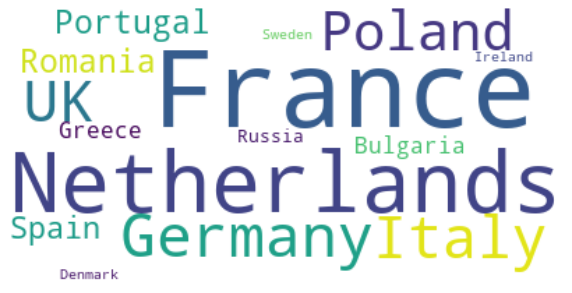

In [253]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Africa

In [254]:
df_top15_e_total_africa

Country
Ethiopia                              419.0
Senegal                               430.0
South Africa                          473.0
Burundi                               746.0
Angola                                768.0
Côte d'Ivoire                         785.0
Nigeria                               876.0
Rwanda                                978.0
Guinea                               1335.0
Ghana                                1684.0
Cameroon                             2098.0
Tunisia                              5724.0
Algeria                              6252.0
Democratic Republic of the Congo    22277.0
Morocco                             26689.0
Name: Total, dtype: float64

In [255]:
total_top15_e_africa = df_top15_e_total_africa.sum()
total_top15_e_africa

71534.0

In [256]:
df_top15_e_africa.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_africa_new = pd.DataFrame(df_top15_e_africa['Total'])
df_top15_e_total_africa_new

Total
Country                                  
Morocco                           26689.0
Democratic Republic of the Congo  22277.0
Algeria                            6252.0
Tunisia                            5724.0
Cameroon                           2098.0
Ghana                              1684.0
Guinea                             1335.0
Rwanda                              978.0
Nigeria                             876.0
Côte d'Ivoire                       785.0
Angola                              768.0
Burundi                             746.0
South Africa                        473.0
Senegal                             430.0
Ethiopia                            419.0

In [257]:
df_top15_e_total_africa_new.rename(index={"Côte d'Ivoire":'CoteIvoire','Burkina Faso':'BurkinaFaso'}, inplace=True)
df_top15_e_total_africa_new

Total
Country                                  
Morocco                           26689.0
Democratic Republic of the Congo  22277.0
Algeria                            6252.0
Tunisia                            5724.0
Cameroon                           2098.0
Ghana                              1684.0
Guinea                             1335.0
Rwanda                              978.0
Nigeria                             876.0
CoteIvoire                          785.0
Angola                              768.0
Burundi                             746.0
South Africa                        473.0
Senegal                             430.0
Ethiopia                            419.0

In [258]:
max_words = 300
word_string = ''
for country in df_top15_e_total_africa_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_africa_new.loc[country,'Total']/float(total_top15_e_africa)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria

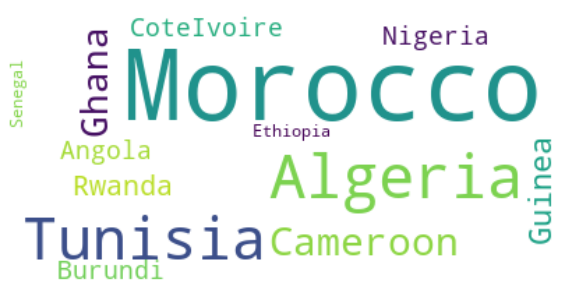

In [259]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [260]:
df_top15_i_total_africa

Country
Togo                                  2229.0
South Africa                          2479.0
Egypt                                 2945.0
Burundi                               3077.0
Côte d'Ivoire                         3726.0
Senegal                               3963.0
Nigeria                               4820.0
Rwanda                                5057.0
Ghana                                 7141.0
Guinea                                7957.0
Cameroon                             11008.0
Tunisia                              13198.0
Algeria                              18314.0
Democratic Republic of the Congo     48031.0
Morocco                             158284.0
Name: Total, dtype: float64

In [261]:
total_top15_i_africa = df_top15_i_total_africa.sum()
total_top15_i_africa

292229.0

In [262]:
df_top15_i_africa.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_africa_new = pd.DataFrame(df_top15_i_africa['Total'])
df_top15_i_total_africa_new

Total
Country                                   
Morocco                           158284.0
Democratic Republic of the Congo   48031.0
Algeria                            18314.0
Tunisia                            13198.0
Cameroon                           11008.0
Guinea                              7957.0
Ghana                               7141.0
Rwanda                              5057.0
Nigeria                             4820.0
Senegal                             3963.0
Côte d'Ivoire                       3726.0
Burundi                             3077.0
Egypt                               2945.0
South Africa                        2479.0
Togo                                2229.0

In [263]:
df_top15_i_total_africa_new.rename(index={"Côte d'Ivoire":'CoteIvoire','Burkina Faso':'BurkinaFaso'}, inplace=True)
df_top15_i_total_africa_new

Total
Country                                   
Morocco                           158284.0
Democratic Republic of the Congo   48031.0
Algeria                            18314.0
Tunisia                            13198.0
Cameroon                           11008.0
Guinea                              7957.0
Ghana                               7141.0
Rwanda                              5057.0
Nigeria                             4820.0
Senegal                             3963.0
CoteIvoire                          3726.0
Burundi                             3077.0
Egypt                               2945.0
South Africa                        2479.0
Togo                                2229.0

In [264]:
max_words = 200
word_string = ''
for country in df_top15_i_total_africa_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_africa_new.loc[country,'Total']/float(total_top15_i_africa)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Tunisia Tunisia Tunisia Tunisia Tunisia

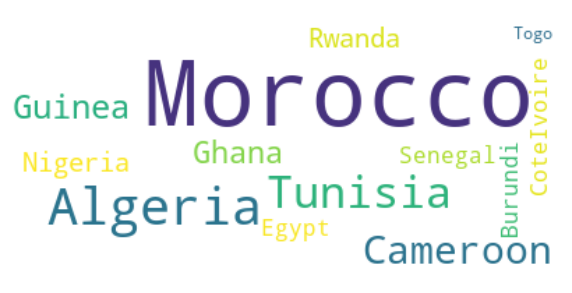

In [265]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Asia

In [266]:
df_top15_e_total_asia

Country
Afghanistan      833.0
Viet Nam         837.0
Lebanon          905.0
Thailand         937.0
Indonesia       1015.0
Armenia         1146.0
Iraq            1186.0
Philippines     1251.0
Iran            1277.0
Israel          1609.0
Pakistan        1688.0
China           4981.0
India           6155.0
Japan          16850.0
Turkey         21478.0
Name: Total, dtype: float64

In [267]:
total_top15_e_asia = df_top15_e_total_asia.sum()
total_top15_e_asia

62148.0

In [268]:
df_top15_e_asia.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_asia_new = pd.DataFrame(df_top15_e_asia['Total'])
df_top15_e_total_asia_new

Total
Country             
Turkey       21478.0
Japan        16850.0
India         6155.0
China         4981.0
Pakistan      1688.0
Israel        1609.0
Iran          1277.0
Philippines   1251.0
Iraq          1186.0
Armenia       1146.0
Indonesia     1015.0
Thailand       937.0
Lebanon        905.0
Viet Nam       837.0
Afghanistan    833.0

In [269]:
df_top15_e_total_asia_new.rename(index={'Sri Lanka':'SriLanka','Republic of Korea':'Korea'}, inplace=True)
df_top15_e_total_asia_new

Total
Country             
Turkey       21478.0
Japan        16850.0
India         6155.0
China         4981.0
Pakistan      1688.0
Israel        1609.0
Iran          1277.0
Philippines   1251.0
Iraq          1186.0
Armenia       1146.0
Indonesia     1015.0
Thailand       937.0
Lebanon        905.0
Viet Nam       837.0
Afghanistan    833.0

In [270]:
max_words = 300
word_string = ''
for country in df_top15_e_total_asia_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_asia_new.loc[country,'Total']/float(total_top15_e_asia)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Ja

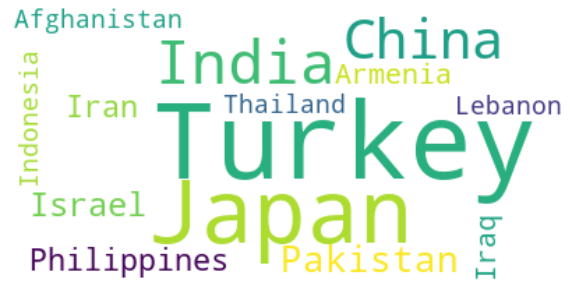

In [271]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [272]:
df_top15_i_total_asia

Country
Lebanon         3230.0
Israel          3798.0
Syria           3845.0
Viet Nam        4054.0
Iran            4126.0
Armenia         4521.0
Iraq            6074.0
Afghanistan     7018.0
Thailand        7875.0
Philippines     8775.0
Pakistan        9094.0
India          20138.0
China          21114.0
Japan          26007.0
Turkey         80736.0
Name: Total, dtype: float64

In [273]:
total_top15_i_asia = df_top15_i_total_asia.sum()
total_top15_i_asia

210405.0

In [274]:
df_top15_i_asia.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_asia_new = pd.DataFrame(df_top15_i_asia['Total'])
df_top15_i_total_asia_new

Total
Country             
Turkey       80736.0
Japan        26007.0
China        21114.0
India        20138.0
Pakistan      9094.0
Philippines   8775.0
Thailand      7875.0
Afghanistan   7018.0
Iraq          6074.0
Armenia       4521.0
Iran          4126.0
Viet Nam      4054.0
Syria         3845.0
Israel        3798.0
Lebanon       3230.0

In [275]:
df_top15_i_total_asia_new.rename(index={'Sri Lanka':'SriLanka','Republic of Korea':'Korea'}, inplace=True)
df_top15_i_total_asia_new

Total
Country             
Turkey       80736.0
Japan        26007.0
China        21114.0
India        20138.0
Pakistan      9094.0
Philippines   8775.0
Thailand      7875.0
Afghanistan   7018.0
Iraq          6074.0
Armenia       4521.0
Iran          4126.0
Viet Nam      4054.0
Syria         3845.0
Israel        3798.0
Lebanon       3230.0

In [276]:
max_words = 300
word_string = ''
for country in df_top15_i_total_asia_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_asia_new.loc[country,'Total']/float(total_top15_i_asia)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Turkey Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Ja

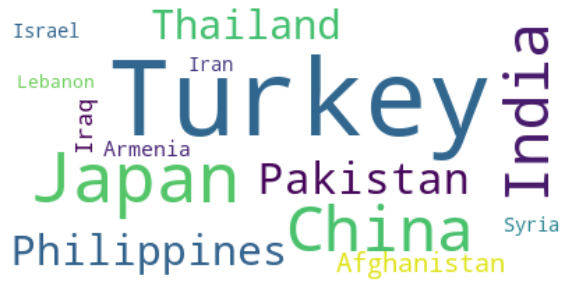

In [277]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### America

In [278]:
df_top15_e_total_america

Country
Dominican Republic       92.0
Bolivia                  97.0
Suriname                101.0
Cuba                    130.0
Venezuela               153.0
Haiti                   182.0
Ecuador                 357.0
Peru                    634.0
Argentina               694.0
Colombia                840.0
Mexico                 1338.0
Chile                  2209.0
Brazil                 4412.0
Canada                 7878.0
USA                   65127.0
Name: Total, dtype: float64

In [279]:
total_top15_e_america = df_top15_e_total_america.sum()
total_top15_e_america

84244.0

In [280]:
df_top15_e_america.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_america_new = pd.DataFrame(df_top15_e_america['Total'])
df_top15_e_total_america_new

Total
Country                    
USA                 65127.0
Canada               7878.0
Brazil               4412.0
Chile                2209.0
Mexico               1338.0
Colombia              840.0
Argentina             694.0
Peru                  634.0
Ecuador               357.0
Haiti                 182.0
Venezuela             153.0
Cuba                  130.0
Suriname              101.0
Bolivia                97.0
Dominican Republic     92.0

In [281]:
df_top15_e_total_america_new.rename(index={'Dominican Republic':'Dominican','El Salvador':'ElSalvador'}, inplace=True)
df_top15_e_total_america_new

Total
Country           
USA        65127.0
Canada      7878.0
Brazil      4412.0
Chile       2209.0
Mexico      1338.0
Colombia     840.0
Argentina    694.0
Peru         634.0
Ecuador      357.0
Haiti        182.0
Venezuela    153.0
Cuba         130.0
Suriname     101.0
Bolivia       97.0
Dominican     92.0

In [282]:
max_words = 1000
word_string = ''
for country in df_top15_e_total_america_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_america_new.loc[country,'Total']/float(total_top15_e_america)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA

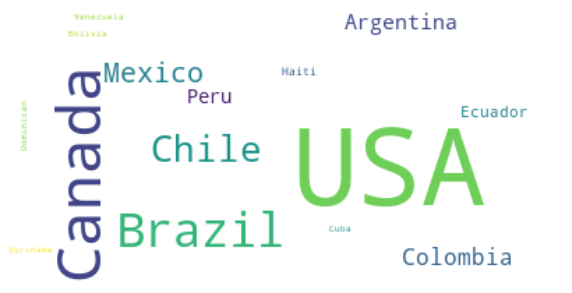

In [283]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [284]:
df_top15_i_total_america

Country
Haiti                   422.0
Cuba                    726.0
Argentina               852.0
Dominican Republic     1589.0
Mexico                 2221.0
Peru                   2875.0
Ecuador                3211.0
Colombia               3852.0
Chile                  5011.0
Canada                14204.0
Brazil                14507.0
USA                   88707.0
Name: Total, dtype: float64

In [285]:
total_top15_i_america = df_top15_i_total_america.sum()
total_top15_i_america

138177.0

In [286]:
df_top15_i_america.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_america_new = pd.DataFrame(df_top15_i_america['Total'])
df_top15_i_total_america_new

Total
Country                    
USA                 88707.0
Brazil              14507.0
Canada              14204.0
Chile                5011.0
Colombia             3852.0
Ecuador              3211.0
Peru                 2875.0
Mexico               2221.0
Dominican Republic   1589.0
Argentina             852.0
Cuba                  726.0
Haiti                 422.0

In [287]:
df_top15_i_total_america_new.rename(index={'Dominican Republic':'Dominican','El Salvador':'ElSalvador'}, inplace=True)
df_top15_i_total_america_new

Total
Country           
USA        88707.0
Brazil     14507.0
Canada     14204.0
Chile       5011.0
Colombia    3852.0
Ecuador     3211.0
Peru        2875.0
Mexico      2221.0
Dominican   1589.0
Argentina    852.0
Cuba         726.0
Haiti        422.0

In [288]:
max_words = 400
word_string = ''
for country in df_top15_i_total_america_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_america_new.loc[country,'Total']/float(total_top15_i_america)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA

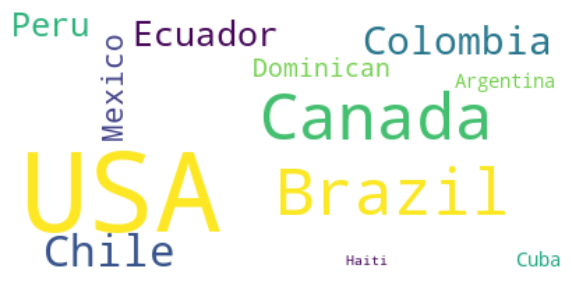

In [289]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Oceania

In [290]:
df_top5_e_total_oceania

Country
Marshall Islands       1.0
Solomon Islands        5.0
Fiji                   7.0
New Zealand          178.0
Australia           1370.0
Name: Total, dtype: float64

In [291]:
total_top5_e_oceania = df_top5_e_total_oceania.sum()
total_top5_e_oceania

1561.0

In [292]:
df_top5_e_oceania.sort_values(by='Total', ascending=False, inplace=True)
df_top5_e_total_oceania_new = pd.DataFrame(df_top5_e_oceania['Total'])
df_top5_e_total_oceania_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                 
Australia         1370.0
New Zealand        178.0
Fiji                 7.0
Solomon Islands      5.0
Marshall Islands     1.0

In [293]:
df_top5_e_total_oceania_new.rename(index={'New Zealand':'NewZealand','Papua New Guinea':'Guinea'}, inplace=True)
df_top5_e_total_oceania_new

Total
Country                 
Australia         1370.0
NewZealand         178.0
Fiji                 7.0
Solomon Islands      5.0
Marshall Islands     1.0

In [294]:
max_words = 800
word_string = ''
for country in df_top5_e_total_oceania_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top5_e_total_oceania_new.loc[country,'Total']/float(total_top5_e_oceania)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia

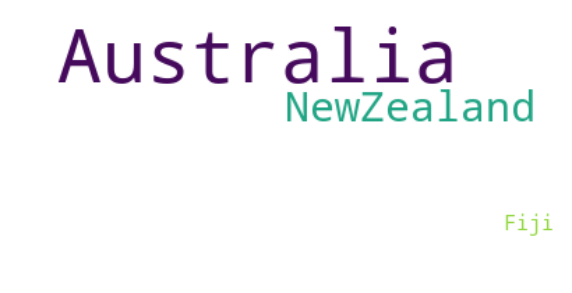

In [295]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [296]:
df_top5_i_total_oceania

Country
New Zealand     204.0
Australia      3673.0
Name: Total, dtype: float64

In [297]:
total_top5_i_oceania = df_top5_i_total_oceania.sum()
total_top5_i_oceania

3877.0

In [298]:
df_top5_i_oceania.sort_values(by='Total', ascending=False, inplace=True)
df_top5_i_total_oceania_new = pd.DataFrame(df_top5_i_oceania['Total'])
df_top5_i_total_oceania_new

Total
Country            
Australia    3673.0
New Zealand   204.0

In [299]:
df_top5_i_total_oceania_new.rename(index={'New Zealand':'NewZealand','Papua New Guinea':'Guinea'}, inplace=True)
df_top5_i_total_oceania_new

Total
Country           
Australia   3673.0
NewZealand   204.0

In [300]:
max_words = 300
word_string = ''
for country in df_top5_i_total_oceania_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top5_i_total_oceania_new.loc[country,'Total']/float(total_top5_i_oceania)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia

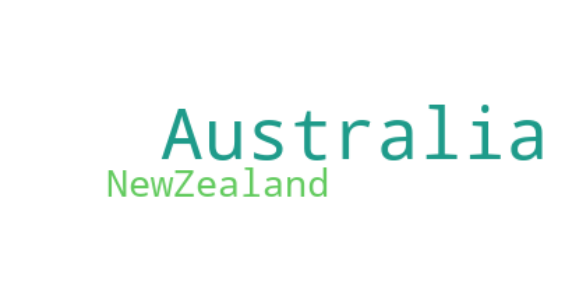

In [301]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------------

## 4.3 Emigration and Immigration Trends<a id="4.3"></a>

### 4.3.1 Total Trends Per Year<a id="4.3.1"></a>

----------------

In [302]:
df_belgium_emigrants.head()

Continent          Region        Development     1980     1981  \
Country                                                                      
Total           World           World              World  50213.0  57295.0   
Belgium        Europe  Western Europe  Developed regions  13326.0  20325.0   
Unknown         World           World              World   1422.0   1400.0   
France         Europe  Western Europe  Developed regions   5974.0   5481.0   
Netherlands    Europe  Western Europe  Developed regions   3336.0   4179.0   

                1982     1983     1984     1985     1986  ...     2005  \
Country                                                   ...            
Total        58704.0  57260.0  53309.0  50912.0  50619.0  ...  86899.0   
Belgium      21497.0  21090.0  20562.0  20481.0  21110.0  ...  42601.0   
Unknown       1476.0   1778.0   1568.0   1988.0   2337.0  ...  44298.0   
France        5378.0   5220.0   4644.0   4108.0   4037.0  ...      0.0   
Netherlands   3602.0   3302.0   3123.0   3015.0   3096.0  ...      0.0   

                2006     2007      2008  2009     2010     2011     2012  \
Country                                                                    
Total        88163.0  91052.0  100275.0   0.0  66013.0  67475.0  74720.0   
Belgium      42590.0  45615.0       0.0   0.0  22603.0  23603.0  26072.0   
Unknown      45573.0  17645.0  100275.0   0.0    609.0    584.0   1123.0   
France           0.0   3930.0       0.0   0.0   7085.0   7390.0   7504.0   
Netherlands      0.0   4357.0       0.0   0.0   4870.0   4917.0   5584.0   

                2013      Total  
Country                          
Total        90800.0  2082879.0  
Belgium      28068.0   807828.0  
Unknown       1786.0   523774.0  
France        9006.0   113084.0  
Netherlands   5534.0    86718.0  

[5 rows x 38 columns]

In [303]:
df_belgium_emigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [304]:
df_belgium_emigrants.index.to_list()

['Total',
 'Belgium',
 'Unknown',
 'France',
 'Netherlands',
 'Italy',
 'United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Germany',
 'Spain',
 'Morocco',
 'Democratic Republic of the Congo',
 'Turkey',
 'Portugal',
 'Japan',
 'Greece',
 'Poland',
 'Canada',
 'Romania',
 'Algeria',
 'India',
 'Denmark',
 'Tunisia',
 'China (including Hong Kong Special Administrative Region)',
 'Sweden',
 'Ireland',
 'Brazil',
 'Luxembourg',
 'Switzerland',
 'Bulgaria',
 'Russian Federation',
 'Finland',
 'Hungary',
 'Chile',
 'Cameroon',
 'Norway',
 'Slovakia',
 'Pakistan',
 'Ghana',
 'Israel',
 'Austria',
 'Czech Republic',
 'Australia',
 'Mexico',
 'Guinea',
 'Serbia',
 'Iran (Islamic Republic of)',
 'Philippines',
 'Iraq',
 'Armenia',
 'Indonesia',
 'Rwanda',
 'Albania',
 'The former Yugoslav Republic of Macedonia',
 'Thailand',
 'Lebanon',
 'Nigeria',
 'Colombia',
 'Viet Nam',
 'Afghanistan',
 'Republic of Korea',
 "Côte d'Ivoire",
 'Angola',
 'Burundi',
 'Argent

In [305]:
df_belgium_emigrants.loc['Total',years].head()

1980    50213
1981    57295
1982    58704
1983    57260
1984    53309
Name: Total, dtype: object

In [306]:
df_tot_py_e = pd.DataFrame(df_belgium_emigrants.loc['Total',years])

# change the years to type float (useful for regression later on)
df_tot_py_e.index = map(int, df_tot_py_e.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot_py_e.reset_index(inplace=True)

# rename columns
df_tot_py_e.columns = ['year', 'total']

# view the final dataframe
df_tot_py_e.head()

year  total
0  1980  50213
1  1981  57295
2  1982  58704
3  1983  57260
4  1984  53309

In [307]:
df_tot_py_e.dtypes

year      int64
total    object
dtype: object

In [308]:
df_tot_py_e['total'] = df_tot_py_e['total'].astype("float")

In [309]:
df_tot_py_e.dtypes

year       int64
total    float64
dtype: object

(1990.5, 2013.5)

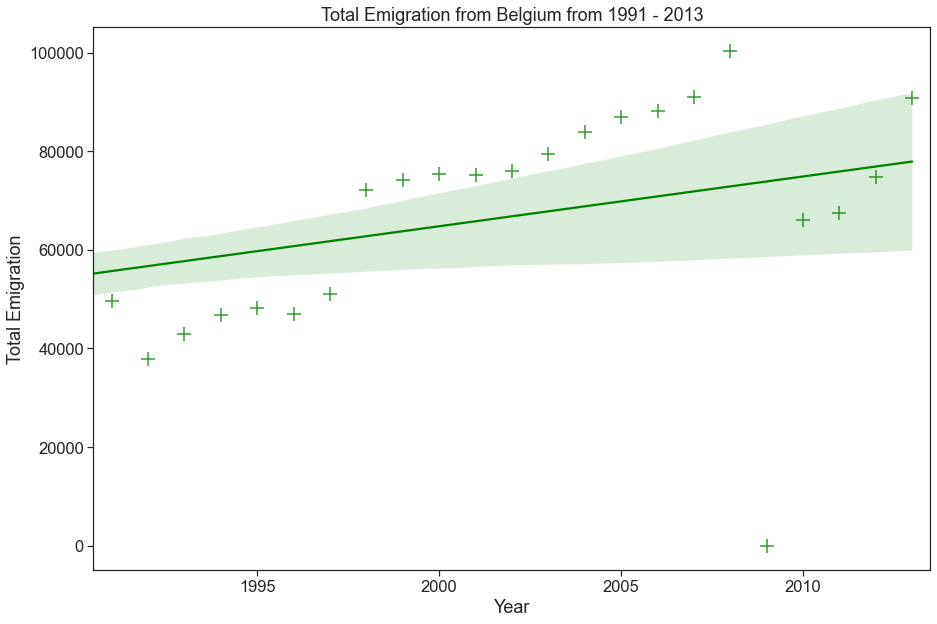

In [310]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot_py_e, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Emigration')
ax.set_title('Total Emigration from Belgium from 1991 - 2013')
ax.set_xlim(1990.5,2013.5)

----------------

In [311]:
df_belgium_immigrants.head()

Continent           Region         Development    1980    1981  \
Country                                                                      
Belgium        Europe   Western Europe   Developed regions  7834.0  7979.0   
France         Europe   Western Europe   Developed regions  6283.0  5815.0   
Netherlands    Europe   Western Europe   Developed regions  4245.0  3575.0   
Morocco        Africa  Northern Africa  Developing regions  5001.0  3902.0   
Germany        Europe   Western Europe   Developed regions  2548.0  2551.0   

               1982    1983    1984    1985    1986  ...     2005     2006  \
Country                                              ...                     
Belgium      8479.0  9310.0  9843.0  9500.0  9663.0  ...  12953.0  12857.0   
France       4945.0  5044.0  4872.0  5065.0  5213.0  ...  10378.0  11570.0   
Netherlands  3451.0  3583.0  3798.0  3660.0  4058.0  ...  10109.0  11488.0   
Morocco      3088.0  2709.0  2444.0  1856.0  1775.0  ...   7106.0   7488.0   
Germany      2866.0  2709.0  2667.0  2612.0  2350.0  ...   3250.0   3290.0   

                2007  2008  2009     2010     2011     2012     2013     Total  
Country                                                                         
Belgium      36483.0   0.0   0.0  18557.0  18426.0  17271.0  17531.0  397054.0  
France       12269.0   0.0   0.0  12214.0  12419.0  12615.0  12282.0  243509.0  
Netherlands  11370.0   0.0   0.0   8445.0   8461.0   8307.0   7741.0  212265.0  
Morocco       7831.0   0.0   0.0   9419.0   9970.0   8752.0   4570.0  158284.0  
Germany       3385.0   0.0   0.0   3099.0   2886.0   2681.0   2407.0   91479.0  

[5 rows x 38 columns]

In [312]:
df_belgium_immigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [313]:
df_belgium_immigrants.index.to_list()

['Belgium',
 'France',
 'Netherlands',
 'Morocco',
 'Germany',
 'Italy',
 'United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Turkey',
 'Poland',
 'Portugal',
 'Romania',
 'Democratic Republic of the Congo',
 'Spain',
 'Japan',
 'Bulgaria',
 'Greece',
 'China',
 'India',
 'Algeria',
 'Russian Federation',
 'Brazil',
 'Canada',
 'Tunisia',
 'Cameroon',
 'Sweden',
 'Denmark',
 'Ireland',
 'Pakistan',
 'Philippines',
 'Guinea',
 'Thailand',
 'Hungary',
 'Finland',
 'Ghana',
 'Afghanistan',
 'Luxembourg',
 'The former Yugoslav Republic of Macedonia',
 'Iraq',
 'Switzerland',
 'Slovakia',
 'Rwanda',
 'Norway',
 'Chile',
 'Nigeria',
 'Armenia',
 'Austria',
 'Czech Republic',
 'Iran (Islamic Republic of)',
 'Albania',
 'Viet Nam',
 'Senegal',
 'Colombia',
 'Syrian Arab Republic',
 'Israel',
 "Côte d'Ivoire",
 'Australia',
 'Lebanon',
 'Ecuador',
 'Burundi',
 'Ukraine',
 'Egypt',
 'Bangladesh',
 'Peru',
 'Indonesia',
 'South Africa',
 'Lithuania',
 'Togo',
 '

In [314]:
df_tot_py_i = pd.DataFrame(df_belgium_immigrants[years].sum(axis=0))

In [315]:
# change the years to type float (useful for regression later on)
df_tot_py_i.index = map(int, df_tot_py_i.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot_py_i.reset_index(inplace=True)

# rename columns
df_tot_py_i.columns = ['year', 'total']

# view the final dataframe
df_tot_py_i.head()

year    total
0  1980  46974.0
1  1981  41515.0
2  1982  37715.0
3  1983  37525.0
4  1984  39495.0

In [316]:
df_tot_py_i.dtypes

year       int64
total    float64
dtype: object

In [317]:
# df_tot_py_i['total'] = df_tot_py_e['total'].astype("float")

In [318]:
df_tot_py_i.dtypes

year       int64
total    float64
dtype: object

(1990.5, 2013.5)

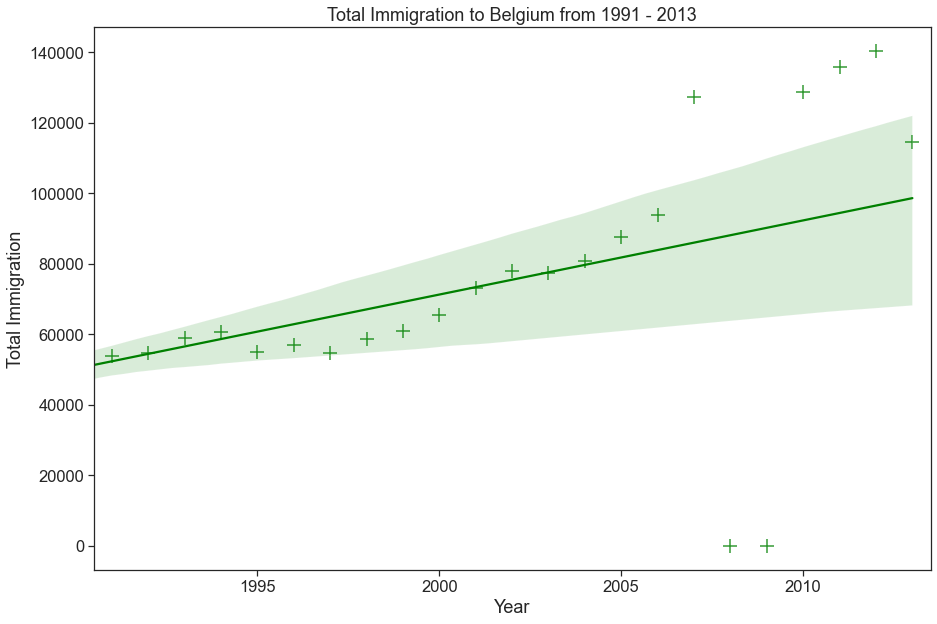

In [319]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot_py_i, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Belgium from 1991 - 2013')
ax.set_xlim(1990.5,2013.5)

--------------------

## 4.4 Choropleth Maps<a id="4.4"></a>

----------------

In [320]:
# download countries geojson file
# !wget --quiet /Users/Angelo/Data Science Projects/Emigration Immigration/world_countries.json -O world_countries.json
# world_geo = r'world_countries.json' # geojson file

import os

# world_geo = os.path.join('path', 'world_countries.json')
world_geo = os.path.join('', 'world_countries.json')


---------------

In [321]:
df_belgium_emigrants.head()

Continent          Region        Development     1980     1981  \
Country                                                                      
Total           World           World              World  50213.0  57295.0   
Belgium        Europe  Western Europe  Developed regions  13326.0  20325.0   
Unknown         World           World              World   1422.0   1400.0   
France         Europe  Western Europe  Developed regions   5974.0   5481.0   
Netherlands    Europe  Western Europe  Developed regions   3336.0   4179.0   

                1982     1983     1984     1985     1986  ...     2005  \
Country                                                   ...            
Total        58704.0  57260.0  53309.0  50912.0  50619.0  ...  86899.0   
Belgium      21497.0  21090.0  20562.0  20481.0  21110.0  ...  42601.0   
Unknown       1476.0   1778.0   1568.0   1988.0   2337.0  ...  44298.0   
France        5378.0   5220.0   4644.0   4108.0   4037.0  ...      0.0   
Netherlands   3602.0   3302.0   3123.0   3015.0   3096.0  ...      0.0   

                2006     2007      2008  2009     2010     2011     2012  \
Country                                                                    
Total        88163.0  91052.0  100275.0   0.0  66013.0  67475.0  74720.0   
Belgium      42590.0  45615.0       0.0   0.0  22603.0  23603.0  26072.0   
Unknown      45573.0  17645.0  100275.0   0.0    609.0    584.0   1123.0   
France           0.0   3930.0       0.0   0.0   7085.0   7390.0   7504.0   
Netherlands      0.0   4357.0       0.0   0.0   4870.0   4917.0   5584.0   

                2013      Total  
Country                          
Total        90800.0  2082879.0  
Belgium      28068.0   807828.0  
Unknown       1786.0   523774.0  
France        9006.0   113084.0  
Netherlands   5534.0    86718.0  

[5 rows x 38 columns]

In [322]:
df_belgium_emigrants_years = df_belgium_emigrants[years]
df_belgium_emigrants_years.head()

1980     1981     1982     1983     1984     1985     1986  \
Country                                                                      
Total        50213.0  57295.0  58704.0  57260.0  53309.0  50912.0  50619.0   
Belgium      13326.0  20325.0  21497.0  21090.0  20562.0  20481.0  21110.0   
Unknown       1422.0   1400.0   1476.0   1778.0   1568.0   1988.0   2337.0   
France        5974.0   5481.0   5378.0   5220.0   4644.0   4108.0   4037.0   
Netherlands   3336.0   4179.0   3602.0   3302.0   3123.0   3015.0   3096.0   

                1987     1988     1989  ...     2004     2005     2006  \
Country                                 ...                              
Total        53270.0  45225.0  40813.0  ...  83895.0  86899.0  88163.0   
Belgium      22253.0  16244.0  16076.0  ...  40716.0  42601.0  42590.0   
Unknown       2839.0   3159.0   2137.0  ...  43179.0  44298.0  45573.0   
France        4322.0   3748.0   3630.0  ...      0.0      0.0      0.0   
Netherlands   3006.0   2752.0   2833.0  ...      0.0      0.0      0.0   

                2007      2008  2009     2010     2011     2012     2013  
Country                                                                   
Total        91052.0  100275.0   0.0  66013.0  67475.0  74720.0  90800.0  
Belgium      45615.0       0.0   0.0  22603.0  23603.0  26072.0  28068.0  
Unknown      17645.0  100275.0   0.0    609.0    584.0   1123.0   1786.0  
France        3930.0       0.0   0.0   7085.0   7390.0   7504.0   9006.0  
Netherlands   4357.0       0.0   0.0   4870.0   4917.0   5584.0   5534.0  

[5 rows x 34 columns]

In [323]:
df_belgium_emigrants_years.drop(['Total','Unknown'], axis=0, inplace=True)

df_belgium_emigrants_years.reset_index(inplace=True)
df_belgium_emigrants_years.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     1980     1981     1982     1983     1984  \
0                   Belgium  13326.0  20325.0  21497.0  21090.0  20562.0   
1                    France   5974.0   5481.0   5378.0   5220.0   4644.0   
2               Netherlands   3336.0   4179.0   3602.0   3302.0   3123.0   
3                     Italy   6794.0   6909.0   7066.0   6052.0   4849.0   
4  United States of America   3622.0   3378.0   3486.0   2837.0   2874.0   

      1985     1986     1987     1988  ...     2004     2005     2006  \
0  20481.0  21110.0  22253.0  16244.0  ...  40716.0  42601.0  42590.0   
1   4108.0   4037.0   4322.0   3748.0  ...      0.0      0.0      0.0   
2   3015.0   3096.0   3006.0   2752.0  ...      0.0      0.0      0.0   
3   4215.0   3593.0   3521.0   3039.0  ...      0.0      0.0      0.0   
4   2794.0   2844.0   3314.0   3659.0  ...      0.0      0.0      0.0   

      2007  2008  2009     2010     2011     2012     2013  
0  45615.0   0.0   0.0  22603.0  23603.0  26072.0  28068.0  
1   3930.0   0.0   0.0   7085.0   7390.0   7504.0   9006.0  
2   4357.0   0.0   0.0   4870.0   4917.0   5584.0   5534.0  
3   1403.0   0.0   0.0   2001.0   2041.0   2080.0   2381.0  
4   2114.0   0.0   0.0   2171.0   1886.0   2012.0   2002.0  

[5 rows x 35 columns]

---------------

In [324]:
df_belgium_emigrants_total = df_belgium_emigrants[['Total']]
df_belgium_emigrants_total.head()

Total
Country               
Total        2082879.0
Belgium       807828.0
Unknown       523774.0
France        113084.0
Netherlands    86718.0

In [325]:
df_belgium_emigrants_total.index.tolist()

['Total',
 'Belgium',
 'Unknown',
 'France',
 'Netherlands',
 'Italy',
 'United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Germany',
 'Spain',
 'Morocco',
 'Democratic Republic of the Congo',
 'Turkey',
 'Portugal',
 'Japan',
 'Greece',
 'Poland',
 'Canada',
 'Romania',
 'Algeria',
 'India',
 'Denmark',
 'Tunisia',
 'China (including Hong Kong Special Administrative Region)',
 'Sweden',
 'Ireland',
 'Brazil',
 'Luxembourg',
 'Switzerland',
 'Bulgaria',
 'Russian Federation',
 'Finland',
 'Hungary',
 'Chile',
 'Cameroon',
 'Norway',
 'Slovakia',
 'Pakistan',
 'Ghana',
 'Israel',
 'Austria',
 'Czech Republic',
 'Australia',
 'Mexico',
 'Guinea',
 'Serbia',
 'Iran (Islamic Republic of)',
 'Philippines',
 'Iraq',
 'Armenia',
 'Indonesia',
 'Rwanda',
 'Albania',
 'The former Yugoslav Republic of Macedonia',
 'Thailand',
 'Lebanon',
 'Nigeria',
 'Colombia',
 'Viet Nam',
 'Afghanistan',
 'Republic of Korea',
 "Côte d'Ivoire",
 'Angola',
 'Burundi',
 'Argent

In [326]:
df_belgium_emigrants_total.drop(['Total','Unknown','Belgium'], axis=0, inplace=True)

df_belgium_emigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast'}, inplace=True)

df_belgium_emigrants_total.reset_index(inplace=True)
df_belgium_emigrants_total.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     Total
0                    France  113084.0
1               Netherlands   86718.0
2                     Italy   76827.0
3  United States of America   65127.0
4            United Kingdom   56435.0

-------------------------

In [327]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [328]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_belgium_emigrants_total['Total'].min(),
                              df_belgium_emigrants_total['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_belgium_emigrants_total,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Emigration from Belgium',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


--------------------

In [329]:
df_belgium_emigrants_total_no_France = df_belgium_emigrants_total
df_belgium_emigrants_total_no_France.drop([0], axis=0, inplace=True)
df_belgium_emigrants_total_no_France.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    Total
1               Netherlands  86718.0
2                     Italy  76827.0
3  United States of America  65127.0
4            United Kingdom  56435.0
5                   Germany  52019.0

In [330]:
# # create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# # tiles='Mapbox Bright'

In [331]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_belgium_emigrants_total_no_France['Total'].min(),
                              df_belgium_emigrants_total_no_France['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_belgium_emigrants_total_no_France,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Emigration from Belgium without France',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


--------------------

--------------------

In [332]:
df_belgium_immigrants.head()

Continent           Region         Development    1980    1981  \
Country                                                                      
Belgium        Europe   Western Europe   Developed regions  7834.0  7979.0   
France         Europe   Western Europe   Developed regions  6283.0  5815.0   
Netherlands    Europe   Western Europe   Developed regions  4245.0  3575.0   
Morocco        Africa  Northern Africa  Developing regions  5001.0  3902.0   
Germany        Europe   Western Europe   Developed regions  2548.0  2551.0   

               1982    1983    1984    1985    1986  ...     2005     2006  \
Country                                              ...                     
Belgium      8479.0  9310.0  9843.0  9500.0  9663.0  ...  12953.0  12857.0   
France       4945.0  5044.0  4872.0  5065.0  5213.0  ...  10378.0  11570.0   
Netherlands  3451.0  3583.0  3798.0  3660.0  4058.0  ...  10109.0  11488.0   
Morocco      3088.0  2709.0  2444.0  1856.0  1775.0  ...   7106.0   7488.0   
Germany      2866.0  2709.0  2667.0  2612.0  2350.0  ...   3250.0   3290.0   

                2007  2008  2009     2010     2011     2012     2013     Total  
Country                                                                         
Belgium      36483.0   0.0   0.0  18557.0  18426.0  17271.0  17531.0  397054.0  
France       12269.0   0.0   0.0  12214.0  12419.0  12615.0  12282.0  243509.0  
Netherlands  11370.0   0.0   0.0   8445.0   8461.0   8307.0   7741.0  212265.0  
Morocco       7831.0   0.0   0.0   9419.0   9970.0   8752.0   4570.0  158284.0  
Germany       3385.0   0.0   0.0   3099.0   2886.0   2681.0   2407.0   91479.0  

[5 rows x 38 columns]

In [333]:
df_belgium_immigrants_years = df_belgium_immigrants[years]
df_belgium_immigrants_years.head()

1980    1981    1982    1983    1984    1985    1986    1987  \
Country                                                                       
Belgium      7834.0  7979.0  8479.0  9310.0  9843.0  9500.0  9663.0  9655.0   
France       6283.0  5815.0  4945.0  5044.0  4872.0  5065.0  5213.0  5019.0   
Netherlands  4245.0  3575.0  3451.0  3583.0  3798.0  3660.0  4058.0  4082.0   
Morocco      5001.0  3902.0  3088.0  2709.0  2444.0  1856.0  1775.0  2063.0   
Germany      2548.0  2551.0  2866.0  2709.0  2667.0  2612.0  2350.0  2259.0   

                1988     1989  ...     2004     2005     2006     2007  2008  \
Country                        ...                                             
Belgium      10253.0  10620.0  ...  12932.0  12953.0  12857.0  36483.0   0.0   
France        5020.0   5475.0  ...   9521.0  10378.0  11570.0  12269.0   0.0   
Netherlands   4496.0   5353.0  ...   8789.0  10109.0  11488.0  11370.0   0.0   
Morocco       2027.0   2324.0  ...   8014.0   7106.0   7488.0   7831.0   0.0   
Germany       2264.0   2405.0  ...   3308.0   3250.0   3290.0   3385.0   0.0   

             2009     2010     2011     2012     2013  
Country                                                
Belgium       0.0  18557.0  18426.0  17271.0  17531.0  
France        0.0  12214.0  12419.0  12615.0  12282.0  
Netherlands   0.0   8445.0   8461.0   8307.0   7741.0  
Morocco       0.0   9419.0   9970.0   8752.0   4570.0  
Germany       0.0   3099.0   2886.0   2681.0   2407.0  

[5 rows x 34 columns]

In [334]:
df_belgium_immigrants_years.drop(['Belgium'], axis=0, inplace=True)

df_belgium_immigrants_years.reset_index(inplace=True)
df_belgium_immigrants_years.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    1980    1981    1982    1983    1984    1985    1986  \
0       France  6283.0  5815.0  4945.0  5044.0  4872.0  5065.0  5213.0   
1  Netherlands  4245.0  3575.0  3451.0  3583.0  3798.0  3660.0  4058.0   
2      Morocco  5001.0  3902.0  3088.0  2709.0  2444.0  1856.0  1775.0   
3      Germany  2548.0  2551.0  2866.0  2709.0  2667.0  2612.0  2350.0   
4        Italy  4007.0  2908.0  2274.0  2107.0  2515.0  2399.0  2336.0   

     1987    1988  ...    2004     2005     2006     2007  2008  2009  \
0  5019.0  5020.0  ...  9521.0  10378.0  11570.0  12269.0   0.0   0.0   
1  4082.0  4496.0  ...  8789.0  10109.0  11488.0  11370.0   0.0   0.0   
2  2063.0  2027.0  ...  8014.0   7106.0   7488.0   7831.0   0.0   0.0   
3  2259.0  2264.0  ...  3308.0   3250.0   3290.0   3385.0   0.0   0.0   
4  2508.0  2458.0  ...  2301.0   2464.0   2613.0   2708.0   0.0   0.0   

      2010     2011     2012     2013  
0  12214.0  12419.0  12615.0  12282.0  
1   8445.0   8461.0   8307.0   7741.0  
2   9419.0   9970.0   8752.0   4570.0  
3   3099.0   2886.0   2681.0   2407.0  
4   3625.0   4006.0   4292.0   4923.0  

[5 rows x 35 columns]

---------------

In [335]:
df_belgium_immigrants_total = df_belgium_immigrants[['Total']]
df_belgium_immigrants_total.head()

Total
Country              
Belgium      397054.0
France       243509.0
Netherlands  212265.0
Morocco      158284.0
Germany       91479.0

In [336]:
list_countries = df_belgium_immigrants_total.index.tolist()
list_countries.sort()
list_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'China, Taiwan Province of China',
 'Colombia',
 'Congo',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guinea',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Niger',
 'Nigeria',
 'Norway',
 'Pakistan'

In [337]:
df_belgium_immigrants_total.drop(['Belgium'], axis=0, inplace=True)

# df_belgium_immigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast'}, inplace=True)
df_belgium_immigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast','Viet Nam':'Vietnam'}, inplace=True)

df_belgium_immigrants_total.reset_index(inplace=True)
df_belgium_immigrants_total.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     Total
0       France  243509.0
1  Netherlands  212265.0
2      Morocco  158284.0
3      Germany   91479.0
4        Italy   89327.0

-------------------------

In [338]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [339]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_belgium_immigrants_total['Total'].min(),
                              df_belgium_immigrants_total['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_belgium_immigrants_total,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Belgium',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


---------------------

In [340]:
df_belgium_immigrants_total_no_France = df_belgium_immigrants_total
df_belgium_immigrants_total_no_France.drop([0], axis=0, inplace=True)
df_belgium_immigrants_total_no_France

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     Total
1                 Netherlands  212265.0
2                     Morocco  158284.0
3                     Germany   91479.0
4                       Italy   89327.0
5    United States of America   88707.0
..                        ...       ...
96                     Jordan     319.0
97                      Malta     301.0
98                    Iceland     233.0
99                New Zealand     204.0
100             Liechtenstein       7.0

[100 rows x 2 columns]

In [341]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [342]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_belgium_immigrants_total_no_France['Total'].min(),
                              df_belgium_immigrants_total_no_France['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_belgium_immigrants_total_no_France,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Belgium without France',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
